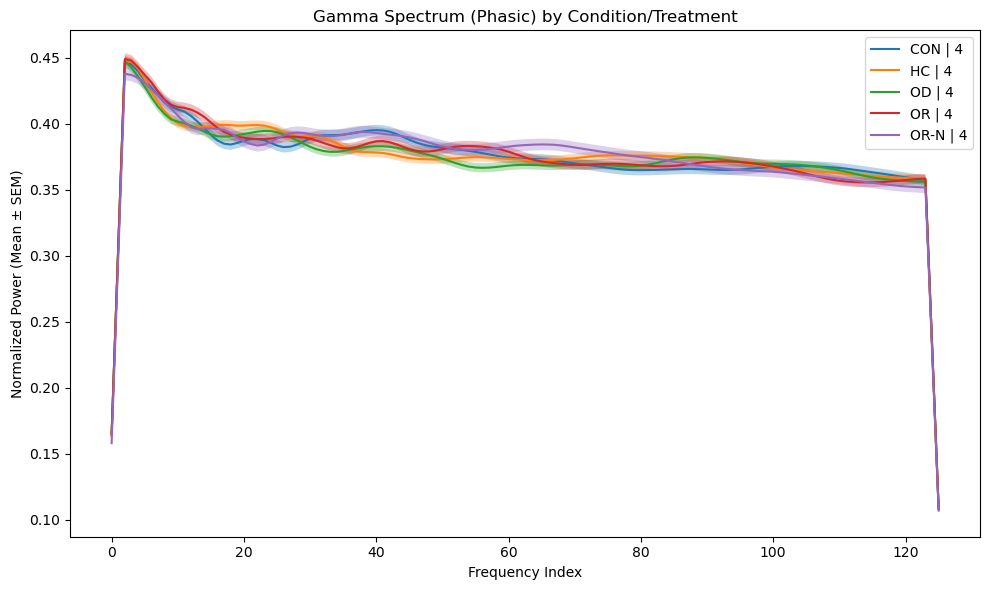

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.stats import sem

#------------------------------------------------
# Step 1: Load the CSV file
#------------------------------------------------
# Replace 'your_data.csv' with the path to your file
df = pd.read_csv('phasic_data.csv')

#------------------------------------------------
# Step 2: Parse the 'average_spectrum' column
#------------------------------------------------
# The 'average_spectrum' appears to be a string of a Python list/array.
# We can safely parse it using 'ast.literal_eval'
df['average_spectrum'] = df['average_spectrum'].apply(lambda x: np.fromstring(x.strip("[] \n"), sep=' '))

#------------------------------------------------
# Step 3: Filter data for state='phasic' (if you only want phasic)
#------------------------------------------------
df_phasic = df[df['state'] == 'phasic']

#------------------------------------------------
# Step 4: Group by conditions
#------------------------------------------------
# For example, group by 'condition' and 'treatment'
grouped = df_phasic.groupby(['condition', 'treatment'])

#------------------------------------------------
# Step 5: Calculate mean and SEM for each group
#------------------------------------------------
# We'll assume all spectra have the same length. We'll stack them and then compute mean and SEM across rows.
summary = {}
for (cond, treat), group_data in grouped:
    # Extract all spectra arrays in this group
    spectra = np.stack(group_data['average_spectrum'].values, axis=0)
    # Mean across samples (axis=0)
    mean_spectrum = np.mean(spectra, axis=0)
    # SEM across samples
    sem_spectrum = sem(spectra, axis=0, nan_policy='omit')
    
    summary[(cond, treat)] = (mean_spectrum, sem_spectrum)

#------------------------------------------------
# Step 6: Plot mean ± SEM
#------------------------------------------------
plt.figure(figsize=(10, 6))

# We'll plot each (condition, treatment) group
for (cond, treat), (mean_spectrum, sem_spectrum) in summary.items():
    x = np.arange(len(mean_spectrum))  # x-axis as index of frequencies
    plt.plot(x, mean_spectrum, label=f'{cond} | {treat}')
    plt.fill_between(x, mean_spectrum - sem_spectrum, mean_spectrum + sem_spectrum, alpha=0.3)

plt.xlabel('Frequency Index')
plt.ylabel('Normalized Power (Mean ± SEM)')
plt.title('Gamma Spectrum (Phasic) by Condition/Treatment')
plt.legend()
plt.tight_layout()

#------------------------------------------------
# Step 7: Show or save the figure
#------------------------------------------------
plt.show()
#plt.savefig('gamma_spectrum_phasic.png', dpi=300)

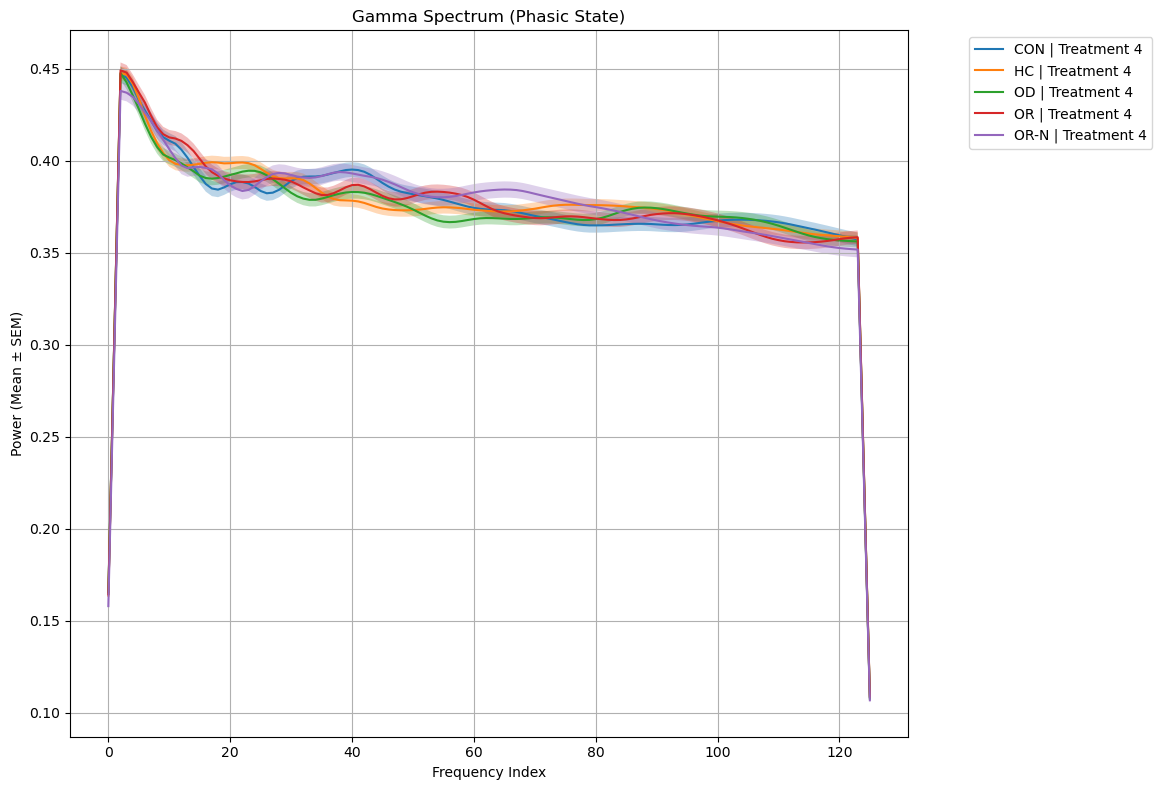

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

#------------------------------------------------
# Step 1: Load the data
#------------------------------------------------
# Replace with your actual CSV file path
csv_file = "phasic_data.csv"
df = pd.read_csv(csv_file)

#------------------------------------------------
# Step 2: Clean and Parse the 'average_spectrum' column
#------------------------------------------------
def parse_spectrum(spectrum_str):
    """Convert a space-separated string of numbers into a numpy array."""
    try:
        # Strip brackets and split by spaces
        return np.fromstring(spectrum_str.strip("[] \n"), sep=' ')
    except Exception as e:
        print(f"Error parsing spectrum: {spectrum_str}, Error: {e}")
        return np.nan

df['average_spectrum'] = df['average_spectrum'].apply(parse_spectrum)

# Drop rows with invalid spectra
df = df.dropna(subset=['average_spectrum']).reset_index(drop=True)

#------------------------------------------------
# Step 3: Filter Data for Specific States
#------------------------------------------------
# We're focusing on 'phasic' state for this analysis
df_phasic = df[df['state'] == 'phasic']

#------------------------------------------------
# Step 4: Group Data by Condition and Treatment
#------------------------------------------------
grouped = df_phasic.groupby(['condition', 'treatment'])

#------------------------------------------------
# Step 5: Compute Mean and SEM for Each Group
#------------------------------------------------
results = []
for (condition, treatment), group in grouped:
    spectra = np.stack(group['average_spectrum'].values)  # Stack all spectra
    mean_spectrum = np.mean(spectra, axis=0)  # Compute mean
    sem_spectrum = sem(spectra, axis=0, nan_policy='omit')  # Compute SEM
    results.append({
        'condition': condition,
        'treatment': treatment,
        'mean_spectrum': mean_spectrum,
        'sem_spectrum': sem_spectrum
    })

# Convert results to a DataFrame for easier processing
results_df = pd.DataFrame(results)

#------------------------------------------------
# Step 6: Visualize the Mean ± SEM for Each Group
#------------------------------------------------
plt.figure(figsize=(12, 8))

# Loop through results to plot each group's data
for i, row in results_df.iterrows():
    mean_spectrum = row['mean_spectrum']
    sem_spectrum = row['sem_spectrum']
    label = f"{row['condition']} | Treatment {row['treatment']}"
    
    x = np.arange(len(mean_spectrum))  # Frequency indices
    plt.plot(x, mean_spectrum, label=label)  # Plot mean
    plt.fill_between(x, mean_spectrum - sem_spectrum, mean_spectrum + sem_spectrum, alpha=0.3)  # Plot SEM

# Add plot details
plt.xlabel('Frequency Index')
plt.ylabel('Power (Mean ± SEM)')
plt.title('Gamma Spectrum (Phasic State)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.tight_layout()

# Show or save the plot
plt.show()
# plt.savefig("gamma_spectrum_analysis.png", dpi=300)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')


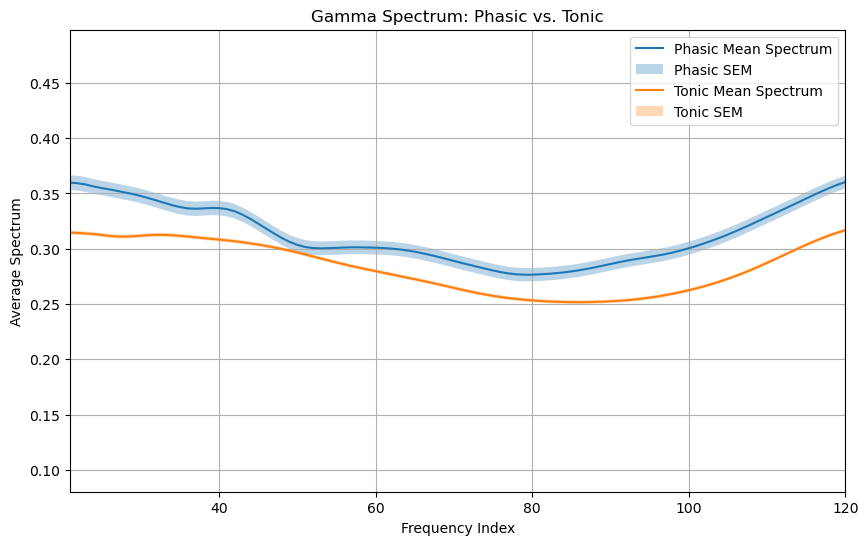

In [ ]:
    # Function to clean and process the 'average_spectrum' column
    def clean_and_process_spectrum(data):
        def clean_spectrum(value):
            if isinstance(value, str):
                # Remove unwanted characters, replace spaces with commas, and handle double commas
                value = value.replace(' ', ',').replace(',,', ',').strip(',')
                try:
                    return np.array(eval(value))
                except Exception:
                    return np.array([])  # Return empty array if parsing fails
            return np.array(value)

        data['average_spectrum'] = data['average_spectrum'].apply(clean_spectrum)
        return data

    # Clean and process the spectrum data
    phasic_data = clean_and_process_spectrum(phasic_data)
    tonic_data = clean_and_process_spectrum(tonic_data)

    # Remove rows with invalid or empty spectra
    phasic_data = phasic_data[phasic_data['average_spectrum'].map(len) > 0]
    tonic_data = tonic_data[tonic_data['average_spectrum'].map(len) > 0]

    # Calculate mean and SEM for each condition
    def calculate_mean_sem(data):
        spectrum_matrix = np.array(list(data['average_spectrum']))
        mean_spectrum = np.mean(spectrum_matrix, axis=0)
        sem_spectrum = np.std(spectrum_matrix, axis=0) / np.sqrt(spectrum_matrix.shape[0])
        return mean_spectrum, sem_spectrum

    # Get results for phasic and tonic conditions
    phasic_mean, phasic_sem = calculate_mean_sem(phasic_data)
    tonic_mean, tonic_sem = calculate_mean_sem(tonic_data)

    # Plot the results
    x = np.arange(len(phasic_mean))  # Assuming the spectrum indices are sequential
    plt.figure(figsize=(10, 6))

    # Phasic condition plot
    plt.plot(x, phasic_mean, label='Phasic Mean Spectrum')
    plt.fill_between(x, phasic_mean - phasic_sem, phasic_mean + phasic_sem, alpha=0.3, label='Phasic SEM')

    # Tonic condition plot
    plt.plot(x, tonic_mean, label='Tonic Mean Spectrum')
    plt.fill_between(x, tonic_mean - tonic_sem, tonic_mean + tonic_sem, alpha=0.3, label='Tonic SEM')

    # Customize plot
    # Limit axis range
    plt.xlim(21, 120)
    plt.xlabel('Frequency Index')
    plt.ylabel('Average Spectrum')
    plt.title('Gamma Spectrum: Phasic vs. Tonic')
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

Phasic Peak: Index 2, Value 0.4723153329008642
Tonic Peak: Index 2, Value 0.4453957740467653
Phasic Cumulative Energy: 40.723283351403275
Tonic Cumulative Energy: 36.66955733970949
Phasic Spectrum-Entropy Correlation: 0.7133982553323689
Tonic Spectrum-Entropy Correlation: 0.7521748865042709
Frequency Band Analysis:
  Bands: ['Low (0-20)', 'Mid (20-50)', 'High (50-100)']
  Phasic Band Means: [0.38233786764624267, 0.3397291439813805, 0.2903647055336941]
  Tonic Band Means: [0.33914514102787036, 0.30935856457808214, 0.2656410949317635]


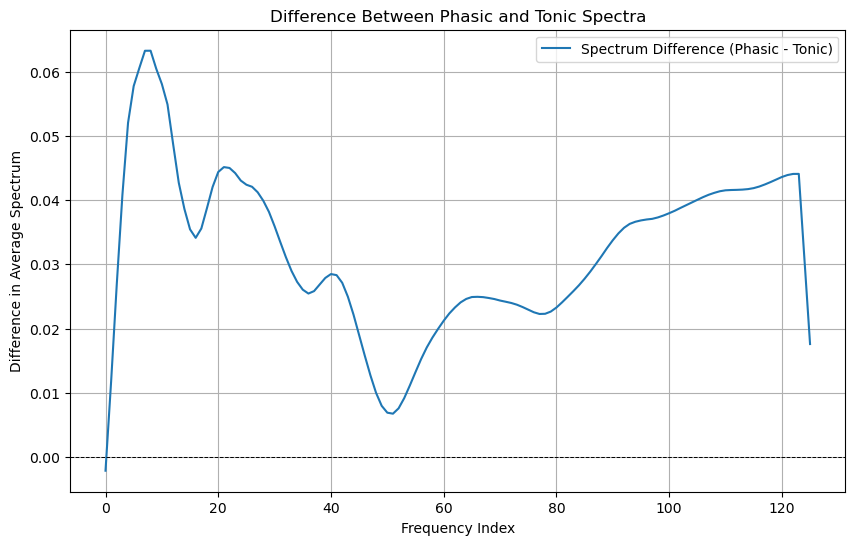

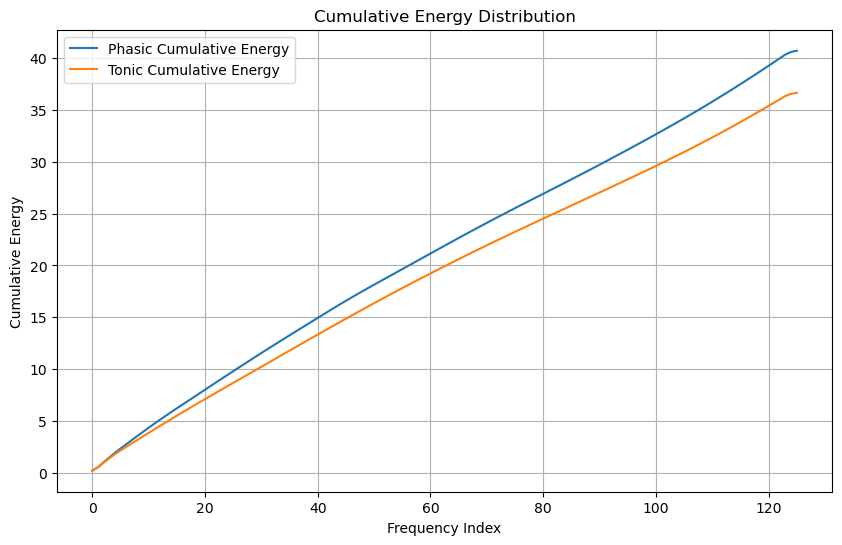

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')

# Function to clean and process the 'average_spectrum' column
def clean_and_process_spectrum(data):
    def clean_spectrum(value):
        if isinstance(value, str):
            # Remove unwanted characters, replace spaces with commas, and handle double commas
            value = value.replace(' ', ',').replace(',,', ',').strip(',')
            try:
                return np.array(eval(value))
            except Exception:
                return np.array([])  # Return empty array if parsing fails
        return np.array(value)

    data['average_spectrum'] = data['average_spectrum'].apply(clean_spectrum)
    return data

# Clean and process the spectrum data
phasic_data = clean_and_process_spectrum(phasic_data)
tonic_data = clean_and_process_spectrum(tonic_data)

# Remove rows with invalid or empty spectra
phasic_data = phasic_data[phasic_data['average_spectrum'].map(len) > 0]
tonic_data = tonic_data[tonic_data['average_spectrum'].map(len) > 0]

# Calculate mean and SEM for each condition
def calculate_mean_sem(data):
    spectrum_matrix = np.array(list(data['average_spectrum']))
    mean_spectrum = np.mean(spectrum_matrix, axis=0)
    sem_spectrum = np.std(spectrum_matrix, axis=0) / np.sqrt(spectrum_matrix.shape[0])
    return mean_spectrum, sem_spectrum

# Get results for phasic and tonic conditions
phasic_mean, phasic_sem = calculate_mean_sem(phasic_data)
tonic_mean, tonic_sem = calculate_mean_sem(tonic_data)

# 1. Identify spectral peaks (frequency index with the maximum value)
phasic_peak_value = np.max(phasic_mean)
phasic_peak_index = np.argmax(phasic_mean)
tonic_peak_value = np.max(tonic_mean)
tonic_peak_index = np.argmax(tonic_mean)

# 2. Calculate cumulative spectrum (cumulative energy distribution)
phasic_cumulative = np.cumsum(phasic_mean)
tonic_cumulative = np.cumsum(tonic_mean)

# 3. Correlation between spectrum and entropy
# Calculate the mean of each spectrum array for correlation
phasic_data['spectrum_mean'] = phasic_data['average_spectrum'].apply(np.mean)
tonic_data['spectrum_mean'] = tonic_data['average_spectrum'].apply(np.mean)

phasic_correlation = phasic_data[['spectrum_mean', 'entropy']].corr().iloc[0, 1]
tonic_correlation = tonic_data[['spectrum_mean', 'entropy']].corr().iloc[0, 1]

# 4. Frequency band analysis (e.g., split into low, mid, high frequency bands)
def calculate_band_means(spectrum, bands):
    return [np.mean(spectrum[start:end]) for start, end in bands]

bands = [(0, 20), (20, 50), (50, 100)]  # Define frequency bands
phasic_band_means = calculate_band_means(phasic_mean, bands)
tonic_band_means = calculate_band_means(tonic_mean, bands)

# Print analysis results
print(f"Phasic Peak: Index {phasic_peak_index}, Value {phasic_peak_value}")
print(f"Tonic Peak: Index {tonic_peak_index}, Value {tonic_peak_value}")
print(f"Phasic Cumulative Energy: {phasic_cumulative[-1]}")
print(f"Tonic Cumulative Energy: {tonic_cumulative[-1]}")
print(f"Phasic Spectrum-Entropy Correlation: {phasic_correlation}")
print(f"Tonic Spectrum-Entropy Correlation: {tonic_correlation}")
print(f"Frequency Band Analysis:")
print(f"  Bands: ['Low (0-20)', 'Mid (20-50)', 'High (50-100)']")
print(f"  Phasic Band Means: {phasic_band_means}")
print(f"  Tonic Band Means: {tonic_band_means}")

# Plot spectrum differences and cumulative energy
# Plot the difference between phasic and tonic mean spectra
plt.figure(figsize=(10, 6))
plt.plot(phasic_mean - tonic_mean, label='Spectrum Difference (Phasic - Tonic)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency Index')
plt.ylabel('Difference in Average Spectrum')
plt.title('Difference Between Phasic and Tonic Spectra')
plt.legend()
plt.grid(True)
plt.show()

# Plot cumulative energy for phasic and tonic conditions
plt.figure(figsize=(10, 6))
plt.plot(phasic_cumulative, label='Phasic Cumulative Energy')
plt.plot(tonic_cumulative, label='Tonic Cumulative Energy')
plt.xlabel('Frequency Index')
plt.ylabel('Cumulative Energy')
plt.title('Cumulative Energy Distribution')
plt.legend()
plt.grid(True)
plt.show()

Phasic Condition-Wise Analysis:
  Condition                                      Mean Spectrum  \
0       CON  [0.19490598195350062, 0.33908086420216055, 0.4...   
1        HC  [0.1996731098199469, 0.34693509252814086, 0.48...   
2        OD  [0.19140171687328839, 0.3300686131054318, 0.46...   
3        OR  [0.19208428859824403, 0.3303123747353954, 0.46...   
4      OR-N  [0.1758273946932778, 0.3283160312113299, 0.464...   

                                        SEM Spectrum  Cumulative Energy  \
0  [0.011274538959439435, 0.013518153642270294, 0...          40.995250   
1  [0.009570380876948262, 0.011579016675030827, 0...          40.480345   
2  [0.010180375809055167, 0.012083847013799463, 0...          40.503056   
3  [0.010911177112561567, 0.013315178522300977, 0...          40.390518   
4  [0.011881935251619659, 0.015317721076470508, 0...          41.681897   

   Peak Index  Peak Value  
0           2    0.473519  
1           2    0.485639  
2           2    0.466626  
3       

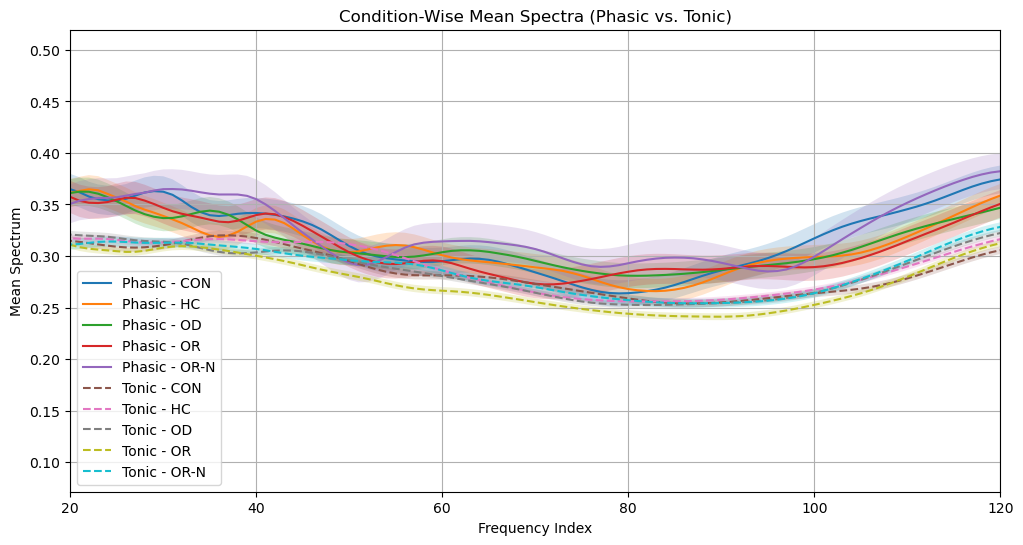

In [26]:
# Function to clean and process the 'average_spectrum' column
def clean_and_process_spectrum(data):
    def clean_spectrum(value):
        if isinstance(value, str):
            # Remove unwanted characters, replace spaces with commas, and handle double commas
            value = value.replace(' ', ',').replace(',,', ',').strip(',')
            try:
                return np.array(eval(value))
            except Exception:
                return np.array([])  # Return empty array if parsing fails
        return np.array(value)

    data['average_spectrum'] = data['average_spectrum'].apply(clean_spectrum)
    return data

# Clean and process the spectrum data
phasic_data = clean_and_process_spectrum(phasic_data)
tonic_data = clean_and_process_spectrum(tonic_data)

# Remove rows with invalid or empty spectra
phasic_data = phasic_data[phasic_data['average_spectrum'].map(len) > 0]
tonic_data = tonic_data[tonic_data['average_spectrum'].map(len) > 0]

# Function for condition-wise analysis
def condition_wise_analysis(data):
    condition_groups = data.groupby('condition')
    condition_results = []

    for condition, group in condition_groups:
        spectrum_matrix = np.array(list(group['average_spectrum']))
        mean_spectrum = np.mean(spectrum_matrix, axis=0)
        sem_spectrum = np.std(spectrum_matrix, axis=0) / np.sqrt(spectrum_matrix.shape[0])
        cumulative_energy = np.sum(mean_spectrum)
        peak_index = np.argmax(mean_spectrum)
        peak_value = mean_spectrum[peak_index]

        condition_results.append({
            "Condition": condition,
            "Mean Spectrum": mean_spectrum,
            "SEM Spectrum": sem_spectrum,
            "Cumulative Energy": cumulative_energy,
            "Peak Index": peak_index,
            "Peak Value": peak_value
        })
    
    return condition_results

# Perform condition-wise analysis for phasic and tonic data
phasic_condition_results = condition_wise_analysis(phasic_data)
tonic_condition_results = condition_wise_analysis(tonic_data)

# Prepare data for visualization
phasic_df = pd.DataFrame(phasic_condition_results)
tonic_df = pd.DataFrame(tonic_condition_results)

# Display phasic and tonic condition-wise results
print("Phasic Condition-Wise Analysis:")
print(phasic_df)
print("\nTonic Condition-Wise Analysis:")
print(tonic_df)

# Plot condition-wise mean spectra for visual comparison
plt.figure(figsize=(12, 6))
for result in phasic_condition_results:
    mean_spectrum = result["Mean Spectrum"]
    sem_spectrum = result["SEM Spectrum"]
    plt.plot(mean_spectrum, label=f'Phasic - {result["Condition"]}', linestyle='-')
    plt.fill_between(range(len(mean_spectrum)),
                     mean_spectrum - sem_spectrum,
                     mean_spectrum + sem_spectrum,
                     alpha=0.2)

for result in tonic_condition_results:
    mean_spectrum = result["Mean Spectrum"]
    sem_spectrum = result["SEM Spectrum"]
    plt.plot(mean_spectrum, label=f'Tonic - {result["Condition"]}', linestyle='--')
    plt.fill_between(range(len(mean_spectrum)),
                     mean_spectrum - sem_spectrum,
                     mean_spectrum + sem_spectrum,
                     alpha=0.2)

plt.xlabel('Frequency Index')
plt.ylabel('Mean Spectrum')
plt.title('Condition-Wise Mean Spectra (Phasic vs. Tonic)')
plt.legend()
plt.xlim(20, 120)
plt.grid(True)
plt.show()

Phasic Condition-Wise Analysis:
  Condition                                      Mean Spectrum  \
0       CON  [0.19490598195350062, 0.33908086420216055, 0.4...   
1        HC  [0.1996731098199469, 0.34693509252814086, 0.48...   
2        OD  [0.19140171687328839, 0.3300686131054318, 0.46...   
3        OR  [0.19208428859824403, 0.3303123747353954, 0.46...   
4      OR-N  [0.1758273946932778, 0.3283160312113299, 0.464...   

                                        SEM Spectrum  Cumulative Energy  \
0  [0.011274538959439435, 0.013518153642270294, 0...          40.995250   
1  [0.009570380876948262, 0.011579016675030827, 0...          40.480345   
2  [0.010180375809055167, 0.012083847013799463, 0...          40.503056   
3  [0.010911177112561567, 0.013315178522300977, 0...          40.390518   
4  [0.011881935251619659, 0.015317721076470508, 0...          41.681897   

   Peak Index  Peak Value  
0           2    0.473519  
1           2    0.485639  
2           2    0.466626  
3       

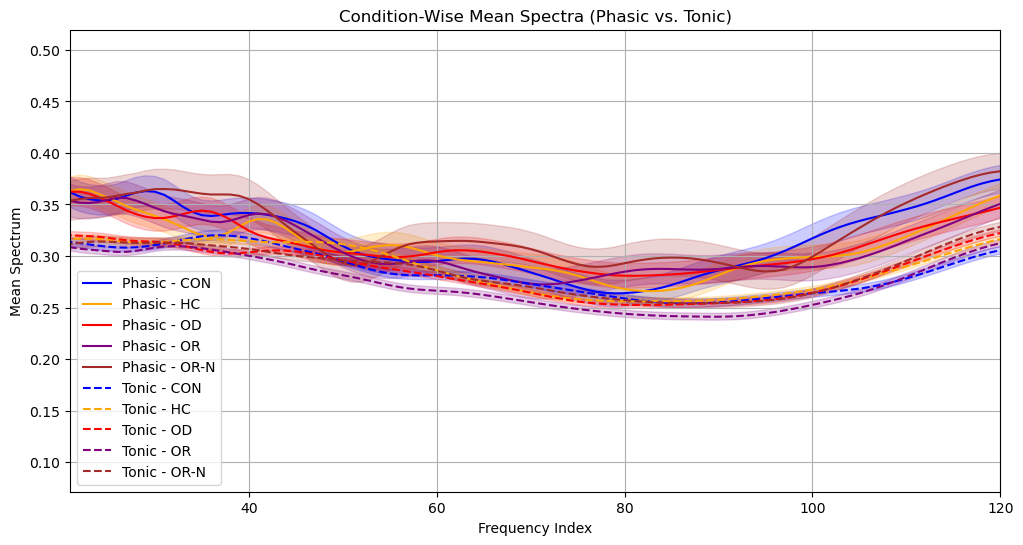

In [23]:
# Function to clean and process the 'average_spectrum' column
def clean_and_process_spectrum(data):
    def clean_spectrum(value):
        if isinstance(value, str):
            # Remove unwanted characters, replace spaces with commas, and handle double commas
            value = value.replace(' ', ',').replace(',,', ',').strip(',')
            try:
                return np.array(eval(value))
            except Exception:
                return np.array([])  # Return empty array if parsing fails
        return np.array(value)

    data['average_spectrum'] = data['average_spectrum'].apply(clean_spectrum)
    return data

# Clean and process the spectrum data
phasic_data = clean_and_process_spectrum(phasic_data)
tonic_data = clean_and_process_spectrum(tonic_data)

# Remove rows with invalid or empty spectra
phasic_data = phasic_data[phasic_data['average_spectrum'].map(len) > 0]
tonic_data = tonic_data[tonic_data['average_spectrum'].map(len) > 0]

# Function for condition-wise analysis
def condition_wise_analysis(data):
    condition_groups = data.groupby('condition')
    condition_results = []

    for condition, group in condition_groups:
        spectrum_matrix = np.array(list(group['average_spectrum']))
        mean_spectrum = np.mean(spectrum_matrix, axis=0)
        sem_spectrum = np.std(spectrum_matrix, axis=0) / np.sqrt(spectrum_matrix.shape[0])
        cumulative_energy = np.sum(mean_spectrum)
        peak_index = np.argmax(mean_spectrum)
        peak_value = mean_spectrum[peak_index]

        condition_results.append({
            "Condition": condition,
            "Mean Spectrum": mean_spectrum,
            "SEM Spectrum": sem_spectrum,
            "Cumulative Energy": cumulative_energy,
            "Peak Index": peak_index,
            "Peak Value": peak_value
        })
    
    return condition_results

# Perform condition-wise analysis for phasic and tonic data
phasic_condition_results = condition_wise_analysis(phasic_data)
tonic_condition_results = condition_wise_analysis(tonic_data)

# Prepare data for visualization
phasic_df = pd.DataFrame(phasic_condition_results)
tonic_df = pd.DataFrame(tonic_condition_results)

# Display phasic and tonic condition-wise results
print("Phasic Condition-Wise Analysis:")
print(phasic_df)
print("\nTonic Condition-Wise Analysis:")
print(tonic_df)

# Define custom colors for conditions (excluding green)
custom_colors = ['blue', 'orange', 'red', 'purple', 'brown']

# Plot condition-wise mean spectra for visual comparison
plt.figure(figsize=(12, 6))

# Phasic conditions
for i, result in enumerate(phasic_condition_results):
    mean_spectrum = result["Mean Spectrum"]
    sem_spectrum = result["SEM Spectrum"]
    plt.plot(mean_spectrum, label=f'Phasic - {result["Condition"]}', linestyle='-',
             color=custom_colors[i % len(custom_colors)])
    plt.fill_between(range(len(mean_spectrum)),
                     mean_spectrum - sem_spectrum,
                     mean_spectrum + sem_spectrum,
                     alpha=0.2, color=custom_colors[i % len(custom_colors)])

# Tonic conditions
for i, result in enumerate(tonic_condition_results):
    mean_spectrum = result["Mean Spectrum"]
    sem_spectrum = result["SEM Spectrum"]
    plt.plot(mean_spectrum, label=f'Tonic - {result["Condition"]}', linestyle='--',
             color=custom_colors[i % len(custom_colors)])
    plt.fill_between(range(len(mean_spectrum)),
                     mean_spectrum - sem_spectrum,
                     mean_spectrum + sem_spectrum,
                     alpha=0.2, color=custom_colors[i % len(custom_colors)])

# Plot customization
# Limit axis range
plt.xlim(21, 120)
plt.xlabel('Frequency Index')
plt.ylabel('Mean Spectrum')
plt.title('Condition-Wise Mean Spectra (Phasic vs. Tonic)')
plt.legend()
plt.grid(True)
plt.show()


Entropy Summary: Phasic vs Tonic
  Condition      Mean    Median   Std Dev       Min       Max
0    Phasic  6.571351  6.592954  0.165218  5.751125  6.882882
1     Tonic  6.498425  6.539345  0.232828  4.595636  6.913320


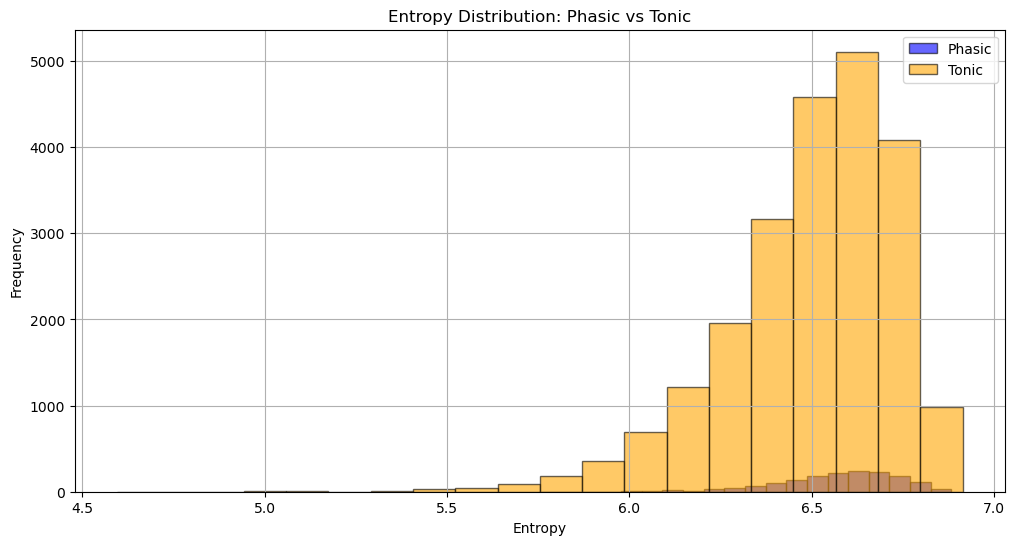


Condition-Wise Entropy Analysis: Phasic
       Condition      Mean    Median   Std Dev       Min       Max
0   Phasic - CON  6.570701  6.594192  0.164070  5.874211  6.853038
1    Phasic - HC  6.568859  6.587558  0.169088  5.751125  6.849129
2    Phasic - OD  6.574592  6.599333  0.164483  6.011800  6.882882
3    Phasic - OR  6.570502  6.594667  0.168844  5.865046  6.855068
4  Phasic - OR-N  6.572030  6.590849  0.156876  5.847641  6.858084

Condition-Wise Entropy Analysis: Tonic
      Condition      Mean    Median   Std Dev       Min       Max
0   Tonic - CON  6.502516  6.540459  0.227446  5.313767  6.892101
1    Tonic - HC  6.505517  6.545378  0.221894  5.157977  6.913320
2    Tonic - OD  6.501730  6.541510  0.228042  5.163857  6.888922
3    Tonic - OR  6.478869  6.525011  0.255981  4.595636  6.903849
4  Tonic - OR-N  6.505545  6.550124  0.227378  5.018539  6.900090


In [14]:
def clean_and_process_spectrum(data):
    def clean_spectrum(value):
        if isinstance(value, str):
            # Remove unwanted characters, replace spaces with commas, and handle double commas
            value = value.replace(' ', ',').replace(',,', ',').strip(',')
            try:
                return np.array(eval(value))
            except Exception:
                return np.array([])  # Return empty array if parsing fails
        return np.array(value)

    data['average_spectrum'] = data['average_spectrum'].apply(clean_spectrum)
    return data

# Clean and process the spectrum data
phasic_data = clean_and_process_spectrum(phasic_data)
tonic_data = clean_and_process_spectrum(tonic_data)

# Remove rows with invalid or empty spectra
phasic_data = phasic_data[phasic_data['average_spectrum'].map(len) > 0]
tonic_data = tonic_data[tonic_data['average_spectrum'].map(len) > 0]

# Statistical summary for entropy
def summarize_entropy(data, label):
    summary = {
        "Condition": label,
        "Mean": data['entropy'].mean(),
        "Median": data['entropy'].median(),
        "Std Dev": data['entropy'].std(),
        "Min": data['entropy'].min(),
        "Max": data['entropy'].max()
    }
    return summary

phasic_entropy_summary = summarize_entropy(phasic_data, "Phasic")
tonic_entropy_summary = summarize_entropy(tonic_data, "Tonic")

# Combine summaries into a DataFrame for comparison
entropy_summary_df = pd.DataFrame([phasic_entropy_summary, tonic_entropy_summary])

# Display the summary
print("\nEntropy Summary: Phasic vs Tonic")
print(entropy_summary_df)

# Plot entropy distribution
plt.figure(figsize=(12, 6))
plt.hist(phasic_data['entropy'], bins=20, alpha=0.6, label='Phasic', color='blue', edgecolor='black')
plt.hist(tonic_data['entropy'], bins=20, alpha=0.6, label='Tonic', color='orange', edgecolor='black')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Entropy Distribution: Phasic vs Tonic')
plt.legend()
plt.grid(True)
plt.show()

# Condition-wise breakdown of entropy
def condition_wise_entropy(data, label):
    condition_groups = data.groupby('condition')
    condition_results = []

    for condition, group in condition_groups:
        summary = {
            "Condition": f"{label} - {condition}",
            "Mean": group['entropy'].mean(),
            "Median": group['entropy'].median(),
            "Std Dev": group['entropy'].std(),
            "Min": group['entropy'].min(),
            "Max": group['entropy'].max()
        }
        condition_results.append(summary)
    
    return pd.DataFrame(condition_results)

phasic_condition_entropy = condition_wise_entropy(phasic_data, "Phasic")
tonic_condition_entropy = condition_wise_entropy(tonic_data, "Tonic")

# Display condition-wise entropy breakdown
print("\nCondition-Wise Entropy Analysis: Phasic")
print(phasic_condition_entropy)
print("\nCondition-Wise Entropy Analysis: Tonic")
print(tonic_condition_entropy)

In [6]:
# Load the CSV file
phasic_data = 'phasic_data.csv'  # Replace with your file path
df_phasic = pd.read_csv(phasic_data)

# Convert the string representation of arrays into actual NumPy arrays
df_phasic['average_spectrum'] = df_phasic['average_spectrum'].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Stack the arrays into a 2D array
spectrum_phasic = np.vstack(df_phasic['average_spectrum'].values)

# Compute the element-wise average across all rows
average_spectrum_phasic = np.mean(spectrum_phasic, axis=0)

num_samples_phasic = spectrum_phasic.shape[0]  # Number of rows (samples)
sem_spectrum_phasic = np.std(spectrum_phasic, axis=0) / np.sqrt(num_samples_phasic)

In [7]:
# Load the CSV file
Tonic_data = 'tonic_data.csv'  # Replace with your file path
df_tonic = pd.read_csv(Tonic_data)

# Convert the string representation of arrays into actual NumPy arrays
df_tonic['average_spectrum'] = df_tonic['average_spectrum'].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Stack the arrays into a 2D array
spectrum_tonic = np.vstack(df_tonic['average_spectrum'].values)

# Compute the element-wise average across all rows
average_spectrum_tonic = np.mean(spectrum_tonic, axis=0)

num_samples_tonic = spectrum_tonic.shape[0]  # Number of rows (samples)
sem_spectrum_tonic = np.std(spectrum_tonic, axis=0) / np.sqrt(num_samples_tonic)

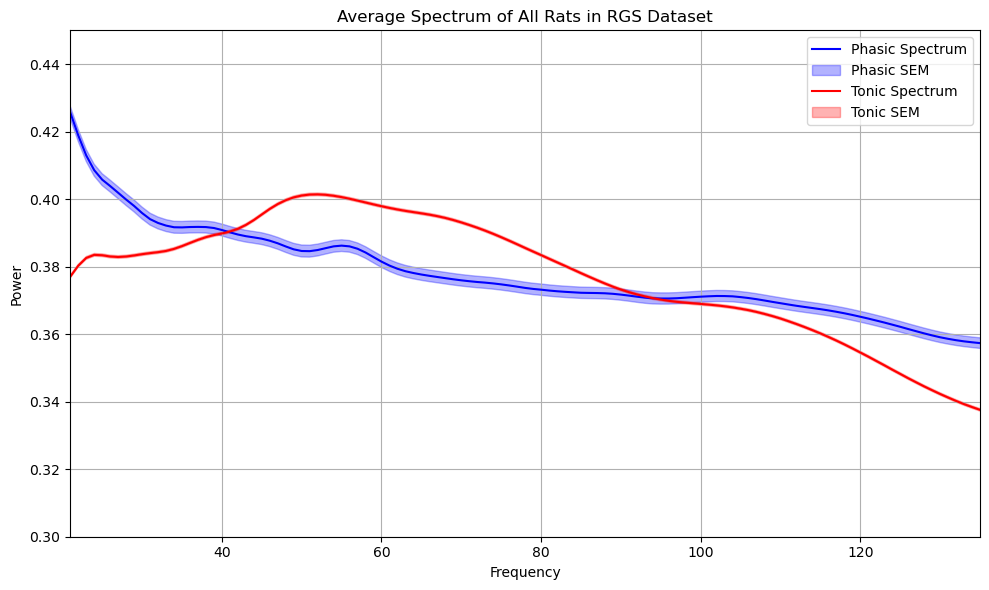

In [17]:
x_freq = np.arange(15, 141)

# Plot the average spectra
plt.figure(figsize=(10, 6))

# Plot and fill for the phasic spectrum
plt.plot(x_freq, average_spectrum_phasic, label="Phasic Spectrum", color='blue')
plt.fill_between(x_freq, 
                 np.array(average_spectrum_phasic) - sem_spectrum_phasic, 
                 np.array(average_spectrum_phasic) + sem_spectrum_phasic, 
                 color='blue', alpha=0.3, label="Phasic SEM")

# Plot and fill for the tonic spectrum
plt.plot(x_freq, average_spectrum_tonic, label="Tonic Spectrum", color='red')
plt.fill_between(x_freq, 
                 np.array(average_spectrum_tonic) - sem_spectrum_tonic, 
                 np.array(average_spectrum_tonic) + sem_spectrum_tonic, 
                 color='red', alpha=0.3, label="Tonic SEM")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Average Spectrum of All Rats in RGS Dataset")
plt.grid(True)
plt.legend()

# Limit axis range
plt.xlim(21, 135)
plt.ylim(0.3, 0.45)

# Save the plot as a PNG file with the title as the file name
title = "Average Spectrum of All Rats in RGS Dataset"
plt.tight_layout()
plt.savefig(f"{title}.png", format='png', dpi=300)


# Show the plot
plt.show()

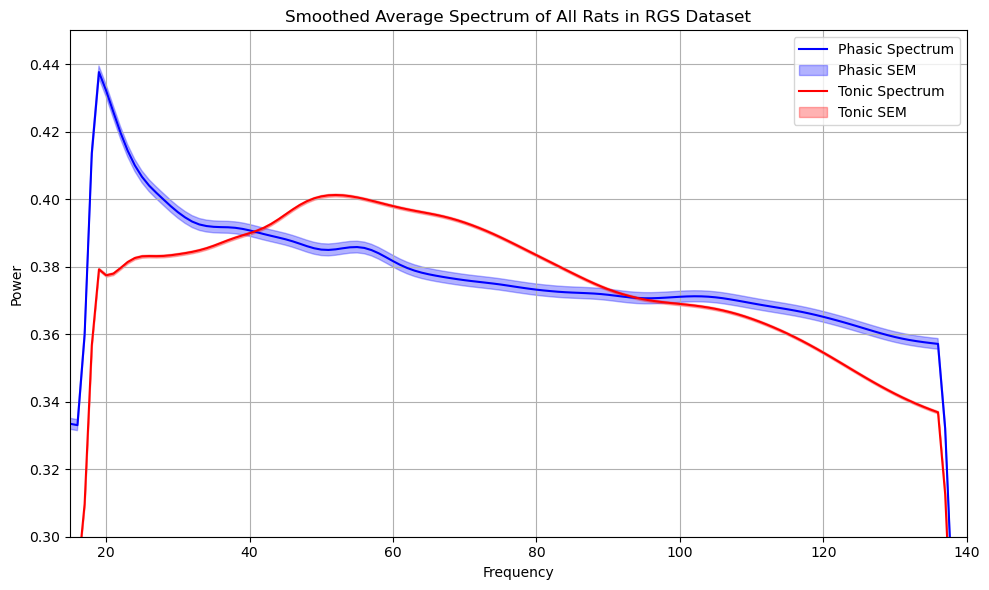

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file for Phasic
phasic_data = 'phasic_data.csv'  # Replace with your file path
df_phasic = pd.read_csv(phasic_data)

# Convert the string representation of arrays into actual NumPy arrays
df_phasic['average_spectrum'] = df_phasic['average_spectrum'].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Stack the arrays into a 2D array
spectrum_phasic = np.vstack(df_phasic['average_spectrum'].values)

# Compute the element-wise average across all rows
average_spectrum_phasic = np.mean(spectrum_phasic, axis=0)

# Compute SEM for the phasic spectrum
num_samples_phasic = spectrum_phasic.shape[0]  # Number of rows (samples)
sem_spectrum_phasic = np.std(spectrum_phasic, axis=0) / np.sqrt(num_samples_phasic)

# Load the CSV file for Tonic
tonic_data = 'tonic_data.csv'  # Replace with your file path
df_tonic = pd.read_csv(tonic_data)

# Convert the string representation of arrays into actual NumPy arrays
df_tonic['average_spectrum'] = df_tonic['average_spectrum'].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Stack the arrays into a 2D array
spectrum_tonic = np.vstack(df_tonic['average_spectrum'].values)

# Compute the element-wise average across all rows
average_spectrum_tonic = np.mean(spectrum_tonic, axis=0)

# Compute SEM for the tonic spectrum
num_samples_tonic = spectrum_tonic.shape[0]  # Number of rows (samples)
sem_spectrum_tonic = np.std(spectrum_tonic, axis=0) / np.sqrt(num_samples_tonic)

# Define smoothing function
def smooth(data, window_size=5, mode='reflect'):
    """Smooth data with a moving average and padding."""
    padded = np.pad(data, pad_width=window_size // 2, mode=mode)
    smoothed = np.convolve(padded, np.ones(window_size) / window_size, mode='valid')
    return smoothed

# Apply 5 Hz smoothing with padding
smoothed_phasic = smooth(average_spectrum_phasic, window_size=5)
smoothed_phasic_sem_lower = smooth(average_spectrum_phasic - sem_spectrum_phasic, window_size=5)
smoothed_phasic_sem_upper = smooth(average_spectrum_phasic + sem_spectrum_phasic, window_size=5)

smoothed_tonic = smooth(average_spectrum_tonic, window_size=5)
smoothed_tonic_sem_lower = smooth(average_spectrum_tonic - sem_spectrum_tonic, window_size=5)
smoothed_tonic_sem_upper = smooth(average_spectrum_tonic + sem_spectrum_tonic, window_size=5)

# Frequency range
x_freq = np.arange(15, 141)

# Plot the smoothed spectra
plt.figure(figsize=(10, 6))

# Phasic spectrum with SEM
plt.plot(x_freq, smoothed_phasic, label="Phasic Spectrum", color='blue')
plt.fill_between(x_freq, 
                 smoothed_phasic_sem_lower, 
                 smoothed_phasic_sem_upper, 
                 color='blue', alpha=0.3, label="Phasic SEM")

# Tonic spectrum with SEM
plt.plot(x_freq, smoothed_tonic, label="Tonic Spectrum", color='red')
plt.fill_between(x_freq, 
                 smoothed_tonic_sem_lower, 
                 smoothed_tonic_sem_upper, 
                 color='red', alpha=0.3, label="Tonic SEM")

# Add labels and title
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("Smoothed Average Spectrum of All Rats in RGS Dataset")
plt.grid(True)
plt.legend()

# Limit axis range
plt.xlim(15, 140)  # Adjusted for full frequency range
plt.ylim(0.3, 0.45)  # Set based on expected data range

# Save the plot as a PNG file
title = "Smoothed Average Spectrum of All Rats"
plt.tight_layout()
plt.savefig(f"{title}.png", format='png', dpi=300)

# Show the plot
plt.show()


In [3]:
phasic_data = pd.read_csv('phasic_data_5hz.csv')
tonic_data = pd.read_csv('tonic_data_5hz.csv')

In [15]:
phasic_data.average_spectrum[0]

[0.18915364033808302,
 0.4922658943972181,
 0.797094678000927,
 0.8149997094263084,
 0.8291827549327035,
 0.8075310082485099,
 0.7890725835607503,
 0.7450503759168966,
 0.6338155599232522,
 0.4921649827715711,
 0.3645545016286887,
 0.31321491163112836,
 0.2775499764175506,
 0.23872242382633177,
 0.3048260103409098,
 0.46107524018484325,
 0.6127144204654152,
 0.782627894078946,
 0.9567501668222257,
 1.0,
 0.9289438807700329,
 0.7765805969725365,
 0.5838384067143849,
 0.4017457065967784,
 0.28862021121754466,
 0.2682256784476785,
 0.33992269356151095,
 0.4695474016579023,
 0.6119448264883646,
 0.7132494427182617,
 0.7400971849968964,
 0.6743451216416616,
 0.531410582870282,
 0.34492774732827575,
 0.16257412310461208,
 0.03718332554615088,
 0.0,
 0.04924318248891387,
 0.16323657522580756,
 0.30858693088160233,
 0.44100447923595026,
 0.529859185354605,
 0.5661385960868768,
 0.5504650788603453,
 0.4902497823907861,
 0.40081822999907146,
 0.299370587508499,
 0.2037942888225784,
 0.1275932577

In [4]:
# Function to clean and convert string representation of lists to actual lists
def clean_and_convert(column):
    def clean_string(x):
        if isinstance(x, str):
            # Remove any newlines, replace multiple spaces, and ensure commas are in place
            x = x.replace('\n', ' ').replace('  ', ' ')
            x = ','.join(x.split())  # Add commas between elements
            return eval(f"[{x}]")  # Safely evaluate the cleaned string as a list
        return x

    return column.apply(clean_string)

In [5]:
# Apply the cleaning and conversion function
phasic_data['average_spectrum'] = clean_and_convert(phasic_data['average_spectrum'])
tonic_data['average_spectrum'] = clean_and_convert(tonic_data['average_spectrum'])


In [6]:
ph_avg_spectrums = phasic_data['average_spectrum']
tc_avg_spectrums = tonic_data['average_spectrum']

In [7]:
# Convert each nested list in `ph_avg_spectrums` to a flattened numpy array
ph_avg_spectrums_flat = ph_avg_spectrums.apply(lambda x: np.array(x).flatten())


In [8]:
tc_avg_spectrums_flat = tc_avg_spectrums.apply(lambda x: np.array(x).flatten())

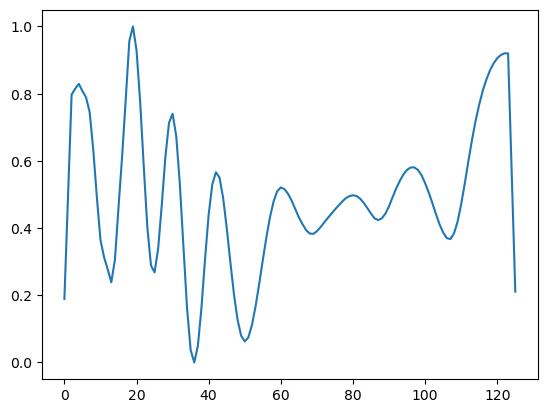

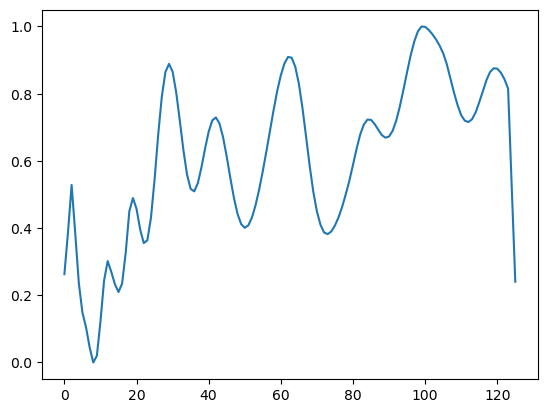

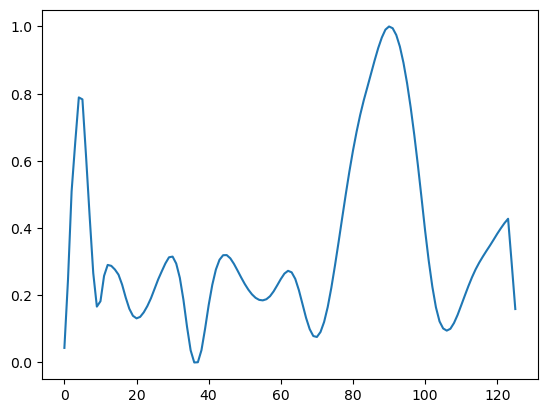

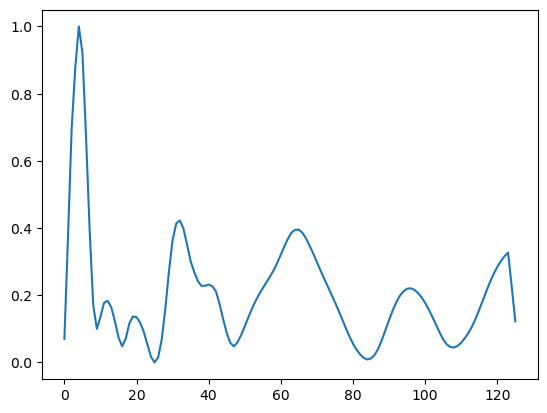

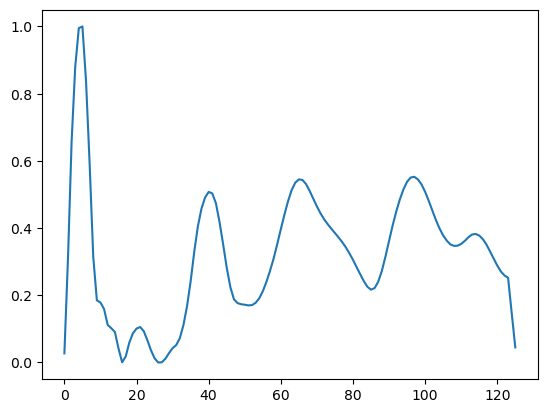

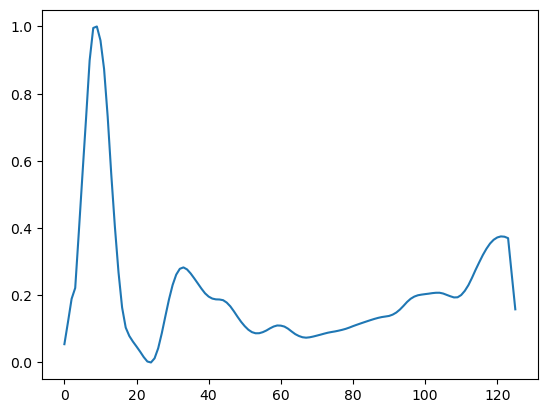

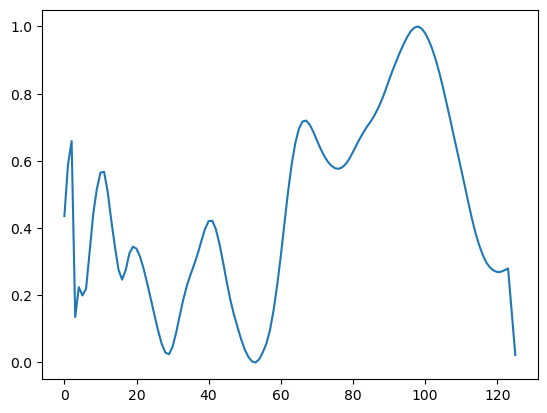

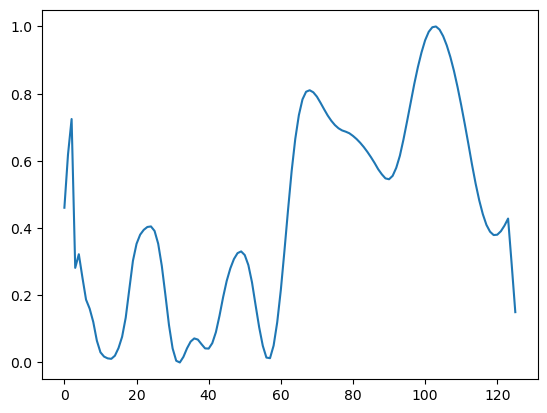

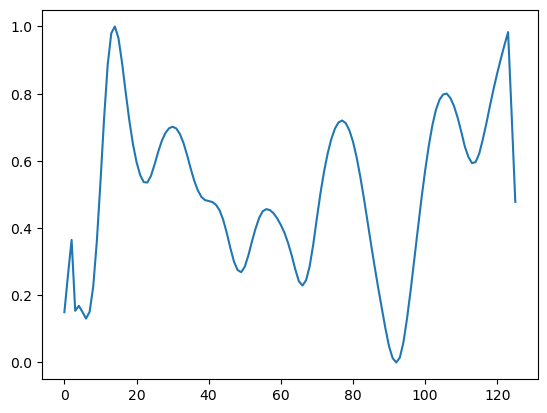

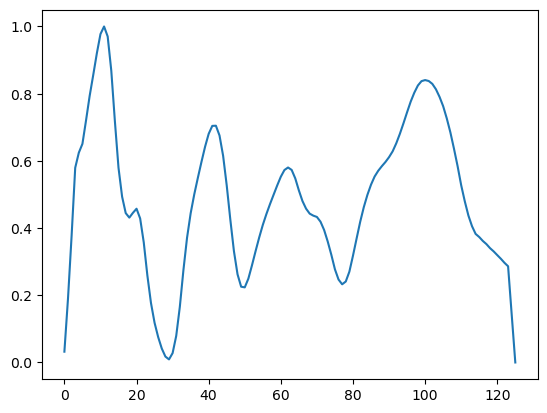

In [9]:
for i in range(0, 10):
    plt.figure()
    plt.plot(ph_avg_spectrums_flat[i])

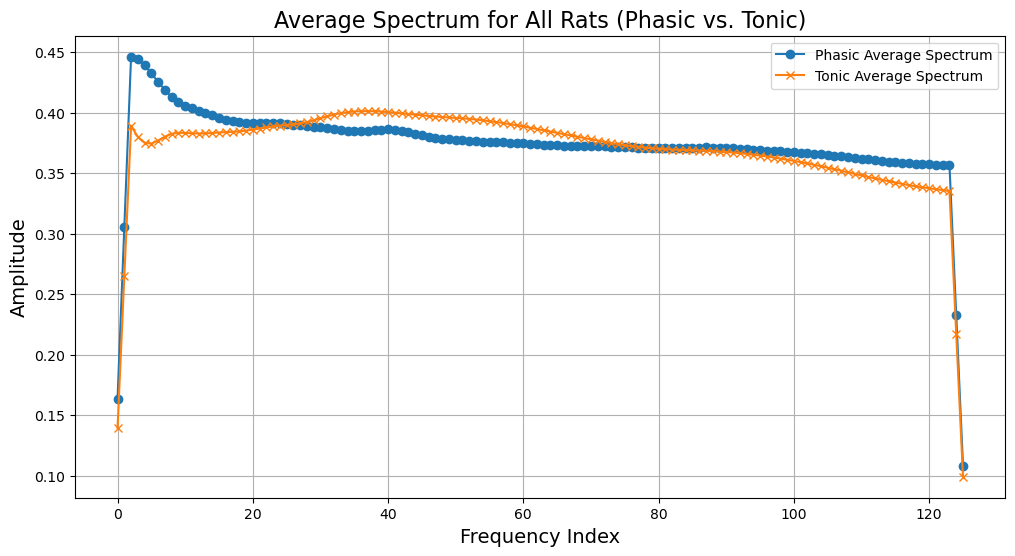

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')

# Function to clean and convert string representation of lists to actual lists
def clean_and_convert(column):
    def clean_string(x):
        if isinstance(x, str):
            x = x.replace('\n', ' ').replace('  ', ' ')
            x = ','.join(x.split())  # Add commas between elements
            return eval(f"[{x}]")  # Safely evaluate the cleaned string as a list
        return x
    return column.apply(clean_string)

# Apply the cleaning and conversion function
phasic_data['average_spectrum'] = clean_and_convert(phasic_data['average_spectrum'])
tonic_data['average_spectrum'] = clean_and_convert(tonic_data['average_spectrum'])

# Convert each nested list to a flattened numpy array
ph_avg_spectrums_flat = phasic_data['average_spectrum'].apply(lambda x: np.array(x).flatten())
tc_avg_spectrums_flat = tonic_data['average_spectrum'].apply(lambda x: np.array(x).flatten())

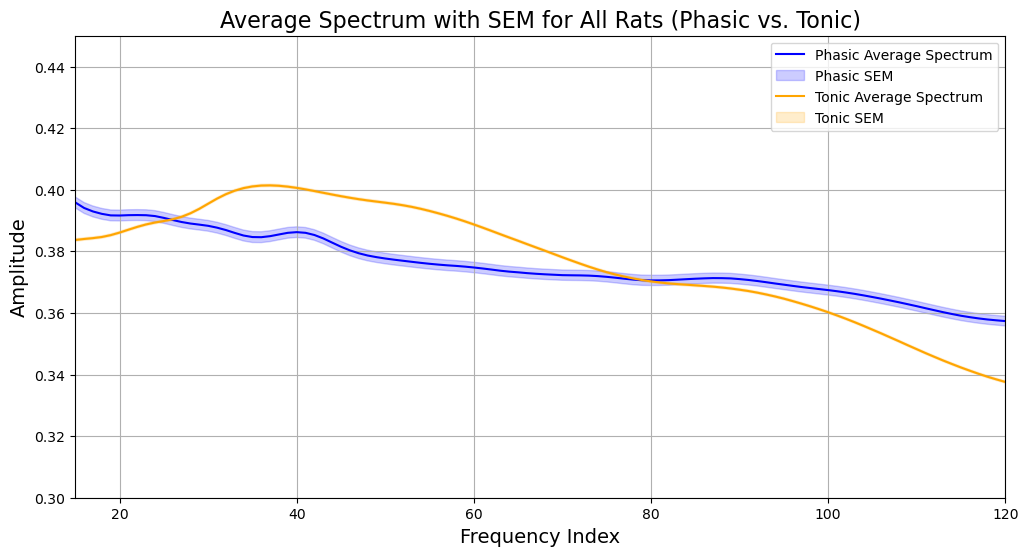

In [10]:
# Calculate the average spectrum across all rats
ph_avg_all_rats = np.mean(ph_avg_spectrums_flat.tolist(), axis=0)
tc_avg_all_rats = np.mean(tc_avg_spectrums_flat.tolist(), axis=0)

# Calculate the standard error of the mean (SEM)
ph_sem_all_rats = np.std(ph_avg_spectrums_flat.tolist(), axis=0) / np.sqrt(len(ph_avg_spectrums_flat))
tc_sem_all_rats = np.std(tc_avg_spectrums_flat.tolist(), axis=0) / np.sqrt(len(tc_avg_spectrums_flat))

# Plot the average spectrums with SEM as shaded areas
plt.figure(figsize=(12, 6))

# Plot phasic data with SEM
plt.plot(ph_avg_all_rats, label="Phasic Average Spectrum", color='blue')
plt.fill_between(range(len(ph_avg_all_rats)), 
                 ph_avg_all_rats - ph_sem_all_rats, 
                 ph_avg_all_rats + ph_sem_all_rats, 
                 color='blue', alpha=0.2, label="Phasic SEM")

# Plot tonic data with SEM
plt.plot(tc_avg_all_rats, label="Tonic Average Spectrum", color='orange')
plt.fill_between(range(len(tc_avg_all_rats)), 
                 tc_avg_all_rats - tc_sem_all_rats, 
                 tc_avg_all_rats + tc_sem_all_rats, 
                 color='orange', alpha=0.2, label="Tonic SEM")

# Add plot details
plt.title("Average Spectrum with SEM for All Rats (Phasic vs. Tonic)", fontsize=16)
plt.xlabel("Frequency Index", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.xlim(15, 120)
plt.ylim(0.3, 0.45)
plt.legend()
plt.grid(True)
plt.show()

In [1]:
pip install fitz

  Using cached fitz-0.0.1.dev2-py2.py3-none-any.whl.metadata (816 bytes)
  Using cached configobj-5.0.9-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached configparser-7.1.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached nibabel-5.3.2-py3-none-any.whl.metadata (9.1 kB)
  Using cached nipype-1.9.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached pyxnat-1.6.2-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached prov-2.0.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached pydot-3.0.3-py3-none-any.whl.metadata (10 kB)
  Using cached rdflib-7.1.1-py3-none-any.whl.metadata (11 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached acres-0.2.0-py3-none-any.whl.metadata (5.5 kB)
  Using cached etelemetry-0.3.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached looseversion-1.3.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached pur

In [1]:
import fitz  # PyMuPDF

# File paths
pdf_path = "/Users/amir/Downloads/9833026_MILITARYINTRO864653.pdf"
image_path = "/Users/amir/Downloads/Telegram Desktop/1-1.png"
output_path = "//Users/amir/Downloads"

# Open the PDF and select the first page
pdf_document = fitz.open(pdf_path)
page = pdf_document[0]

# Define image position and size (x, y, width, height) in points
x, y = 100, 500  # Bottom-left corner position
width, height = 200, 100  # Desired size in points

# Define rectangle to insert image
rect = fitz.Rect(x, y, x + width, y + height)
page.insert_image(rect, filename=image_path)

# Save the modified PDF
pdf_document.save(output_path)
pdf_document.close()

output_path

ModuleNotFoundError: No module named 'frontend'

# deepseek

ValueError: x and y must have same first dimension, but have shapes (26,) and (126,)

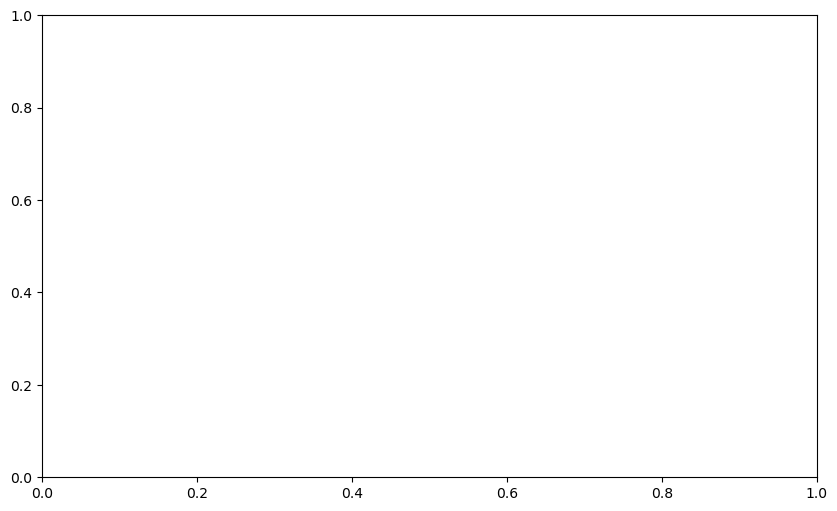

In [3]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

# Load the data
phasic_data = pd.read_csv('phasic_data_5hz.csv')
tonic_data = pd.read_csv('tonic_data_5hz.csv')

# Function to convert string representation of list to list
def str_to_list(s):
    return ast.literal_eval(s)

# Apply the conversion to 'average_spectrum' column
phasic_data['average_spectrum'] = phasic_data['average_spectrum'].apply(str_to_list)
tonic_data['average_spectrum'] = tonic_data['average_spectrum'].apply(str_to_list)

# Function to calculate mean spectrum per rat
def calculate_rat_mean(df):
    # Group by 'rat_id'
    grouped = df.groupby('rat_id')
    rat_means = []
    for rat_id, group in grouped:
        # Convert spectra to NumPy arrays
        spectra = np.array(group['average_spectrum'].tolist())
        # Calculate mean spectrum for the rat
        rat_mean = np.mean(spectra, axis=0)
        rat_means.append(rat_mean)
    # Convert list of rat means to NumPy array
    rat_means = np.array(rat_means)
    # Calculate overall mean across all rats
    overall_mean = np.mean(rat_means, axis=0)
    return overall_mean

# Calculate overall mean spectrum for phasic data
phasic_overall_mean = calculate_rat_mean(phasic_data)

# Calculate overall mean spectrum for tonic data
tonic_overall_mean = calculate_rat_mean(tonic_data)

# Generate frequency array
frequencies = np.arange(15, 141, 5)

# Plot the mean spectra
plt.figure(figsize=(10, 6))
plt.plot(frequencies, phasic_overall_mean, label='Phasic REM', marker='o')
plt.plot(frequencies, tonic_overall_mean, label='Tonic REM', marker='x')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mean Power')
plt.title('Mean Gamma Power Spectra during REM Sleep')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, save the plot
# plt.savefig('mean_gamma_power_spectra.png')

In [1]:
import ast
import pandas as pd
phasic_data = pd.read_csv('phasic_data_5hz.csv')
tonic_data = pd.read_csv('tonic_data_5hz.csv')

def parse_spectrum_string(x):
    return np.array(ast.literal_eval(x), dtype=float)

phasic_data['avg_spectrum_array'] = phasic_data['average_spectrum'].apply(parse_spectrum_string)
tonic_data['avg_spectrum_array'] = tonic_data['average_spectrum'].apply(parse_spectrum_string)

phasic_mean_per_rat = phasic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)
tonic_mean_per_rat = tonic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)


frequencies = np.arange(15, 141, 5)


plt.figure(figsize=(10, 6))

colors = plt.cm.tab20(np.linspace(0, 1, len(phasic_mean_per_rat.index)))

for (rat_idx, rat_id) in enumerate(phasic_mean_per_rat.index):
    phasic_spectrum = phasic_mean_per_rat[rat_id]
    tonic_spectrum = tonic_mean_per_rat[rat_id]

    plt.plot(frequencies, phasic_spectrum, color='red', alpha=0.4, label=None if rat_idx else "Phasic (per rat)")
    plt.plot(frequencies, tonic_spectrum, color='blue', alpha=0.4, label=None if rat_idx else "Tonic (per rat)")

plt.title('Mean Spectrum per Rat: Phasic vs. Tonic')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

phasic_mean_per_rat_array = np.vstack(phasic_mean_per_rat.values)
tonic_mean_per_rat_array = np.vstack(tonic_mean_per_rat.values)

phasic_grand_mean = np.mean(phasic_mean_per_rat_array, axis=0)
tonic_grand_mean = np.mean(tonic_mean_per_rat_array, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, phasic_grand_mean, color='red', linewidth=2, label='Phasic Grand Mean')
plt.plot(frequencies, tonic_grand_mean, color='blue', linewidth=2, label='Tonic Grand Mean')
plt.title('Grand Mean Spectrum across All Rats')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

NameError: name 'np' is not defined

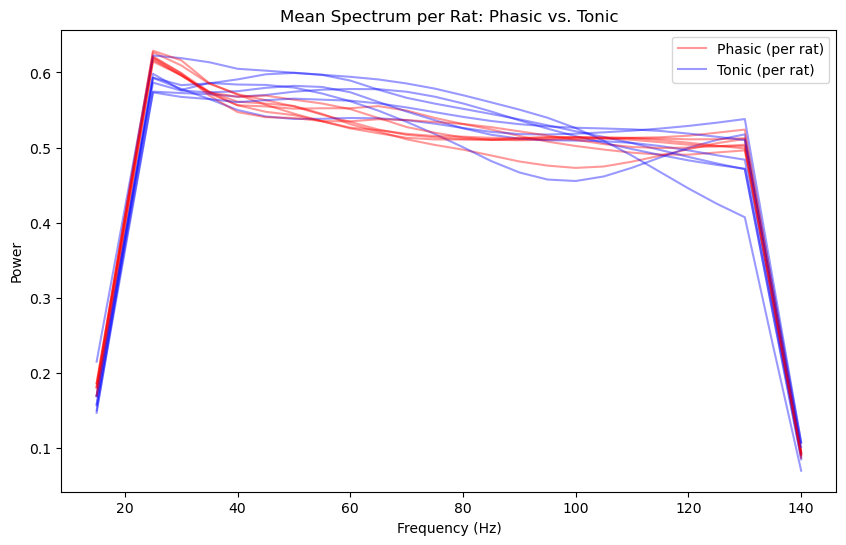

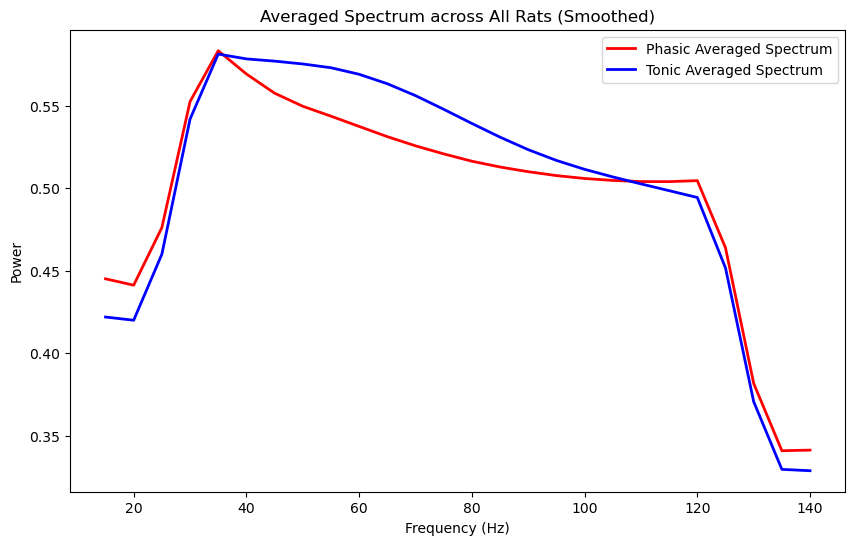

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

phasic_data = pd.read_csv('phasic_data_5hz.csv')
tonic_data = pd.read_csv('tonic_data_5hz.csv')

def parse_spectrum_string(x):
    return np.array(ast.literal_eval(x), dtype=float)

phasic_data['avg_spectrum_array'] = phasic_data['average_spectrum'].apply(parse_spectrum_string)
tonic_data['avg_spectrum_array'] = tonic_data['average_spectrum'].apply(parse_spectrum_string)

phasic_mean_per_rat = phasic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)
tonic_mean_per_rat = tonic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)

frequencies = np.arange(15, 141, 5)

plt.figure(figsize=(10, 6))
for (rat_idx, rat_id) in enumerate(phasic_mean_per_rat.index):
    phasic_spectrum = phasic_mean_per_rat[rat_id]
    tonic_spectrum = tonic_mean_per_rat[rat_id]

    plt.plot(frequencies, phasic_spectrum, color='red', alpha=0.4, label=None if rat_idx else "Phasic (per rat)")
    plt.plot(frequencies, tonic_spectrum, color='blue', alpha=0.4, label=None if rat_idx else "Tonic (per rat)")

plt.title('Mean Spectrum per Rat: Phasic vs. Tonic')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

def smooth(data, window_size=2, mode='reflect'):
    """Smooth data with a moving average."""
    padded = np.pad(data, pad_width=window_size // 2, mode=mode)
    smoothed = np.convolve(padded, np.ones(window_size) / window_size, mode='valid')
    return smoothed

phasic_mean_per_rat_array = np.vstack(phasic_mean_per_rat.values)
tonic_mean_per_rat_array = np.vstack(tonic_mean_per_rat.values)

phasic_grand_mean = np.mean(phasic_mean_per_rat_array, axis=0)
tonic_grand_mean = np.mean(tonic_mean_per_rat_array, axis=0)

phasic_grand_mean_smoothed = smooth(phasic_grand_mean, window_size=5)
tonic_grand_mean_smoothed = smooth(tonic_grand_mean, window_size=5)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, phasic_grand_mean_smoothed, color='red', linewidth=2, label='Phasic Averaged Spectrum')
plt.plot(frequencies, tonic_grand_mean_smoothed, color='blue', linewidth=2, label='Tonic Averaged Spectrum')
plt.title('Averaged Spectrum across All Rats (Smoothed)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')

def parse_spectrum_string(x):
    return np.array(ast.literal_eval(x), dtype=float)

phasic_data['avg_spectrum_array'] = phasic_data['average_spectrum'].apply(parse_spectrum_string)
tonic_data['avg_spectrum_array'] = tonic_data['average_spectrum'].apply(parse_spectrum_string)

phasic_mean_per_rat = phasic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)
tonic_mean_per_rat = tonic_data.groupby('rat_id')['avg_spectrum_array'].apply(
    lambda x: np.mean(np.vstack(x), axis=0)
)

frequencies = np.arange(15, 141, 1)

plt.figure(figsize=(10, 6))
for (rat_idx, rat_id) in enumerate(phasic_mean_per_rat.index):
    phasic_spectrum = phasic_mean_per_rat[rat_id]
    tonic_spectrum = tonic_mean_per_rat[rat_id]

    plt.plot(frequencies, phasic_spectrum, color='red', alpha=0.4, label=None if rat_idx else "Phasic (per rat)")
    plt.plot(frequencies, tonic_spectrum, color='blue', alpha=0.4, label=None if rat_idx else "Tonic (per rat)")

plt.title('Mean Spectrum per Rat: Phasic vs. Tonic')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

def smooth(data, window_size=5, mode='reflect'):
    """Smooth data with a moving average."""
    padded = np.pad(data, pad_width=window_size // 2, mode=mode)
    smoothed = np.convolve(padded, np.ones(window_size) / window_size, mode='valid')
    return smoothed

phasic_mean_per_rat_array = np.vstack(phasic_mean_per_rat.values)
tonic_mean_per_rat_array = np.vstack(tonic_mean_per_rat.values)

phasic_grand_mean = np.mean(phasic_mean_per_rat_array, axis=0)
tonic_grand_mean = np.mean(tonic_mean_per_rat_array, axis=0)

phasic_grand_mean_smoothed = smooth(phasic_grand_mean, window_size=5)
tonic_grand_mean_smoothed = smooth(tonic_grand_mean, window_size=5)

plt.figure(figsize=(10, 6))
plt.plot(frequencies, phasic_grand_mean_smoothed, color='red', linewidth=2, label='Phasic Averaged Spectrum')
plt.plot(frequencies, tonic_grand_mean_smoothed, color='blue', linewidth=2, label='Tonic Averaged Spectrum')
plt.title('Averaged Spectrum across All Rats (Smoothed)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (<unknown>, line 1)

# check out sum

In [3]:
import pandas as pd

In [4]:
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')

In [7]:
phasic_data

rat_id  study_day condition  treatment  trial_num   state  \
0           1          1        OD          4          3  phasic   
1           1          1        OD          4          3  phasic   
2           1          1        OD          4          3  phasic   
3           1          1        OD          4          3  phasic   
4           1          1        OD          4          3  phasic   
...       ...        ...       ...        ...        ...     ...   
21716      13          1       CON          4          5  phasic   
21717      13          1       CON          4          5  phasic   
21718      13          1       CON          4          5  phasic   
21719      13          1       CON          4          5  phasic   
21720      13          1       CON          4          5  phasic   

       mode_frequency   entropy  \
0                  34  6.822997   
1                 114  6.847990   
2                  20  6.622293   
3                  19  6.564762   
4                  19  6.682347   
...               ...       ...   
21716              56  6.603292   
21717              15  6.764916   
21718              16  6.617730   
21719              19  6.585084   
21720              27  6.664088   

                                        average_spectrum  
0      [0.18915364 0.49226589 0.79709468 0.81499971 0...  
1      [0.26293508 0.3874831  0.52833994 0.3857396  0...  
2      [4.33919371e-02 2.46563173e-01 5.09325802e-01 ...  
3      [0.07020712 0.37360049 0.69317333 0.87446633 1...  
4      [2.70848661e-02 3.10919943e-01 6.57174965e-01 ...  
...                                                  ...  
21716  [0.11205772 0.19205941 0.21596513 0.2448167  0...  
21717  [0.29535163 0.44654928 0.52973734 0.27464624 0...  
21718  [0.49749702 0.63233346 0.76126964 0.62826582 0...  
21719  [2.94043501e-01 5.55803180e-01 8.21570281e-01 ...  
21720  [7.40050809e-04 6.69479628e-02 1.40670074e-01 ...  

[21721 rows x 9 columns]

In [23]:
phasic_data.dtypes

rat_id                int64
study_day             int64
condition            object
treatment             int64
trial_num             int64
state                object
mode_frequency        int64
entropy             float64
average_spectrum     object
dtype: object

In [25]:
rat1_hc_tn5 = phasic_data[(phasic_data["rat_id"] == 1) & (phasic_data["condition"] == 'HC') & (phasic_data["trial_num"] == 5)]

In [26]:
rat1_hc_tn5['average_spectrum']

2056    [0.11454375 0.43523756 0.72645671 0.92949272 0...
2057    [0.21189727 0.50712998 0.76940464 0.86632703 0...
2058    [0.13025977 0.34529576 0.58458932 0.64702039 0...
2059    [5.13959915e-04 1.10186316e-01 2.91036644e-01 ...
2060    [0.32210494 0.4386827  0.55130715 0.50374937 0...
                              ...                        
2289    [0.         0.02399517 0.05991569 0.07724576 0...
2290    [0.19917805 0.24912716 0.30382023 0.19441485 0...
2291    [0.47553231 0.65805742 0.79533263 0.52476607 0...
2292    [0.08993994 0.18040029 0.27067003 0.21229628 0...
2293    [0.         0.13082171 0.2894337  0.30229472 0...
Name: average_spectrum, Length: 238, dtype: object

In [27]:
rat1_hc_tn5['average_spectrum'].iloc[0]

'[0.11454375 0.43523756 0.72645671 0.92949272 0.97654    0.87803362\n 0.7171309  0.53927295 0.37732348 0.23848138 0.20105006 0.28098589\n 0.43970215 0.61610711 0.78184271 0.85342264 0.82437884 0.74431008\n 0.62423728 0.47390261 0.35759152 0.29310982 0.24370338 0.20471034\n 0.19055044 0.16891477 0.13691511 0.10668894 0.09669029 0.11686567\n 0.16615336 0.23796799 0.31351883 0.37698421 0.40546214 0.39792856\n 0.37317438 0.34685786 0.32189704 0.2957811  0.25015953 0.16940631\n 0.06627801 0.02376976 0.06510676 0.19576981 0.40171066 0.64902315\n 0.84484438 0.96245401 1.         0.97296403 0.90816847 0.82472213\n 0.75010264 0.7022659  0.68397592 0.68485858 0.69443178 0.69270588\n 0.66437368 0.60752393 0.53194938 0.45707917 0.39389544 0.35016534\n 0.33233537 0.33544574 0.34667184 0.35712279 0.36365341 0.3619306\n 0.35197602 0.33537685 0.313605   0.28767911 0.25942483 0.2309232\n 0.20315973 0.17860714 0.15965912 0.14932259 0.14855    0.15731068\n 0.17341148 0.19479778 0.21842045 0.24249499 0.26

In [41]:
temp1 = rat1_hc_tn5['average_spectrum'].iloc[0]
temp2 = temp1.strip('[]')

In [43]:
def clean_averaged_data(x):
    temp = x.strip('[]')
    temp = temp.split()
    temp = np.array([float(y) for y in temp])

    return temp

In [56]:
import numpy as np
averaged_rat1_hc_tn5 = np.zeros((len(rat1_hc_tn5), 126))

In [57]:
for i in range(len(rat1_hc_tn5)):
    temp = clean_averaged_data(rat1_hc_tn5['average_spectrum'].iloc[i])
    averaged_rat1_hc_tn5[i] = temp

In [60]:
averaged_rat1_hc_tn5.shape

(238, 126)

In [63]:
sumOver = np.mean(averaged_rat1_hc_tn5, axis=0)

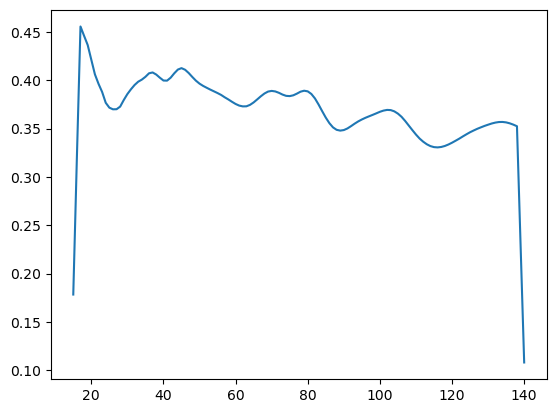

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(15, 141), sumOver)

In [85]:
def plot_averaged_spectrum(phasic_data, rat_id=None, condition=None, trial_num=None, show=False):

    filters = []
    if rat_id is not None:
        filters.append(phasic_data["rat_id"] == rat_id)
    if condition is not None:
        filters.append(phasic_data["condition"] == condition)
    if trial_num is not None:
        filters.append(phasic_data["trial_num"] == trial_num)

    if filters:
        filtered_data = phasic_data[np.logical_and.reduce(filters)]
    else:
        filtered_data = phasic_data  

    if filtered_data.empty:
        print("No data matches the given filters.")
        return

    averaged_spectra = np.zeros((len(filtered_data), 126))

    for i in range(len(filtered_data)):
        temp = clean_averaged_data(filtered_data['average_spectrum'].iloc[i])
        averaged_spectra[i] = temp

    sumOver = np.mean(averaged_spectra, axis=0)
    
    if show == True:
        plt.plot(range(15, 141), sumOver)
        plt.xlabel('Frequency')
        plt.ylabel('Averaged Spectrum')
        plt.title(f'Averaged Spectrum (rat_id={rat_id}, condition={condition}, trial_num={trial_num})')
        plt.show()
        return sumOver
    else:
        return sumOver

In [92]:
rat1_hc_tn5 = plot_averaged_spectrum(phasic_data, rat_id=1, condition='HC', trial_num=5)
rat3_hc_tn5 = plot_averaged_spectrum(phasic_data, rat_id=3, condition='HC', trial_num=5)
rat6_hc_tn5 = plot_averaged_spectrum(phasic_data, rat_id=6, condition='HC', trial_num=5)
rat13_hc_tn5 = plot_averaged_spectrum(phasic_data, rat_id=13, condition='HC', trial_num=5)

In [93]:
average_over_rats = np.mean([rat1_hc_tn5, rat3_hc_tn5, rat6_hc_tn5, rat13_hc_tn5], axis=0)

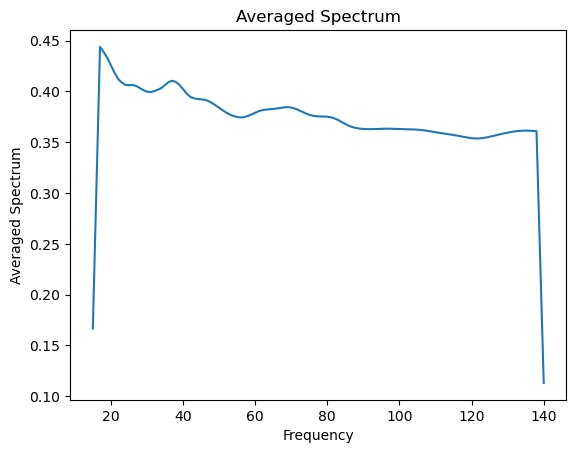

In [95]:
plt.plot(range(15, 141), average_over_rats)
plt.xlabel('Frequency')
plt.ylabel('Averaged Spectrum')
plt.title('Averaged Spectrum')
plt.show()

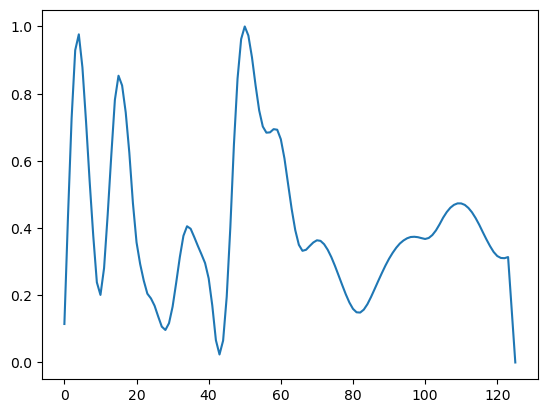

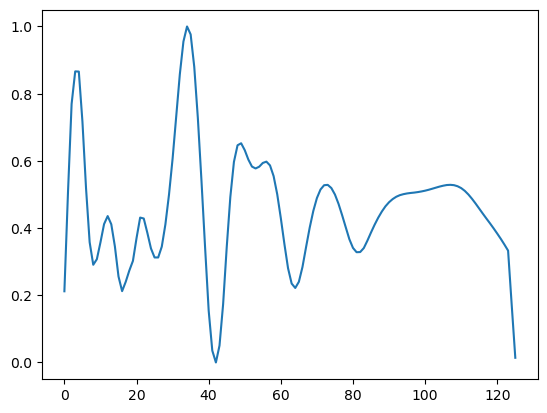

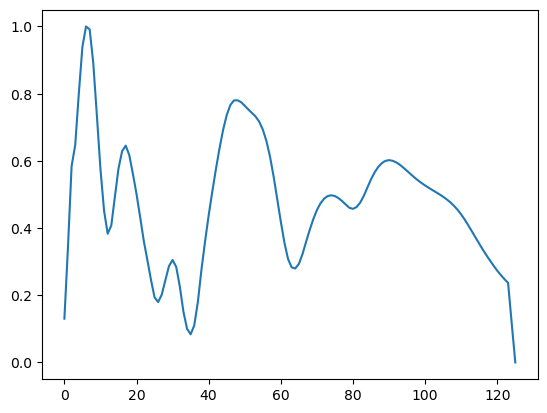

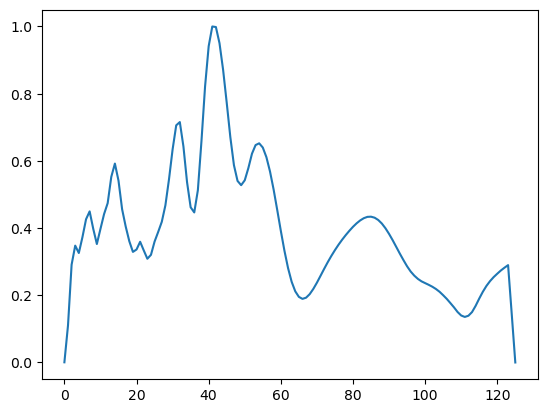

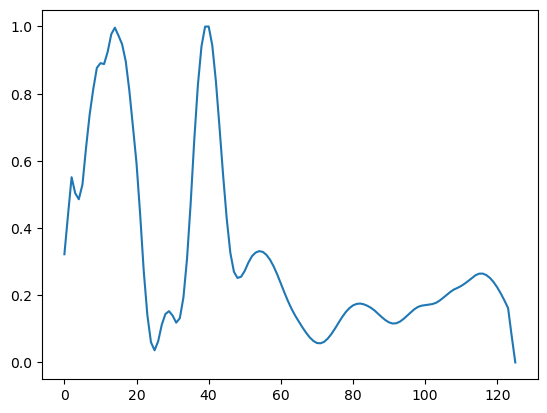

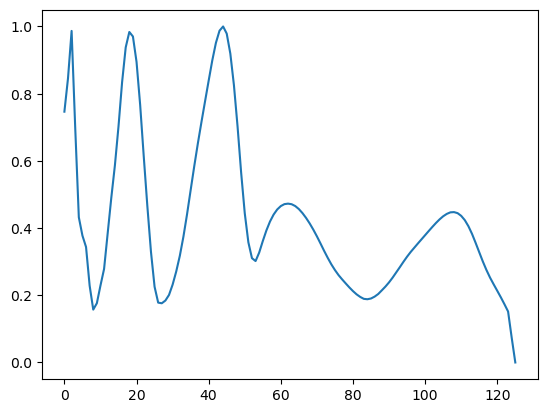

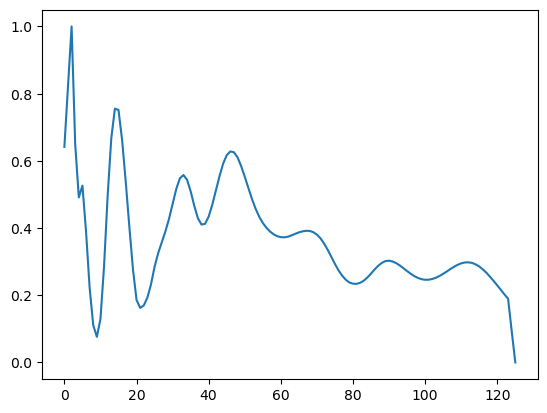

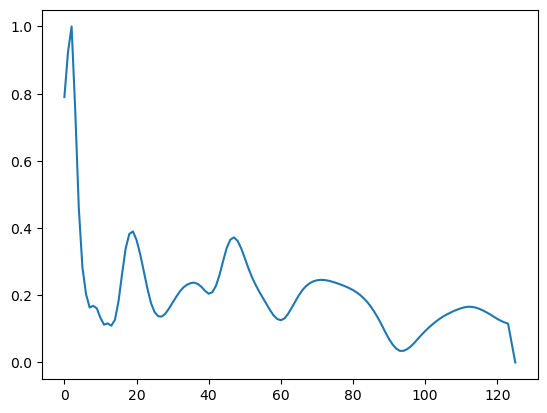

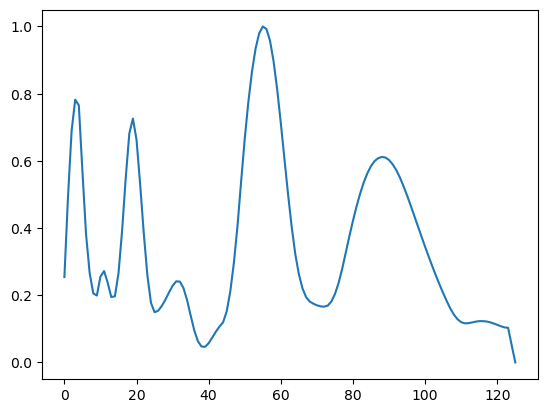

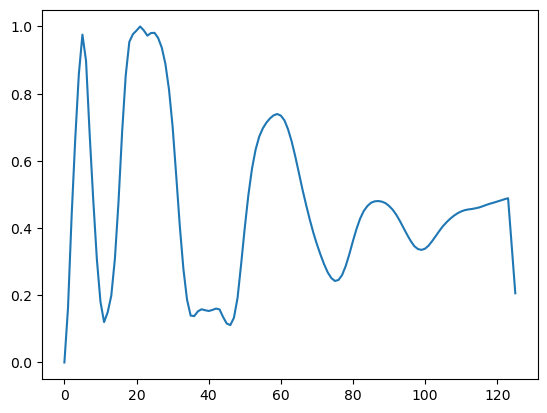

In [103]:
for i in range(10):
    plt.figure()
    plt.plot(averaged_rat1_hc_tn5[i])

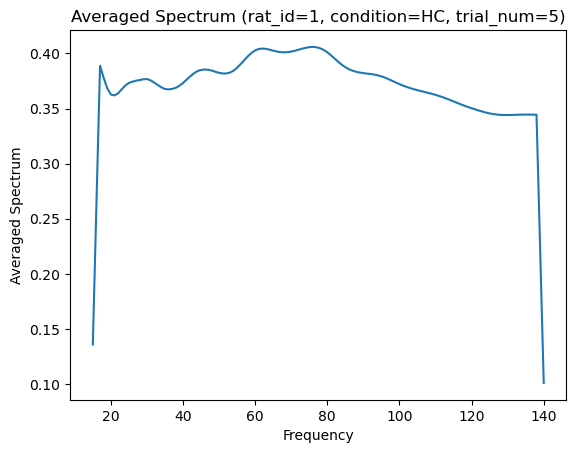

array([0.13588505, 0.26331282, 0.38873588, 0.37784262, 0.36826143,
       0.36268593, 0.36187622, 0.36376425, 0.36736049, 0.37080524,
       0.37322696, 0.3743656 , 0.37525722, 0.37581505, 0.37651412,
       0.3767315 , 0.37557775, 0.37354589, 0.37131825, 0.36922636,
       0.36773804, 0.36735532, 0.36777957, 0.36877268, 0.37063738,
       0.37319302, 0.37613927, 0.37914701, 0.38190119, 0.38391422,
       0.38497241, 0.38539297, 0.38518792, 0.38437444, 0.3832903 ,
       0.38234675, 0.38178074, 0.3817668 , 0.38254945, 0.38430459,
       0.38698211, 0.39032885, 0.39395102, 0.39745238, 0.40046463,
       0.40271411, 0.40399992, 0.40438755, 0.40409108, 0.40340468,
       0.40249295, 0.40167412, 0.40115974, 0.40098804, 0.40112473,
       0.40161716, 0.40236914, 0.40330158, 0.4042356 , 0.4050618 ,
       0.40564167, 0.40586329, 0.40555097, 0.40465412, 0.40311128,
       0.40097098, 0.39833366, 0.39541313, 0.39247274, 0.3897834 ,
       0.38747856, 0.38565022, 0.38429719, 0.38333036, 0.38261

In [107]:
plot_averaged_spectrum(tonic_data, rat_id=1, condition='HC', trial_num=5, show=True)

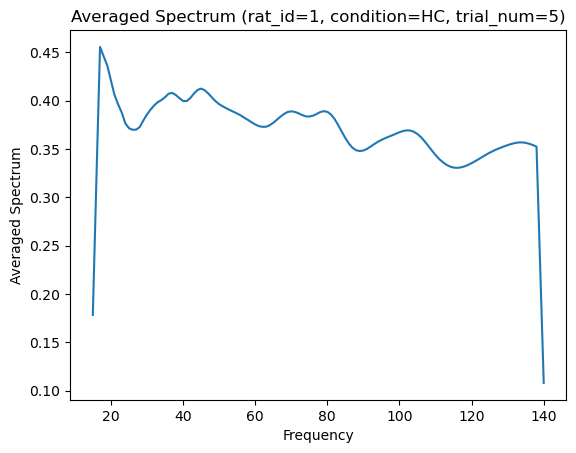

array([0.178252  , 0.31974999, 0.45558204, 0.4458949 , 0.43638791,
       0.42119311, 0.40606518, 0.39626187, 0.3878318 , 0.37663074,
       0.37160407, 0.36988293, 0.36998147, 0.37266696, 0.37950971,
       0.38564754, 0.39064302, 0.39505025, 0.39844514, 0.40058493,
       0.40347566, 0.40714331, 0.40801036, 0.40584412, 0.40259085,
       0.39966275, 0.39954496, 0.40258815, 0.40713837, 0.41100005,
       0.41248211, 0.41081198, 0.40743654, 0.40335143, 0.39951785,
       0.39644111, 0.39410194, 0.39214617, 0.39025181, 0.3884744 ,
       0.3866843 , 0.38473237, 0.38227569, 0.3800663 , 0.3776555 ,
       0.37541182, 0.37372594, 0.37290556, 0.37298968, 0.37448976,
       0.37700894, 0.38015022, 0.38337119, 0.38623439, 0.38824596,
       0.38892376, 0.38838039, 0.3869631 , 0.38513763, 0.38381084,
       0.38354408, 0.38437353, 0.38610895, 0.3881192 , 0.3891129 ,
       0.38845646, 0.38576656, 0.38113114, 0.37486912, 0.36797533,
       0.36130774, 0.35555661, 0.35119059, 0.34867169, 0.34784

In [105]:
plot_averaged_spectrum(phasic_data, rat_id=1, condition='HC', trial_num=5, show=True)

In [129]:
def plot_averaged_spectrum(phasic_data, tonic_data, rat_id=None, condition=None, trial_num=None, show=False):

    def process_data(data):

        filters = []
        if rat_id is not None:
            filters.append(data["rat_id"] == rat_id)
        if condition is not None:
            filters.append(data["condition"] == condition)
        if trial_num is not None:
            filters.append(data["trial_num"] == trial_num)

        if filters:
            filtered_data = data[np.logical_and.reduce(filters)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No data matches the given filters.")
            return None

        averaged_spectra = np.zeros((len(filtered_data), 126))
        for i in range(len(filtered_data)):
            temp = clean_averaged_data(filtered_data['average_spectrum'].iloc[i])
            averaged_spectra[i] = temp

        return np.mean(averaged_spectra, axis=0)

    phasic_sumOver = process_data(phasic_data)
    if phasic_sumOver is None:
        return

    tonic_sumOver = process_data(tonic_data)
    if tonic_sumOver is None:
        return

    if show:
        plt.plot(range(15, 141), phasic_sumOver, label='Phasic')
        plt.plot(range(15, 141), tonic_sumOver, label='Tonic')
        plt.xlabel('Frequency')
        plt.ylabel('Averaged Spectrum')
        plt.title(f'Averaged Spectrum (rat_id={rat_id}, condition={condition}, trial_num={trial_num})')
        plt.legend()
        plt.show()
    else:
        return phasic_sumOver, tonic_sumOver

In [136]:
def smooth_with_padding(data, window_size=5):
    """
    Smooths the data using a rolling window and adds padding.

    Parameters:
        data (np.array): The input data to smooth.
        window_size (int): The size of the rolling window (default: 5Hz).

    Returns:
        np.array: Smoothed data with padding.
    """
    # Add padding to the data
    padding = window_size // 2
    padded_data = np.pad(data, (padding, padding), mode='edge')  # Use edge padding

    # Smooth the data using a rolling window
    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')

    return smoothed_data

def plot_averaged_spectrum_with_smoothing(phasic_data, tonic_data, rat_id=None, condition=None, trial_num=None, show=False):

    def process_data(data):

        filters = []
        if rat_id is not None:
            filters.append(data["rat_id"] == rat_id)
        if condition is not None:
            filters.append(data["condition"] == condition)
        if trial_num is not None:
            filters.append(data["trial_num"] == trial_num)

        if filters:
            filtered_data = data[np.logical_and.reduce(filters)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No data matches the given filters.")
            return None

        averaged_spectra = np.zeros((len(filtered_data), 126))
        for i in range(len(filtered_data)):
            temp = clean_averaged_data(filtered_data['average_spectrum'].iloc[i])
            averaged_spectra[i] = temp

        return np.mean(averaged_spectra, axis=0)

    phasic_sumOver = process_data(phasic_data)
    if phasic_sumOver is None:
        return
    
    tonic_sumOver = process_data(tonic_data)
    if tonic_sumOver is None:
        return

    phasic_smoothed = smooth_with_padding(phasic_sumOver, window_size=5)
    tonic_smoothed = smooth_with_padding(tonic_sumOver, window_size=5)

    if show:
        plt.plot(range(15, 141), phasic_smoothed, label='Phasic (Smoothed)')
        plt.plot(range(15, 141), tonic_smoothed, label='Tonic (Smoothed)')
        plt.xlabel('Frequency')
        plt.ylabel('Averaged Spectrum')
        plt.title(f'Averaged Spectrum (rat_id={rat_id}, condition={condition}, trial_num={trial_num})')
        plt.legend()
        plt.show()
    else:
        return phasic_smoothed, tonic_smoothed

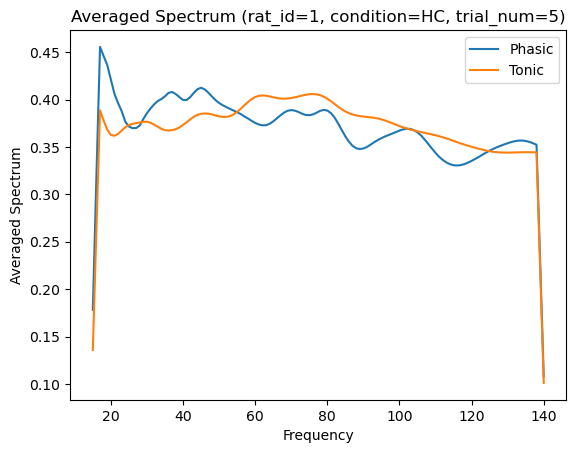

In [137]:
plot_averaged_spectrum(phasic_data, tonic_data, rat_id=1, condition='HC', trial_num=5, show=True)

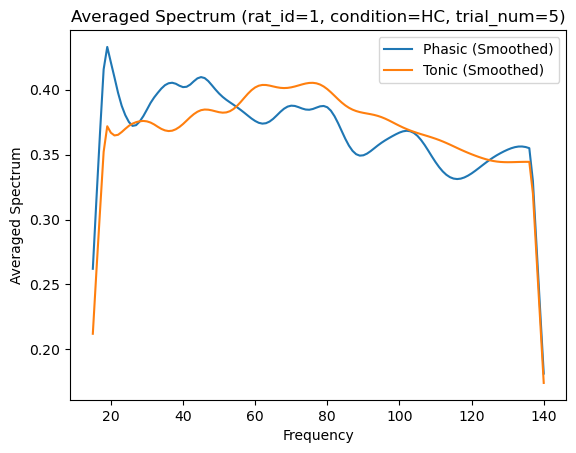

In [138]:
plot_averaged_spectrum_with_smoothing(phasic_data, tonic_data, rat_id=1, condition='HC', trial_num=5, show=True)

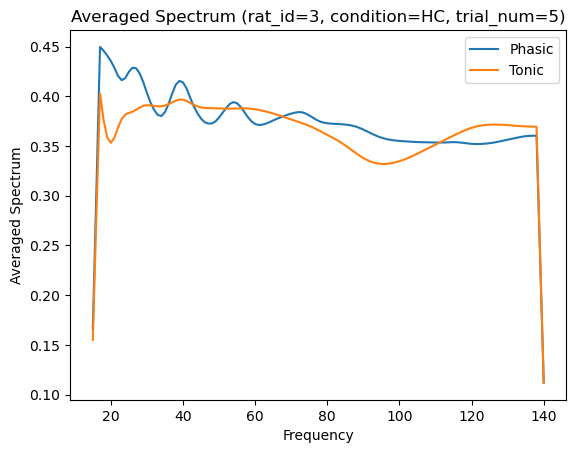

In [139]:
plot_averaged_spectrum(phasic_data, tonic_data, rat_id=3, condition='HC', trial_num=5, show=True)

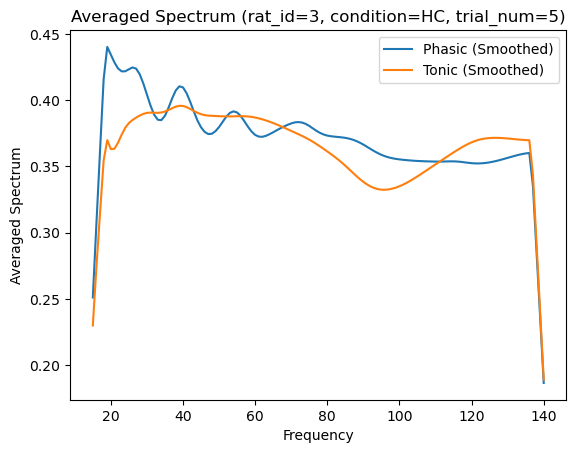

In [140]:
plot_averaged_spectrum_with_smoothing(phasic_data, tonic_data, rat_id=3, condition='HC', trial_num=5, show=True)

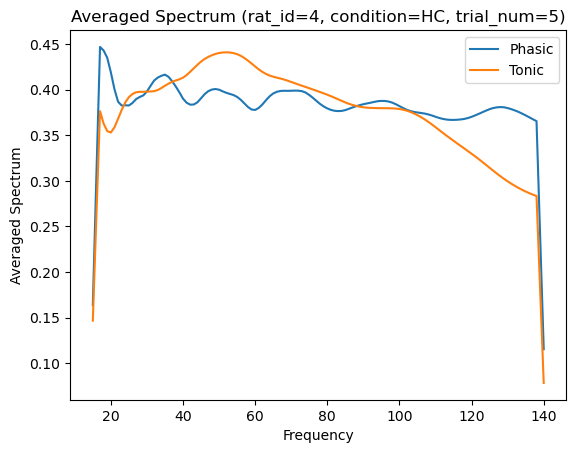

In [141]:
plot_averaged_spectrum(phasic_data, tonic_data, rat_id=4, condition='HC', trial_num=5, show=True)

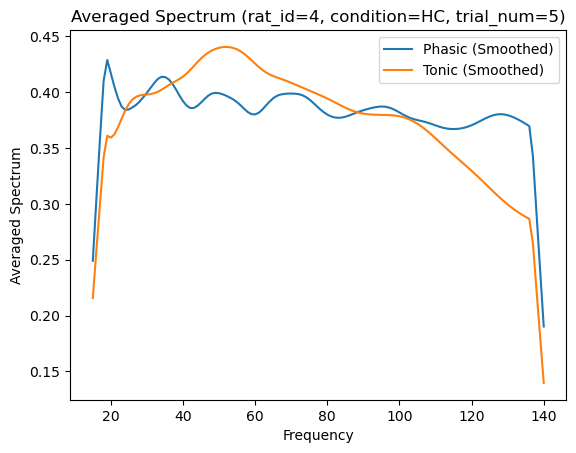

In [142]:
plot_averaged_spectrum_with_smoothing(phasic_data, tonic_data, rat_id=4, condition='HC', trial_num=5, show=True)

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clean_averaged_data(x):

    temp = x.strip('[]')
    temp = temp.split()
    temp = np.array([float(y) for y in temp])
    return temp

def smooth_with_padding(data, window_size=5):

    padding = window_size // 2
    padded_data = np.pad(data, (padding, padding), mode='edge')  

    smoothed_data = np.convolve(padded_data, np.ones(window_size) / window_size, mode='valid')

    return smoothed_data

def plot_averaged_spectrum_with_sem(phasic_data, tonic_data, rat_id=None, condition=None, trial_num=None, show=False):

    def process_data(data):

        filters = []
        if rat_id is not None:
            filters.append(data["rat_id"] == rat_id)
        if condition is not None:
            filters.append(data["condition"] == condition)
        if trial_num is not None:
            filters.append(data["trial_num"] == trial_num)

        if filters:
            filtered_data = data[np.logical_and.reduce(filters)]
        else:
            filtered_data = data

        if filtered_data.empty:
            print("No data matches the given filters.")
            return None, None

        cleaned_data = filtered_data['average_spectrum'].apply(clean_averaged_data).tolist()
        cleaned_data = np.array(cleaned_data)

        mean_data = np.mean(cleaned_data, axis=0)
        sem_data = np.std(cleaned_data, axis=0) / np.sqrt(len(cleaned_data))  

        return mean_data, sem_data

    phasic_mean, phasic_sem = process_data(phasic_data)
    if phasic_mean is None:
        return

    tonic_mean, tonic_sem = process_data(tonic_data)
    if tonic_mean is None:
        return

    phasic_smoothed = smooth_with_padding(phasic_mean, window_size=5)
    tonic_smoothed = smooth_with_padding(tonic_mean, window_size=5)

    phasic_sem_smoothed = smooth_with_padding(phasic_sem, window_size=5)
    tonic_sem_smoothed = smooth_with_padding(tonic_sem, window_size=5)

    if show:
        plt.plot(range(15, 141), phasic_smoothed, label='Phasic (Smoothed)')
        plt.fill_between(range(15, 141), phasic_smoothed - phasic_sem_smoothed, phasic_smoothed + phasic_sem_smoothed, alpha=0.3, label='Phasic SEM')

        plt.plot(range(15, 141), tonic_smoothed, label='Tonic (Smoothed)')
        plt.fill_between(range(15, 141), tonic_smoothed - tonic_sem_smoothed, tonic_smoothed + tonic_sem_smoothed, alpha=0.3, label='Tonic SEM')
        plt.xlim(20, 135)
        plt.xlabel('Frequency') 
        plt.ylabel('Averaged Spectrum')
        plt.title(f'Averaged Spectrum (rat_id={rat_id}, condition={condition}, trial_num={trial_num})')
        plt.legend()
        plt.show()
    else:
        return (phasic_smoothed, phasic_sem_smoothed), (tonic_smoothed, tonic_sem_smoothed)

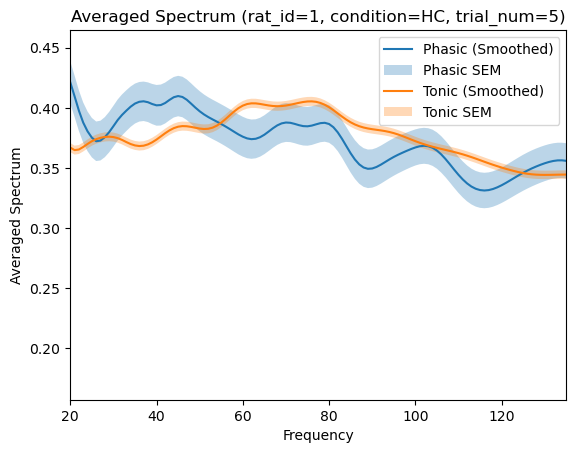

In [163]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=1, condition='HC', trial_num=5, show=True
)

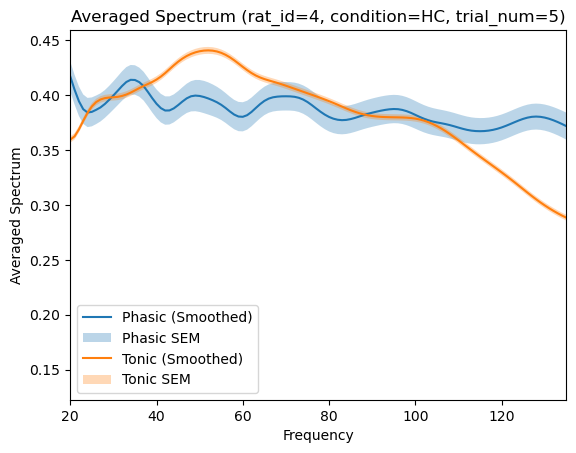

In [164]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=4, condition='HC', trial_num=5, show=True
)

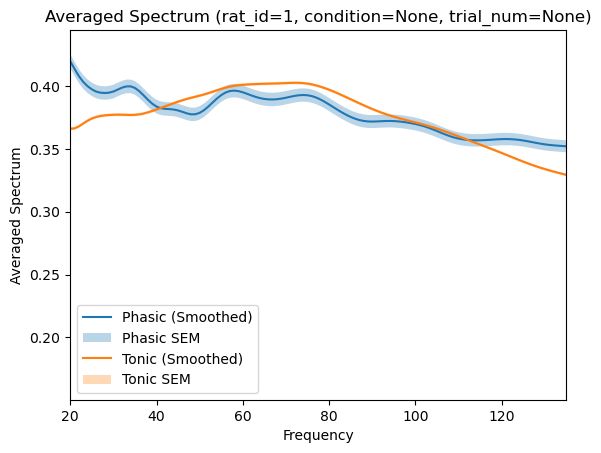

In [165]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=1, show=True
)

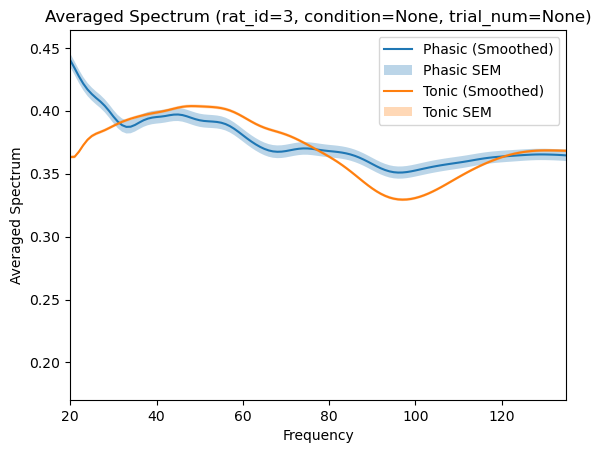

In [169]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=3, show=True
)

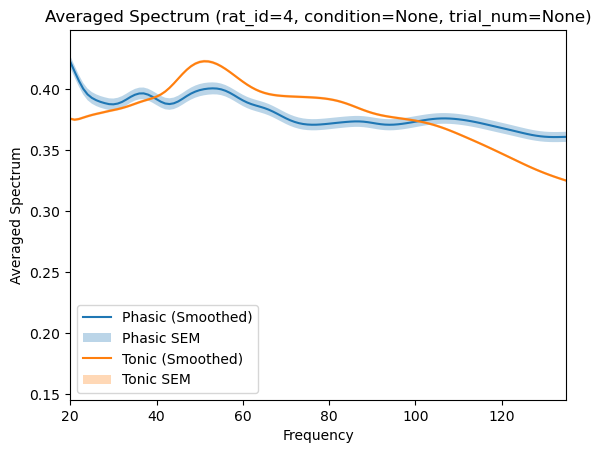

In [168]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=4, show=True
)

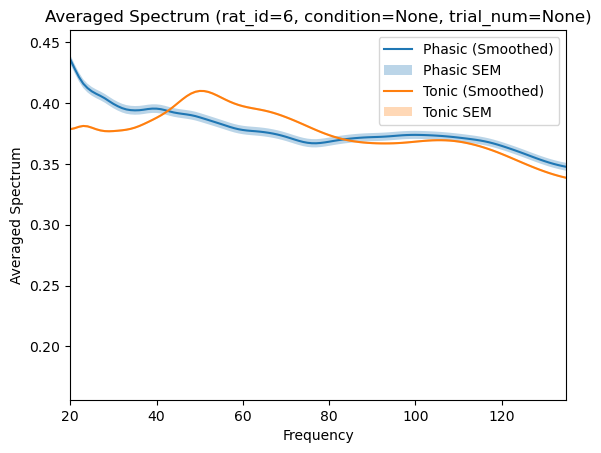

In [166]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=6, show=True
)

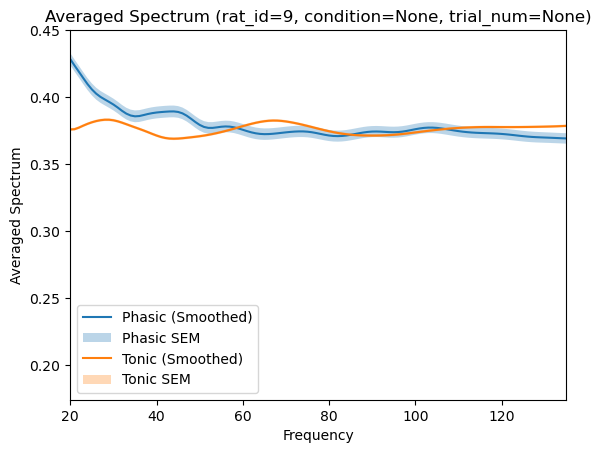

In [167]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=9, show=True
)

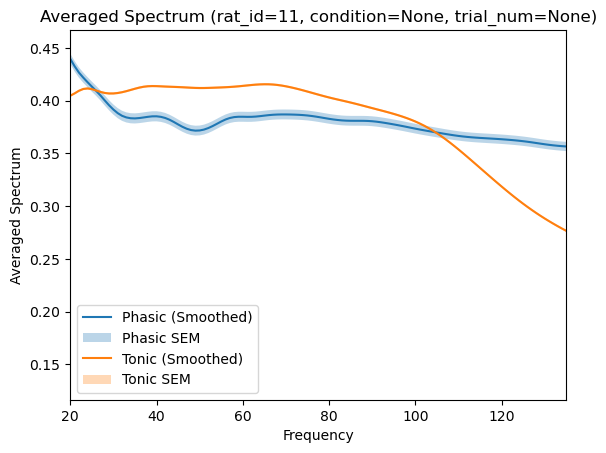

In [170]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=11, show=True
)

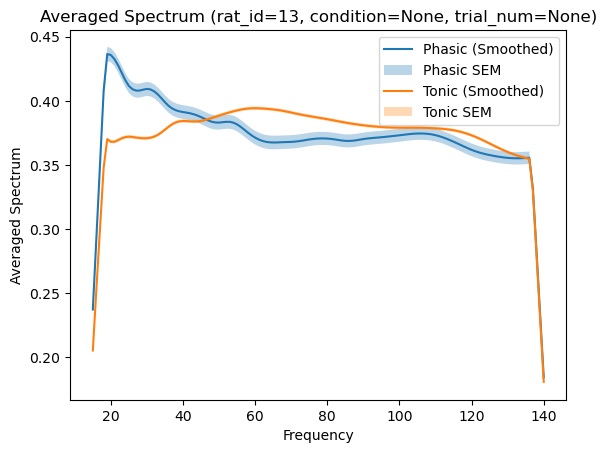

In [154]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, rat_id=13, show=True
)

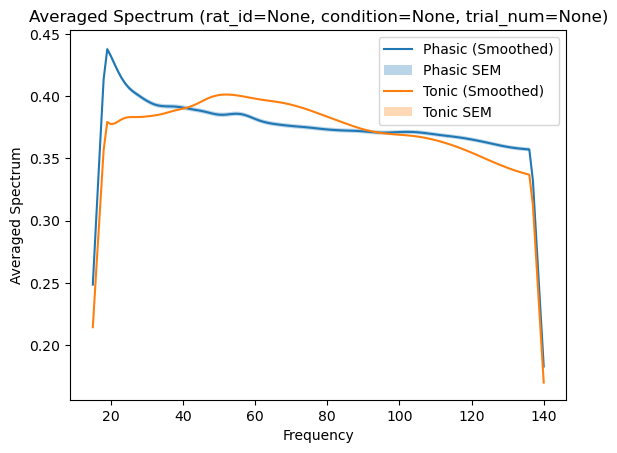

In [155]:
# Example usage
plot_averaged_spectrum_with_sem(
    phasic_data, tonic_data, show=True
)

# Entropy dist

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [5]:
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data = pd.read_csv('tonic_data.csv')

In [20]:
phasic_data

rat_id  study_day condition  treatment  trial_num   state  \
0           1          1        OD          4          3  phasic   
1           1          1        OD          4          3  phasic   
2           1          1        OD          4          3  phasic   
3           1          1        OD          4          3  phasic   
4           1          1        OD          4          3  phasic   
...       ...        ...       ...        ...        ...     ...   
21716      13          1       CON          4          5  phasic   
21717      13          1       CON          4          5  phasic   
21718      13          1       CON          4          5  phasic   
21719      13          1       CON          4          5  phasic   
21720      13          1       CON          4          5  phasic   

       mode_frequency   entropy  \
0                  34  6.822997   
1                 114  6.847990   
2                  20  6.622293   
3                  19  6.564762   
4                  19  6.682347   
...               ...       ...   
21716              56  6.603292   
21717              15  6.764916   
21718              16  6.617730   
21719              19  6.585084   
21720              27  6.664088   

                                        average_spectrum  
0      [0.18915364 0.49226589 0.79709468 0.81499971 0...  
1      [0.26293508 0.3874831  0.52833994 0.3857396  0...  
2      [4.33919371e-02 2.46563173e-01 5.09325802e-01 ...  
3      [0.07020712 0.37360049 0.69317333 0.87446633 1...  
4      [2.70848661e-02 3.10919943e-01 6.57174965e-01 ...  
...                                                  ...  
21716  [0.11205772 0.19205941 0.21596513 0.2448167  0...  
21717  [0.29535163 0.44654928 0.52973734 0.27464624 0...  
21718  [0.49749702 0.63233346 0.76126964 0.62826582 0...  
21719  [2.94043501e-01 5.55803180e-01 8.21570281e-01 ...  
21720  [7.40050809e-04 6.69479628e-02 1.40670074e-01 ...  

[21721 rows x 9 columns]

In [18]:
def plot_entropy_distribution(phasic_data, tonic_data, rat_id=None, study_day=None, condition=None, trial_num=None):
    """
    Generates three plots:
    1. Entropy distribution for phasic data.
    2. Entropy distribution for tonic data.
    3. Combined normalized entropy distribution for both phasic and tonic data.
    
    Parameters:
        phasic_data (DataFrame): DataFrame containing phasic data.
        tonic_data (DataFrame): DataFrame containing tonic data.
        rat_id (int, optional): Filter by rat ID.
        study_day (int, optional): Filter by study day.
        condition (str, optional): Filter by condition.
        trial_num (int, optional): Filter by trial number.
    """
    # Apply filters to phasic data
    phasic_filtered = phasic_data
    if rat_id is not None:
        phasic_filtered = phasic_filtered[phasic_filtered['rat_id'] == rat_id]
    if study_day is not None:
        phasic_filtered = phasic_filtered[phasic_filtered['study_day'] == study_day]
    if condition is not None:
        phasic_filtered = phasic_filtered[phasic_filtered['condition'] == condition]
    if trial_num is not None:
        phasic_filtered = phasic_filtered[phasic_filtered['trial_num'] == trial_num]
    
    # Apply filters to tonic data
    tonic_filtered = tonic_data
    if rat_id is not None:
        tonic_filtered = tonic_filtered[tonic_filtered['rat_id'] == rat_id]
    if study_day is not None:
        tonic_filtered = tonic_filtered[tonic_filtered['study_day'] == study_day]
    if condition is not None:
        tonic_filtered = tonic_filtered[tonic_filtered['condition'] == condition]
    if trial_num is not None:
        tonic_filtered = tonic_filtered[tonic_filtered['trial_num'] == trial_num]
    
    # Extract entropy values
    phasic_entropy = phasic_filtered['entropy'] if not phasic_filtered.empty else []
    tonic_entropy = tonic_filtered['entropy'] if not tonic_filtered.empty else []
    
    # Check if there's data to plot
    if phasic_filtered.empty and tonic_filtered.empty:
        print("No data found for the specified filters.")
        return
    
    # Dynamic title based on conditions
    title_conditions = f"Rat ID: {rat_id if rat_id is not None else 'All'}, " \
                       f"Study Day: {study_day if study_day is not None else 'All'}, " \
                       f"Condition: {condition if condition is not None else 'All'}, " \
                       f"Trial #: {trial_num if trial_num is not None else 'All'}"
    
    # 1. Plot entropy distribution for phasic data
    plt.figure(figsize=(8, 6))
    plt.hist(phasic_entropy, bins=20, edgecolor='black', alpha=0.7, color='blue')
    plt.title(f'Entropy Distribution - Phasic Data\n({title_conditions})', fontsize=16)
    plt.xlabel('Entropy', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()
    
    # 2. Plot entropy distribution for tonic data
    plt.figure(figsize=(8, 6))
    plt.hist(tonic_entropy, bins=20, edgecolor='black', alpha=0.7, color='orange')
    plt.title(f'Entropy Distribution - Tonic Data\n({title_conditions})', fontsize=16)
    plt.xlabel('Entropy', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()
    
    # 3. Plot normalized entropy distribution for both phasic and tonic data
    plt.figure(figsize=(8, 6))
    plt.hist(phasic_entropy, bins=20, edgecolor='black', alpha=0.7, label='Phasic (Normalized)', color='blue', density=True)
    plt.hist(tonic_entropy, bins=20, edgecolor='black', alpha=0.7, label='Tonic (Normalized)', color='orange', density=True)
    plt.title(f'Normalized Entropy Distribution - Phasic vs Tonic\n({title_conditions})', fontsize=16)
    plt.xlabel('Entropy', fontsize=14)
    plt.ylabel('Normalized Frequency', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

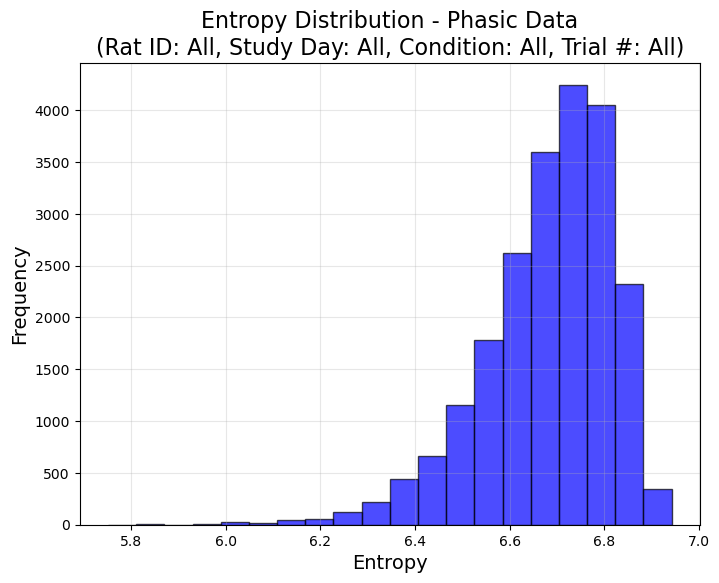

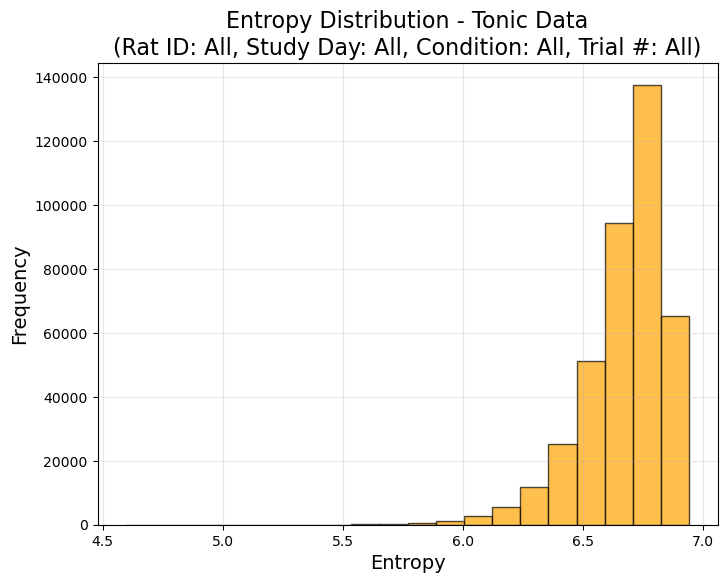

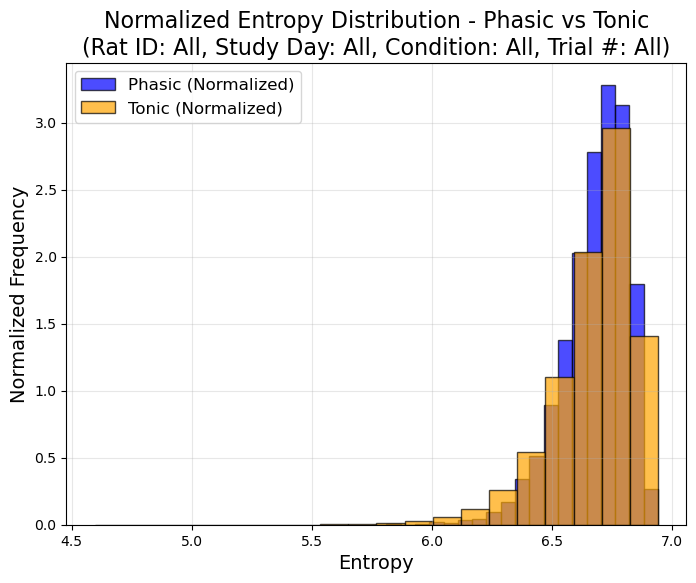

In [19]:
# Example usage
plot_entropy_distribution(phasic_data, tonic_data)

In [1]:
# Function to clean and extract 'average_spectrum' data
def clean_averaged_data(x):
    temp = x.strip('[]')
    temp = temp.split()
    temp = np.array([float(y) for y in temp])
    return temp

In [6]:
# Convert 'average_spectrum' from string to numerical arrays
phasic_data['average_spectrum'] = phasic_data['average_spectrum'].apply(clean_averaged_data)
tonic_data['average_spectrum'] = tonic_data['average_spectrum'].apply(clean_averaged_data)

In [11]:
a = phasic_data['average_spectrum']
print(a.shape)

(21721,)


In [9]:
# Function to sample 5 examples from each percentile range
def sample_from_percentiles(data, column='entropy'):
    """
    Divides data into three percentile-based ranges and samples 5 from each.
    Returns a dictionary with sampled data.
    """
    # Compute percentiles
    p25 = np.percentile(data[column], 25)
    p75 = np.percentile(data[column], 75)
    
    # Filter data based on percentiles
    low_entropy = data[data[column] <= p25].sample(n=min(5, len(data[data[column] <= p25])))
    mid_entropy = data[(data[column] > p25) & (data[column] <= p75)].sample(n=min(5, len(data[(data[column] > p25) & (data[column] <= p75)])), random_state=42)
    high_entropy = data[data[column] > p75].sample(n=min(5, len(data[data[column] > p75])))
    
    return {'low': low_entropy, 'mid': mid_entropy, 'high': high_entropy}


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_average_spectrum(samples, state_name):
    """
    Plots the average_spectrum for sampled entropy ranges.
    - 3 rows (low, mid, high entropy)
    - 5 plots per row
    - X-axis: Frequency (15-140 Hz)
    - Y-axis: Average Spectrum (Power)
    """
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), sharex=True, sharey=True)
    entropy_levels = ["low", "mid", "high"]
    
    for row_idx, level in enumerate(entropy_levels):
        df = samples[level]
        for col_idx, (idx, row) in enumerate(df.iterrows()):
            ax = axes[row_idx, col_idx]
            spectrum = row['average_spectrum']  # Already converted to NumPy array
            
            # Create frequency axis from 15 to 140 Hz
            freq_axis = np.linspace(15, 140, len(spectrum))
            
            ax.plot(freq_axis, spectrum, alpha=0.8)
            
            # Titles and labels for each plot
            ax.set_title(f"Sample {idx}", fontsize=10)
            if col_idx == 0:
                ax.set_ylabel(f"{level.capitalize()} Entropy", fontsize=12)
            if row_idx == 2:
                ax.set_xlabel("Frequency (Hz)")
    
    # Adjust layout
    fig.suptitle(f'Average Spectrum of {state_name} Data by Entropy Range', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Give space for the title
    plt.show()

In [10]:
# Sample from phasic and tonic data
phasic_samples = sample_from_percentiles(phasic_data)
tonic_samples = sample_from_percentiles(tonic_data)

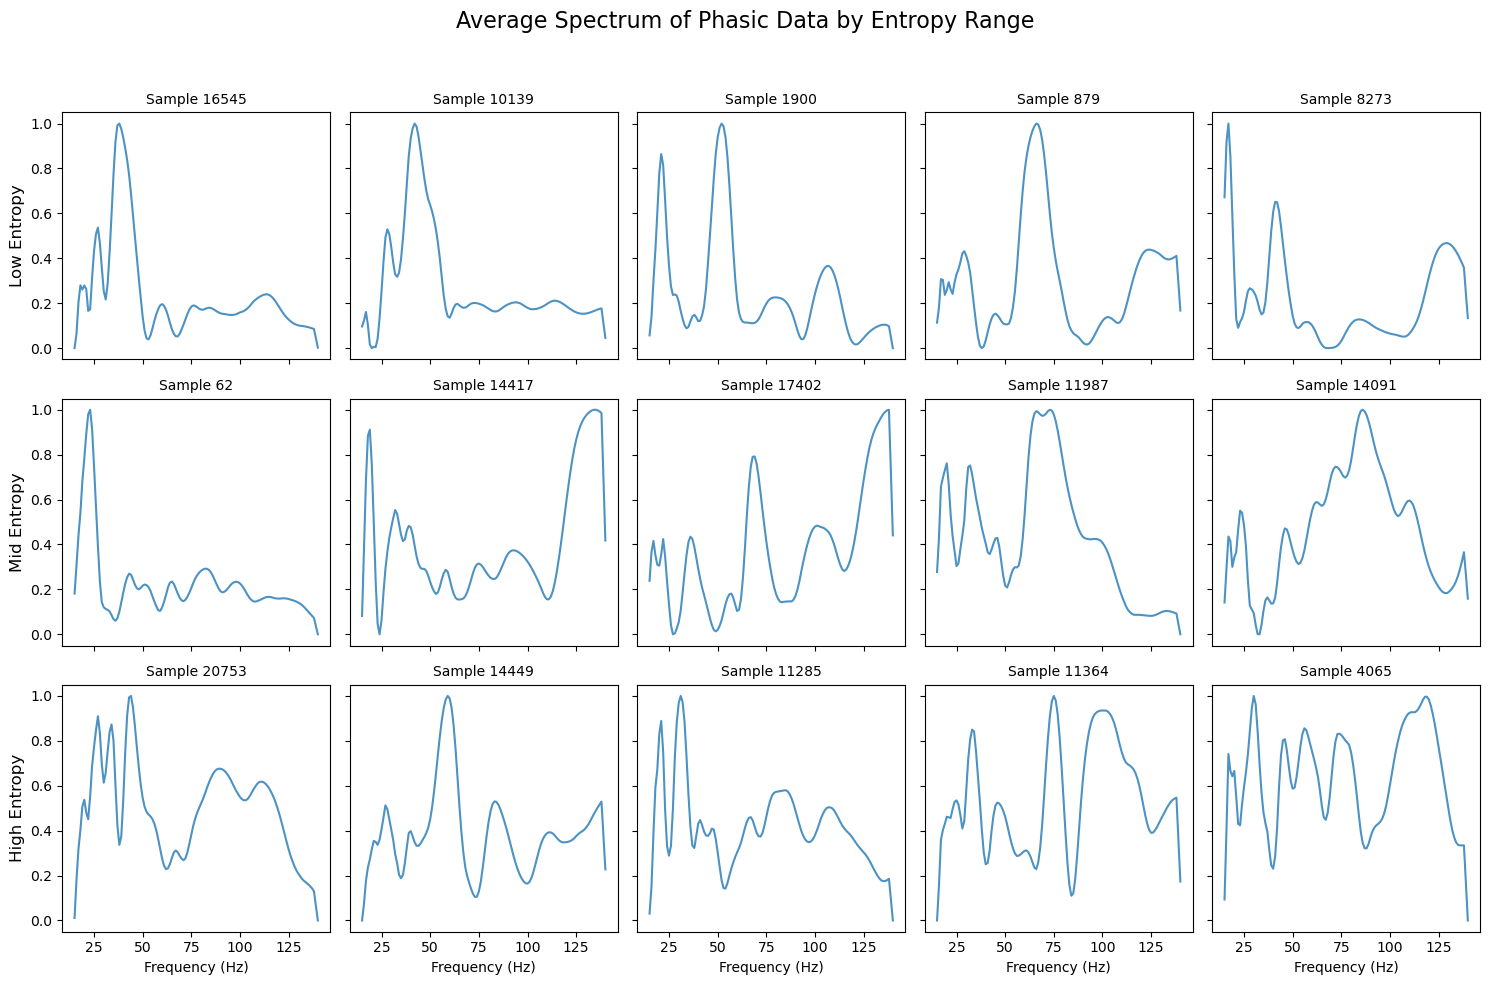

In [55]:
# Plot for phasic and tonic states
plot_average_spectrum(phasic_samples, "Phasic")

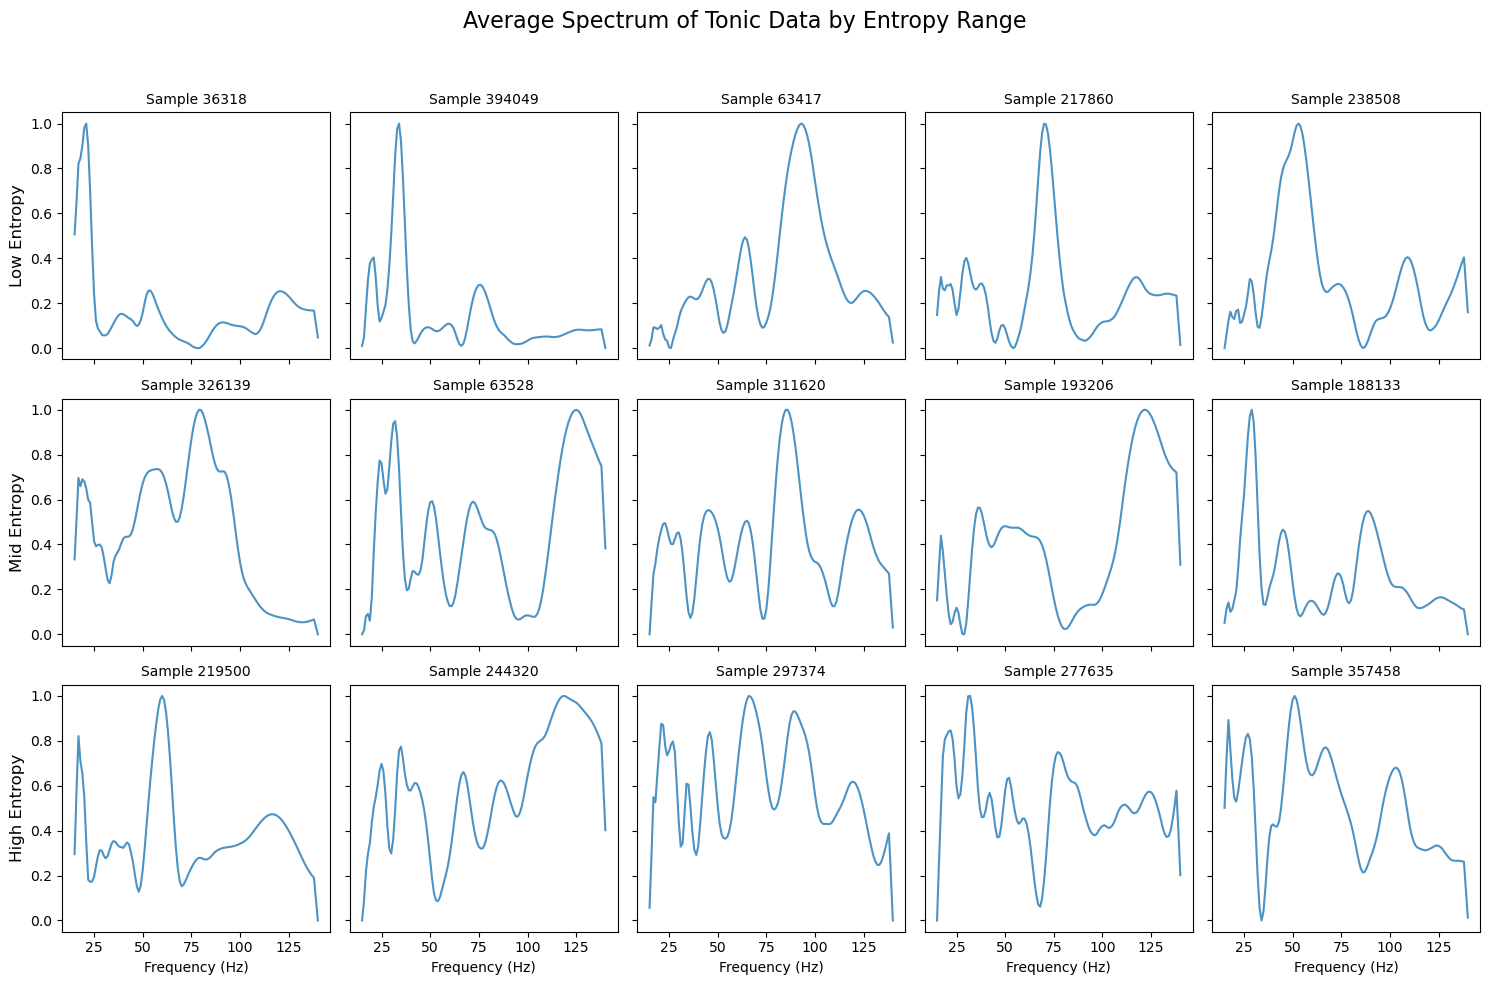

In [56]:
plot_average_spectrum(tonic_samples, "Tonic")

# tSCs 

Number of phasic cycles: (21721,)
Peak frequency of tSC1 (Phasic Data): 130.00 Hz
Peak frequency of tSC2 (Phasic Data): 57.00 Hz
Peak frequency of tSC3 (Phasic Data): 41.00 Hz
Peak frequency of tSC4 (Phasic Data): 107.00 Hz
Peak frequency of tSC5 (Phasic Data): 77.00 Hz


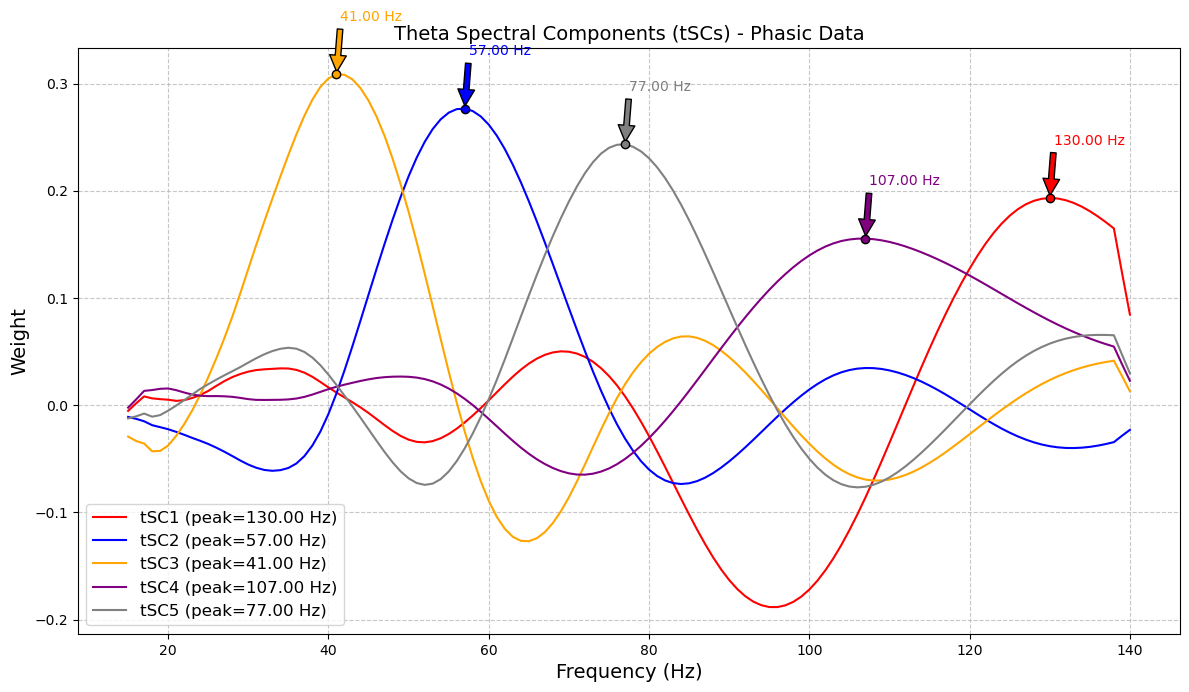

Peak frequency of tSC1 (Tonic Data): 73.00 Hz
Peak frequency of tSC2 (Tonic Data): 57.00 Hz
Peak frequency of tSC3 (Tonic Data): 39.00 Hz
Peak frequency of tSC4 (Tonic Data): 92.00 Hz
Peak frequency of tSC5 (Tonic Data): 81.00 Hz


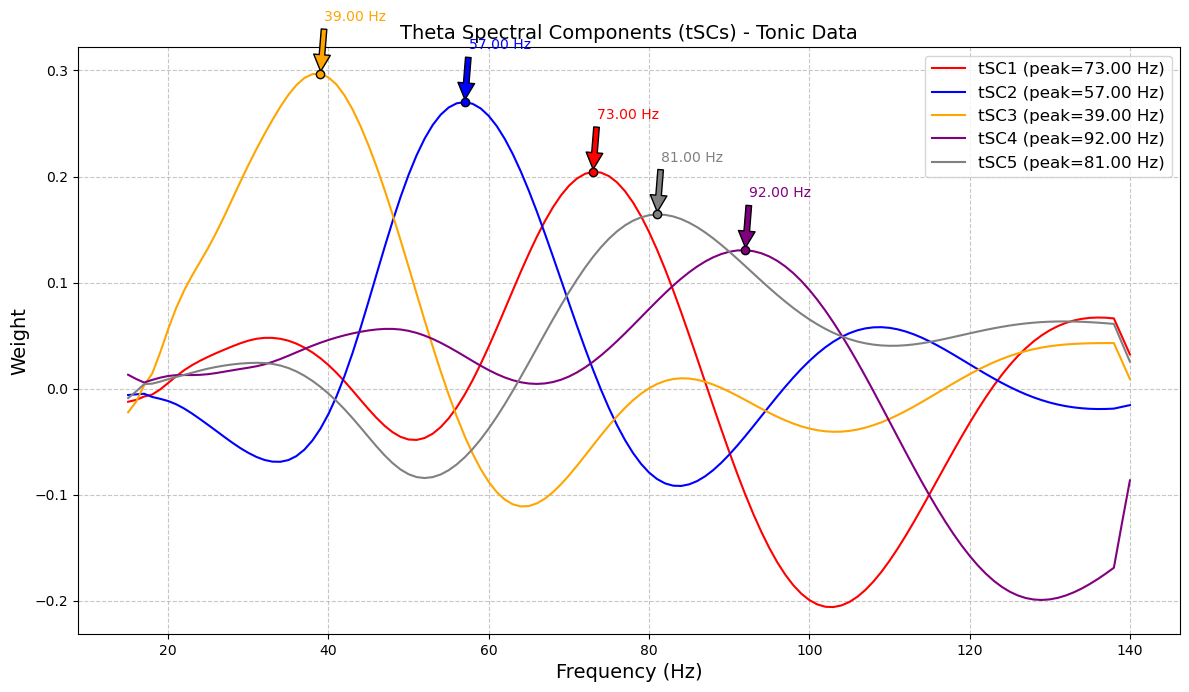


Phasic cycles grouped by component:
  Component 4: 4201 cycles
  Component 3: 4390 cycles
  Component 5: 4417 cycles
  Component 1: 4187 cycles
  Component 2: 4526 cycles

Tonic cycles grouped by component:
  Component 5: 90469 cycles
  Component 2: 88074 cycles
  Component 3: 74706 cycles
  Component 1: 74311 cycles
  Component 4: 68561 cycles


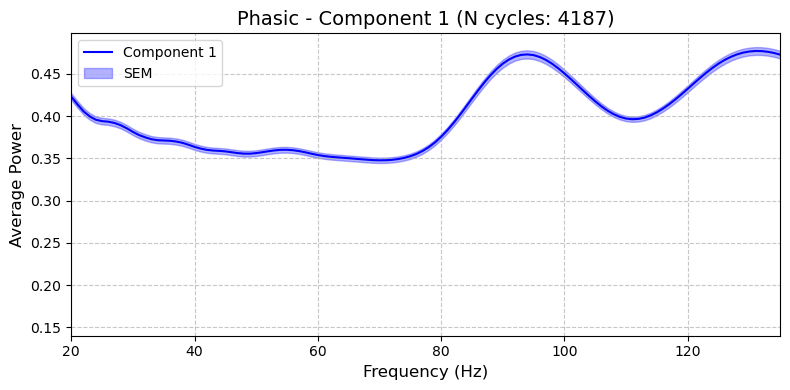

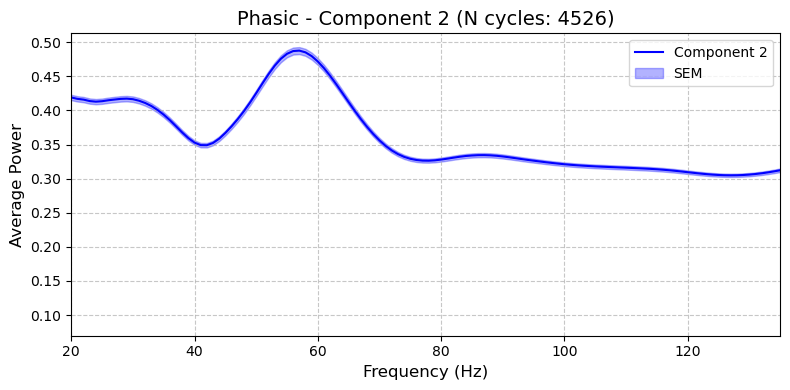

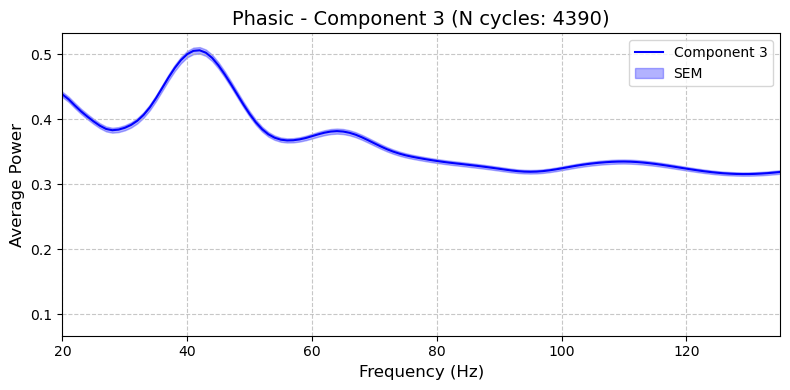

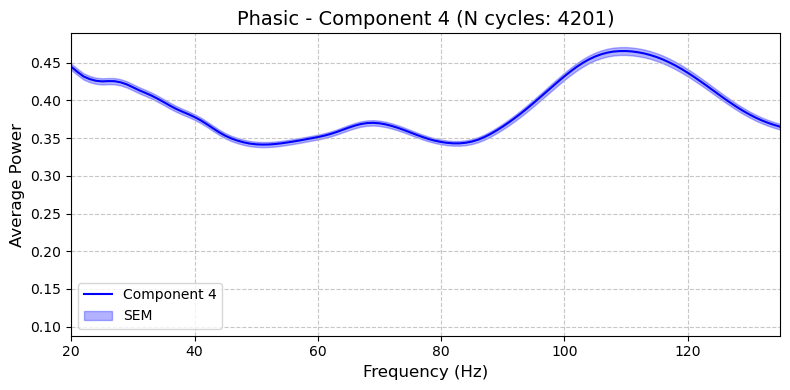

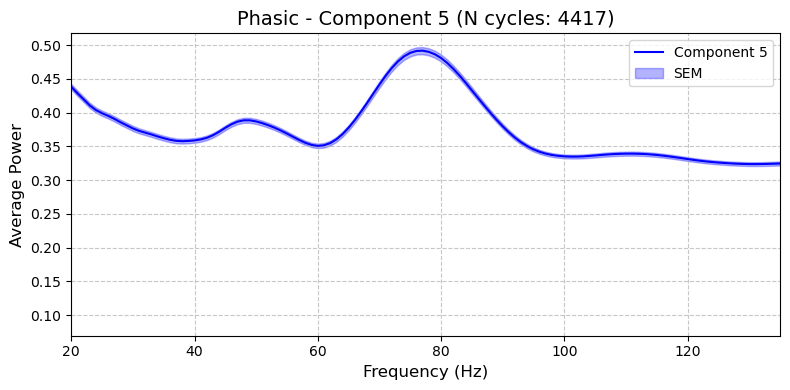

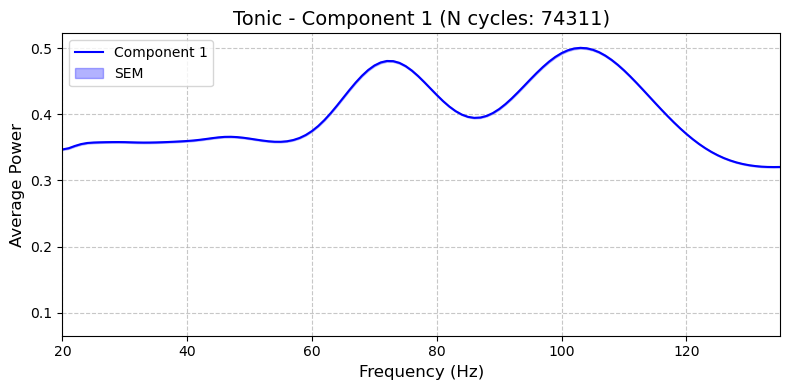

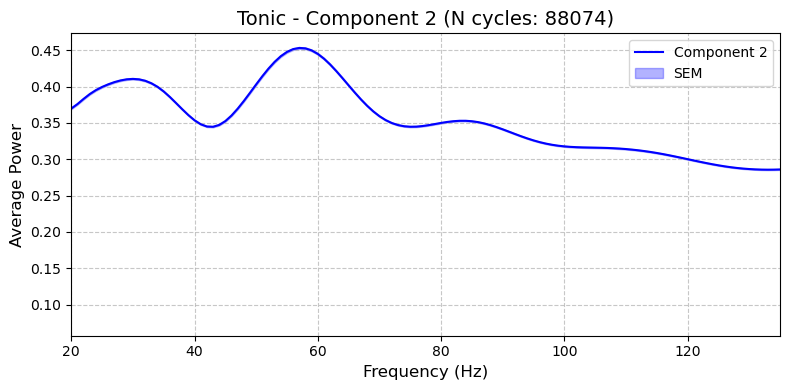

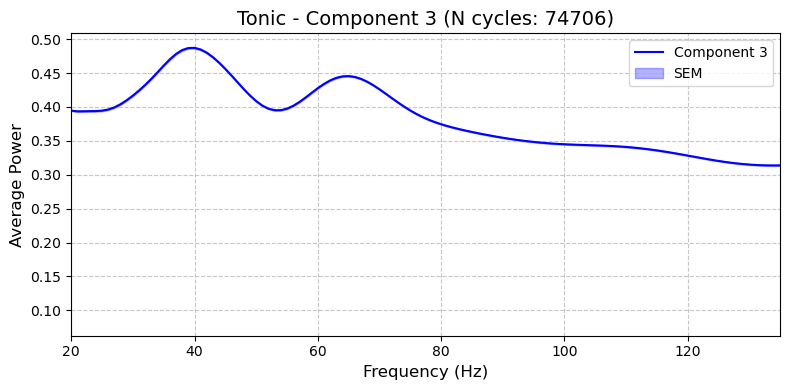

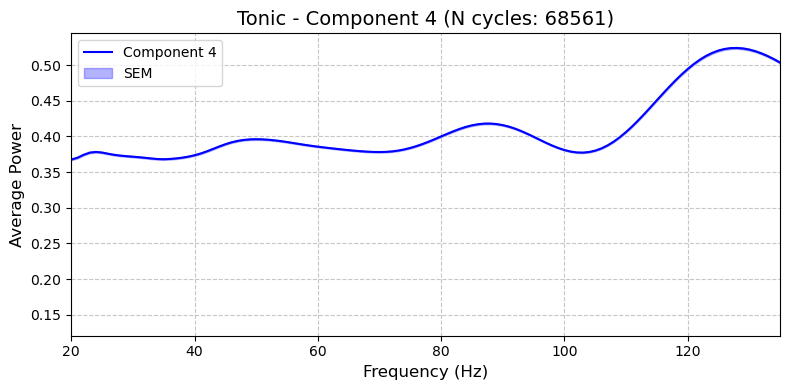

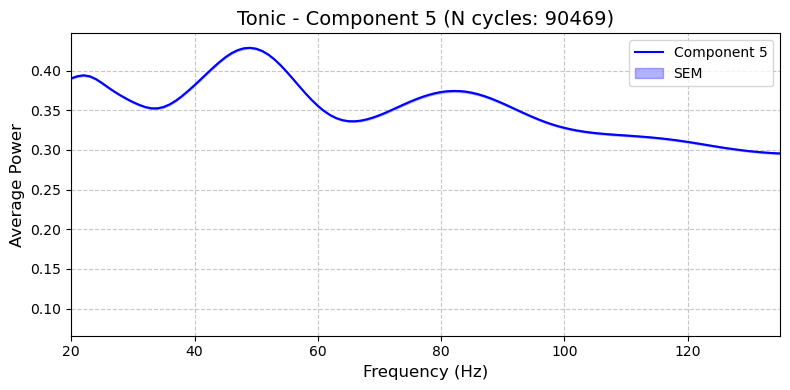

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA, FastICA

#############################################
# 1. Load and clean the data
#############################################

def clean_averaged_data(x):
    # Remove the brackets, split by whitespace, and convert to float
    temp = x.strip('[]').split()
    return np.array([float(y) for y in temp])

# Load the data (adjust the path as needed)
phasic_data = pd.read_csv('phasic_data.csv')
tonic_data  = pd.read_csv('tonic_data.csv')

# Convert 'average_spectrum' strings to numerical numpy arrays
phasic_data['average_spectrum'] = phasic_data['average_spectrum'].apply(clean_averaged_data)
tonic_data['average_spectrum']  = tonic_data['average_spectrum'].apply(clean_averaged_data)

# Check the shape of the extracted data (number of cycles)
a = phasic_data['average_spectrum']
print("Number of phasic cycles:", a.shape)  # Expected: (21721,)

# Stack the lists into a 2D numpy array:
#   Each row is one cycle's spectrum; (n_cycles, n_freq_bins)
phasic_spectra = np.stack(phasic_data['average_spectrum'].values)
tonic_spectra  = np.stack(tonic_data['average_spectrum'].values)

#############################################
# 2. Define PCA/ICA analysis function
#############################################

def process_and_plot_spectral_components(data, n_components, frequencies, title_suffix, save_path):
    """
    Process the spectral data using PCA and ICA, plot the ICA components (projected back to the original space)
    and return the ICA time courses and the weights (components) in the original space.
    """
    if data.size == 0:
        print(f"[Warning] Empty data for {title_suffix}. Skipping.")
        return None, None

    # Step 1: PCA
    pca = PCA(n_components=n_components, random_state=42)
    pca_result = pca.fit_transform(data)

    # Step 2: ICA (on the PCA-reduced data)
    ica = FastICA(n_components=n_components, random_state=42)
    tSCs = ica.fit_transform(pca_result)  # ICA time courses (n_samples, n_components)
    ica_components = ica.components_      # in the PCA space

    # Step 3: Project ICA components back to the original space
    tSCs_weights_original = np.dot(ica_components, pca.components_)  # shape: (n_components, n_freq_bins)

    # Step 4: Adjust sign of components so that the average projection is positive
    mean_projections = np.dot(tSCs_weights_original, data.T).mean(axis=1)
    for i in range(n_components):
        if mean_projections[i] < 0:
            tSCs_weights_original[i, :] *= -1
            tSCs[:, i] *= -1

    # Step 5: Determine and print the peak frequencies
    peak_frequencies = []
    for i in range(n_components):
        idx_peak = np.argmax(tSCs_weights_original[i, :])
        peak_freq = frequencies[idx_peak]
        peak_frequencies.append(peak_freq)
        print(f"Peak frequency of tSC{i+1} ({title_suffix}): {peak_freq:.2f} Hz")

    # Step 6: Plot the ICA components with their peak frequencies
    colors = ['red', 'blue', 'orange', 'purple', 'gray', 'green', 'brown']
    labels = [f'tSC{i+1}' for i in range(n_components)]
    plt.figure(figsize=(12, 7))
    for i in range(n_components):
        plt.plot(frequencies, tSCs_weights_original[i, :],
                 color=colors[i % len(colors)],
                 label=f'{labels[i]} (peak={peak_frequencies[i]:.2f} Hz)')
        # Mark the peak frequency
        peak_idx = np.where(frequencies == peak_frequencies[i])[0]
        if len(peak_idx) > 0:
            idxp = peak_idx[0]
            plt.scatter(peak_frequencies[i], tSCs_weights_original[i, idxp],
                        color=colors[i % len(colors)], edgecolor='k', zorder=5)
            plt.annotate(f'{peak_frequencies[i]:.2f} Hz',
                         xy=(peak_frequencies[i], tSCs_weights_original[i, idxp]),
                         xytext=(peak_frequencies[i]+0.5, tSCs_weights_original[i, idxp]+0.05),
                         arrowprops=dict(facecolor=colors[i % len(colors)], shrink=0.05),
                         fontsize=10, color=colors[i % len(colors)])
    plt.xlabel('Frequency (Hz)', fontsize=14)
    plt.ylabel('Weight', fontsize=14)
    plt.title(f'Theta Spectral Components (tSCs) - {title_suffix}', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

    return tSCs, tSCs_weights_original

#############################################
# 3. Run PCA/ICA analysis on phasic and tonic spectra
#############################################

# Define the number of PCA (and later ICA) components
n_components_pca = 5

# Define the frequency axis.
# (Make sure that the length of your spectra matches len(frequencies). Here we assume spectra have 126 bins.)
frequencies = np.arange(15, 141, 1)

# Process phasic data
phasic_tSCs, phasic_weights = process_and_plot_spectral_components(
    phasic_spectra,
    n_components_pca,
    frequencies,
    "Phasic Data",
    "spectral_components_phasic_data.svg"
)

# Process tonic data
tonic_tSCs, tonic_weights = process_and_plot_spectral_components(
    tonic_spectra,
    n_components_pca,
    frequencies,
    "Tonic Data",
    "spectral_components_tonic_data.svg"
)

#############################################
# 4. Group cycles by their assigned ICA component
#############################################

def group_cycles_by_component(assigned_components):
    """
    Given an array of component assignments (one per cycle),
    return a dictionary mapping each component index to a list of cycle indices.
    """
    cycles_by_comp = defaultdict(list)
    for cycle_idx, comp_idx in enumerate(assigned_components):
        cycles_by_comp[comp_idx].append(cycle_idx)
    return cycles_by_comp

# -- Phasic cycles --
if phasic_tSCs is not None:
    phasic_tSCs_abs = np.abs(phasic_tSCs)
    assigned_components_phasic = np.argmax(phasic_tSCs_abs, axis=1)
    phasic_cycles_by_comp = group_cycles_by_component(assigned_components_phasic)
    print("\nPhasic cycles grouped by component:")
    for comp_idx, indices in phasic_cycles_by_comp.items():
        print(f"  Component {comp_idx+1}: {len(indices)} cycles")

# -- Tonic cycles --
if tonic_tSCs is not None:
    tonic_tSCs_abs = np.abs(tonic_tSCs)
    assigned_components_tonic = np.argmax(tonic_tSCs_abs, axis=1)
    tonic_cycles_by_comp = group_cycles_by_component(assigned_components_tonic)
    print("\nTonic cycles grouped by component:")
    for comp_idx, indices in tonic_cycles_by_comp.items():
        print(f"  Component {comp_idx+1}: {len(indices)} cycles")

#############################################
# 5. Plot average spectrum by component with SEM and xlim(20,135)
#############################################

def plot_average_spectrum_by_component(data, cycles_by_comp, frequencies, title_prefix="Phasic"):
    """
    Plot the average spectrum for each component with its standard error of the mean (SEM).
    Each figure is limited to x-axis frequencies from 20 to 135 Hz.
    
    Parameters
    ----------
    data : np.ndarray
        2D array of shape (n_cycles, n_freq_bins) (e.g., the stacked spectra).
    cycles_by_comp : dict
        Dictionary mapping component index -> list of cycle indices.
    frequencies : np.ndarray
        1D array of frequency values (should match n_freq_bins).
    title_prefix : str
        Prefix for the figure title (e.g., "Phasic" or "Tonic").
    """
    for comp_idx in sorted(cycles_by_comp.keys()):
        cycle_indices = cycles_by_comp[comp_idx]
        if len(cycle_indices) == 0:
            continue
        # Extract spectra for cycles assigned to this component
        comp_data = data[cycle_indices, :]  # shape: (n_cycles, n_freq_bins)
        # Calculate the mean and SEM across cycles
        avg_spectrum = comp_data.mean(axis=0)
        sem = comp_data.std(axis=0, ddof=1) / np.sqrt(comp_data.shape[0])
        
        plt.figure(figsize=(8, 4))
        plt.plot(frequencies, avg_spectrum, color='b', label=f'Component {comp_idx+1}')
        plt.fill_between(frequencies, avg_spectrum - sem, avg_spectrum + sem,
                         color='b', alpha=0.3, label='SEM')
        plt.title(f"{title_prefix} - Component {comp_idx+1} (N cycles: {len(cycle_indices)})", fontsize=14)
        plt.xlabel("Frequency (Hz)", fontsize=12)
        plt.ylabel("Average Power", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.xlim(20, 135)
        plt.tight_layout()
        plt.show()

# Example usage:
if phasic_tSCs is not None:
    plot_average_spectrum_by_component(
        data=phasic_spectra,
        cycles_by_comp=phasic_cycles_by_comp,
        frequencies=frequencies,
        title_prefix="Phasic"
    )

if tonic_tSCs is not None:
    plot_average_spectrum_by_component(
        data=tonic_spectra,
        cycles_by_comp=tonic_cycles_by_comp,
        frequencies=frequencies,
        title_prefix="Tonic"
    )

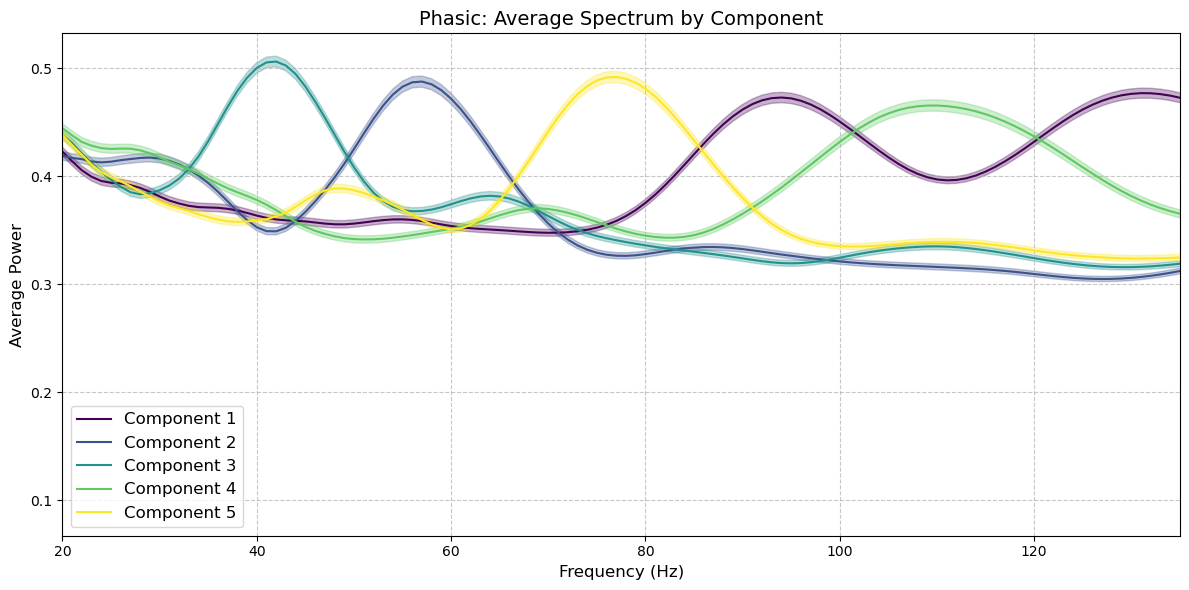

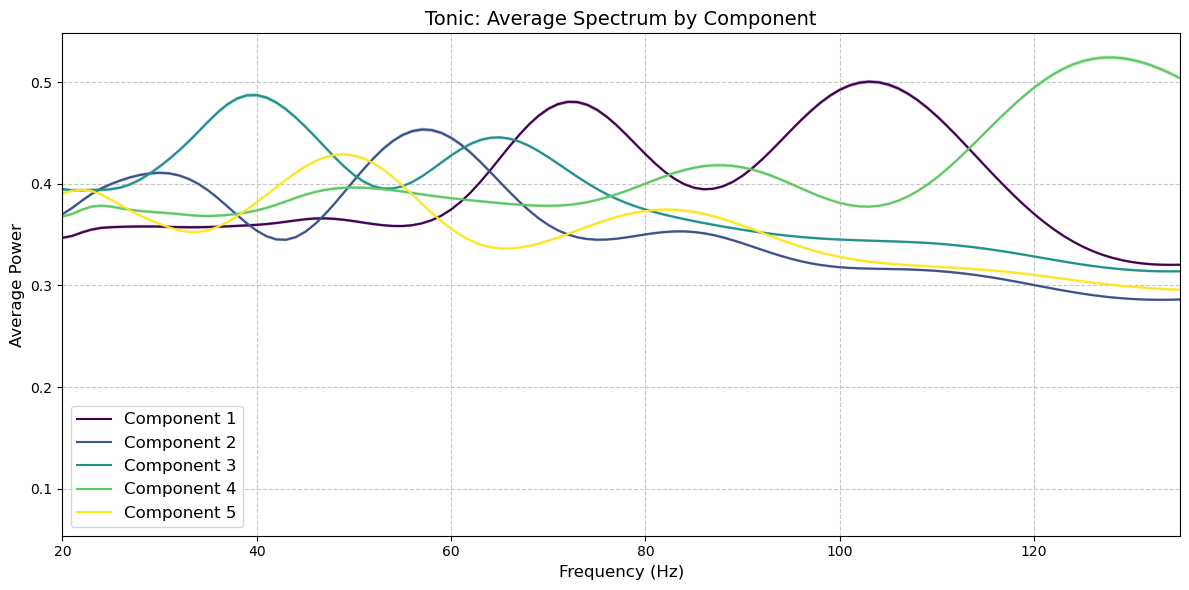

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_average_spectrum_all_components(data, cycles_by_comp, frequencies, title_prefix="Phasic"):
    """
    Plot the average spectrum (with SEM as a shaded region) for all components on one plot.
    
    Parameters
    ----------
    data : np.ndarray
        2D array of shape (n_cycles, n_freq_bins). Each row is one cycle's spectrum.
    cycles_by_comp : dict
        Dictionary mapping component index -> list of cycle indices.
    frequencies : np.ndarray
        1D array of frequency values (length should match n_freq_bins in data).
    title_prefix : str
        Title prefix for the plot (e.g., "Phasic" or "Tonic").
    """
    plt.figure(figsize=(12, 6))
    
    # Create a color map to assign a unique color for each component.
    num_comps = len(cycles_by_comp)
    colors = cm.viridis(np.linspace(0, 1, num_comps))
    
    # Iterate over sorted component indices (for consistent ordering)
    for idx, comp_idx in enumerate(sorted(cycles_by_comp.keys())):
        cycle_indices = cycles_by_comp[comp_idx]
        if len(cycle_indices) == 0:
            continue
        # Extract the spectra for all cycles assigned to this component
        comp_data = data[cycle_indices, :]  # shape: (n_cycles, n_freq_bins)
        # Compute the mean spectrum and standard error of the mean (SEM)
        avg_spectrum = comp_data.mean(axis=0)
        sem = comp_data.std(axis=0, ddof=1) / np.sqrt(comp_data.shape[0])
        
        # Plot the average spectrum
        plt.plot(frequencies, avg_spectrum, label=f'Component {comp_idx+1}', color=colors[idx])
        # Plot the SEM as a shaded area
        plt.fill_between(frequencies, avg_spectrum - sem, avg_spectrum + sem, 
                         color=colors[idx], alpha=0.3)
    
    plt.xlabel("Frequency (Hz)", fontsize=12)
    plt.ylabel("Average Power", fontsize=12)
    plt.title(f"{title_prefix}: Average Spectrum by Component", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlim(20, 135)
    plt.tight_layout()
    plt.show()


# Example usage:
# For phasic data
plot_average_spectrum_all_components(
    data=phasic_spectra,
    cycles_by_comp=phasic_cycles_by_comp,
    frequencies=frequencies,
    title_prefix="Phasic"
)

# For tonic data
plot_average_spectrum_all_components(
    data=tonic_spectra,
    cycles_by_comp=tonic_cycles_by_comp,
    frequencies=frequencies,
    title_prefix="Tonic"
)

In [11]:
import numpy as np
from scipy import stats

# Define frequency bands for slow and mid gamma.
slow_gamma_low, slow_gamma_high = 20, 50
mid_gamma_low, mid_gamma_high = 50, 135

# Helper functions to compute average power and peak frequency within a given band.
def compute_band_power(spectrum, frequencies, low, high):
    """Return the mean power in the frequency band [low, high]."""
    mask = (frequencies >= low) & (frequencies <= high)
    return np.mean(spectrum[mask])

def compute_band_peak_frequency(spectrum, frequencies, low, high):
    """Return the frequency at which the maximum power occurs in the band [low, high]."""
    mask = (frequencies >= low) & (frequencies <= high)
    band_freqs = frequencies[mask]
    idx = np.argmax(spectrum[mask])
    return band_freqs[idx]

# ------------------------------------------------------------------
# Assume you have already determined that, for example, the gamma
# component is component 2 from your ICA results:
gamma_comp_idx = 2

# Extract cycle indices corresponding to the gamma component.
# (phasic_cycles_by_comp and tonic_cycles_by_comp should have been created earlier.)
phasic_gamma_indices = phasic_cycles_by_comp.get(gamma_comp_idx, [])
tonic_gamma_indices  = tonic_cycles_by_comp.get(gamma_comp_idx, [])

print(f"Number of phasic gamma cycles: {len(phasic_gamma_indices)}")
print(f"Number of tonic gamma cycles: {len(tonic_gamma_indices)}")

# --- Compute metrics for each cycle in the gamma component ---

# For slow gamma (20–50 Hz)
phasic_slow_power = [
    compute_band_power(phasic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in phasic_gamma_indices
]
tonic_slow_power = [
    compute_band_power(tonic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in tonic_gamma_indices
]

phasic_slow_peak = [
    compute_band_peak_frequency(phasic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in phasic_gamma_indices
]
tonic_slow_peak = [
    compute_band_peak_frequency(tonic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in tonic_gamma_indices
]

# For mid gamma (50–135 Hz)
phasic_mid_power = [
    compute_band_power(phasic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in phasic_gamma_indices
]
tonic_mid_power = [
    compute_band_power(tonic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in tonic_gamma_indices
]

phasic_mid_peak = [
    compute_band_peak_frequency(phasic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in phasic_gamma_indices
]
tonic_mid_peak = [
    compute_band_peak_frequency(tonic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in tonic_gamma_indices
]

# --- Perform statistical tests (independent-samples t-test) ---

# Slow gamma power comparison
t_stat_slow_power, p_value_slow_power = stats.ttest_ind(phasic_slow_power, tonic_slow_power, equal_var=False)

# Mid gamma power comparison
t_stat_mid_power, p_value_mid_power = stats.ttest_ind(phasic_mid_power, tonic_mid_power, equal_var=False)

# Slow gamma peak frequency comparison
t_stat_slow_peak, p_value_slow_peak = stats.ttest_ind(phasic_slow_peak, tonic_slow_peak, equal_var=False)

# Mid gamma peak frequency comparison
t_stat_mid_peak, p_value_mid_peak = stats.ttest_ind(phasic_mid_peak, tonic_mid_peak, equal_var=False)

# --- Report the results ---

print(f"Slow Gamma Power: t = {t_stat_slow_power:.3f}, p = {p_value_slow_power:.5f}")
print(f"Mid Gamma Power:  t = {t_stat_mid_power:.3f}, p = {p_value_mid_power:.5f}")
print(f"Slow Gamma Peak Frequency: t = {t_stat_slow_peak:.3f}, p = {p_value_slow_peak:.5f}")
print(f"Mid Gamma Peak Frequency:  t = {t_stat_mid_peak:.3f}, p = {p_value_mid_peak:.5f}")

# Check significance at p < 0.005:
if p_value_slow_power < 0.005:
    print("Slow gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in slow gamma power between phasic and tonic cycles.")

if p_value_mid_power < 0.005:
    print("Mid gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in mid gamma power between phasic and tonic cycles.")

if p_value_slow_peak < 0.005:
    print("Slow gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in slow gamma peak frequency between phasic and tonic cycles.")

if p_value_mid_peak < 0.005:
    print("Mid gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in mid gamma peak frequency between phasic and tonic cycles.")

Number of phasic gamma cycles: 4390
Number of tonic gamma cycles: 74706
Slow Gamma Power: t = 0.594, p = 0.55257
Mid Gamma Power:  t = -14.969, p = 0.00000
Slow Gamma Peak Frequency: t = -3.696, p = 0.00022
Mid Gamma Peak Frequency:  t = 1.673, p = 0.09438
No significant difference in slow gamma power between phasic and tonic cycles.
Mid gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).
Slow gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).
No significant difference in mid gamma peak frequency between phasic and tonic cycles.


Number of phasic gamma cycles: 4390
Number of tonic gamma cycles: 74706
Slow Gamma Power: t = 0.594, p = 0.55257
Mid Gamma Power:  t = -21.112, p = 0.00000
Fast Gamma Power: t = -7.938, p = 0.00000
Slow Gamma Peak Frequency: t = -3.696, p = 0.00022
Mid Gamma Peak Frequency:  t = -5.916, p = 0.00000
Fast Gamma Peak Frequency: t = 7.388, p = 0.00000
No significant difference in slow gamma power between phasic and tonic cycles.
Mid gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).
Fast gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).
Slow gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).
Mid gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).
Fast gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).


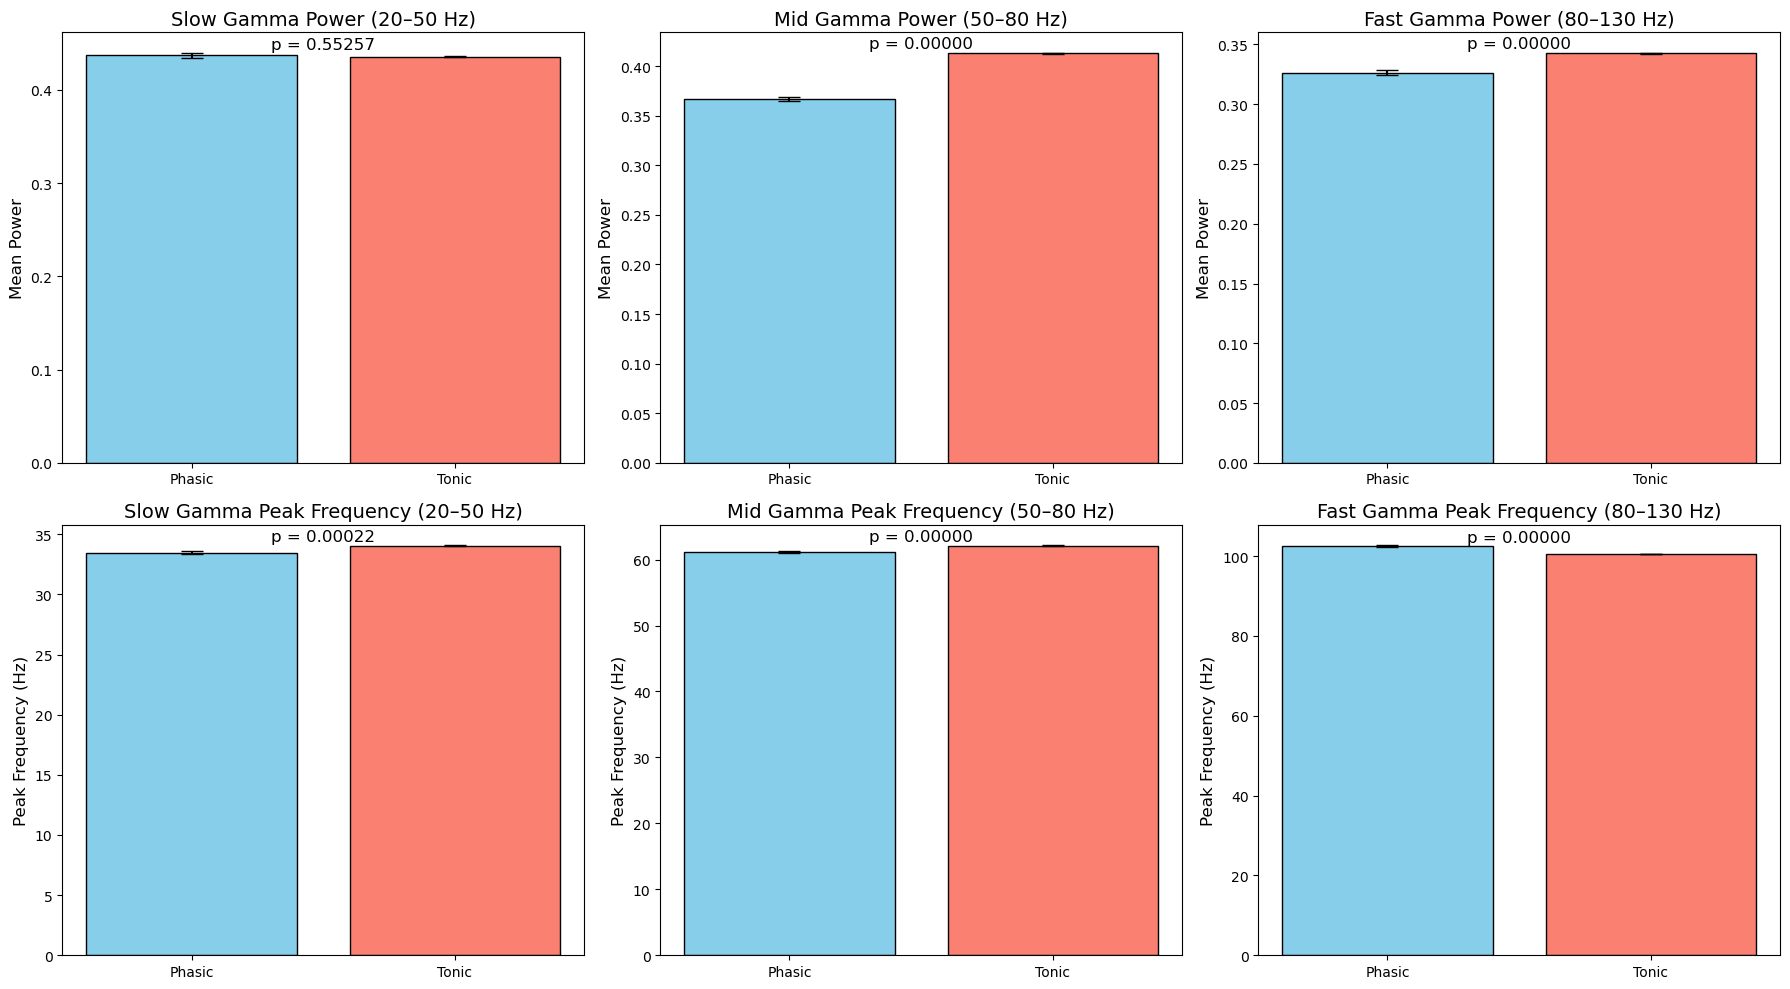

In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# --- Frequency Bands Definitions ---
# Slow Gamma (20–50 Hz)
slow_gamma_low, slow_gamma_high = 20, 50
# Mid Gamma (50–80 Hz)
mid_gamma_low, mid_gamma_high = 50, 80
# Fast Gamma (80–130 Hz)
fast_gamma_low, fast_gamma_high = 80, 130

# Helper functions to compute average power and peak frequency within a given band.
def compute_band_power(spectrum, frequencies, low, high):
    """Return the mean power in the frequency band [low, high]."""
    mask = (frequencies >= low) & (frequencies <= high)
    return np.mean(spectrum[mask])

def compute_band_peak_frequency(spectrum, frequencies, low, high):
    """Return the frequency at which the maximum power occurs in the band [low, high]."""
    mask = (frequencies >= low) & (frequencies <= high)
    band_freqs = frequencies[mask]
    idx = np.argmax(spectrum[mask])
    return band_freqs[idx]

# ------------------------------------------------------------------
# Assume you have already determined that, for example, the gamma
# component is component 2 from your ICA results:
gamma_comp_idx = 2

# Extract cycle indices corresponding to the gamma component.
# (phasic_cycles_by_comp and tonic_cycles_by_comp should have been created earlier.)
phasic_gamma_indices = phasic_cycles_by_comp.get(gamma_comp_idx, [])
tonic_gamma_indices  = tonic_cycles_by_comp.get(gamma_comp_idx, [])

print(f"Number of phasic gamma cycles: {len(phasic_gamma_indices)}")
print(f"Number of tonic gamma cycles: {len(tonic_gamma_indices)}")

# --- Compute metrics for each cycle in the gamma component ---

# ----- Slow Gamma (20–50 Hz) -----
phasic_slow_power = [
    compute_band_power(phasic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in phasic_gamma_indices
]
tonic_slow_power = [
    compute_band_power(tonic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in tonic_gamma_indices
]

phasic_slow_peak = [
    compute_band_peak_frequency(phasic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in phasic_gamma_indices
]
tonic_slow_peak = [
    compute_band_peak_frequency(tonic_spectra[i, :], frequencies, slow_gamma_low, slow_gamma_high)
    for i in tonic_gamma_indices
]

# ----- Mid Gamma (50–80 Hz) -----
phasic_mid_power = [
    compute_band_power(phasic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in phasic_gamma_indices
]
tonic_mid_power = [
    compute_band_power(tonic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in tonic_gamma_indices
]

phasic_mid_peak = [
    compute_band_peak_frequency(phasic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in phasic_gamma_indices
]
tonic_mid_peak = [
    compute_band_peak_frequency(tonic_spectra[i, :], frequencies, mid_gamma_low, mid_gamma_high)
    for i in tonic_gamma_indices
]

# ----- Fast Gamma (80–130 Hz) -----
phasic_fast_power = [
    compute_band_power(phasic_spectra[i, :], frequencies, fast_gamma_low, fast_gamma_high)
    for i in phasic_gamma_indices
]
tonic_fast_power = [
    compute_band_power(tonic_spectra[i, :], frequencies, fast_gamma_low, fast_gamma_high)
    for i in tonic_gamma_indices
]

phasic_fast_peak = [
    compute_band_peak_frequency(phasic_spectra[i, :], frequencies, fast_gamma_low, fast_gamma_high)
    for i in phasic_gamma_indices
]
tonic_fast_peak = [
    compute_band_peak_frequency(tonic_spectra[i, :], frequencies, fast_gamma_low, fast_gamma_high)
    for i in tonic_gamma_indices
]

# --- Perform statistical tests (independent-samples t-test) ---

# Power comparisons
t_stat_slow_power, p_value_slow_power = stats.ttest_ind(phasic_slow_power, tonic_slow_power, equal_var=False)
t_stat_mid_power, p_value_mid_power   = stats.ttest_ind(phasic_mid_power, tonic_mid_power, equal_var=False)
t_stat_fast_power, p_value_fast_power = stats.ttest_ind(phasic_fast_power, tonic_fast_power, equal_var=False)

# Peak frequency comparisons
t_stat_slow_peak, p_value_slow_peak = stats.ttest_ind(phasic_slow_peak, tonic_slow_peak, equal_var=False)
t_stat_mid_peak, p_value_mid_peak   = stats.ttest_ind(phasic_mid_peak, tonic_mid_peak, equal_var=False)
t_stat_fast_peak, p_value_fast_peak = stats.ttest_ind(phasic_fast_peak, tonic_fast_peak, equal_var=False)

# --- Report the results ---
print(f"Slow Gamma Power: t = {t_stat_slow_power:.3f}, p = {p_value_slow_power:.5f}")
print(f"Mid Gamma Power:  t = {t_stat_mid_power:.3f}, p = {p_value_mid_power:.5f}")
print(f"Fast Gamma Power: t = {t_stat_fast_power:.3f}, p = {p_value_fast_power:.5f}")

print(f"Slow Gamma Peak Frequency: t = {t_stat_slow_peak:.3f}, p = {p_value_slow_peak:.5f}")
print(f"Mid Gamma Peak Frequency:  t = {t_stat_mid_peak:.3f}, p = {p_value_mid_peak:.5f}")
print(f"Fast Gamma Peak Frequency: t = {t_stat_fast_peak:.3f}, p = {p_value_fast_peak:.5f}")

if p_value_slow_power < 0.005:
    print("Slow gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in slow gamma power between phasic and tonic cycles.")

if p_value_mid_power < 0.005:
    print("Mid gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in mid gamma power between phasic and tonic cycles.")

if p_value_fast_power < 0.005:
    print("Fast gamma power in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in fast gamma power between phasic and tonic cycles.")

if p_value_slow_peak < 0.005:
    print("Slow gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in slow gamma peak frequency between phasic and tonic cycles.")

if p_value_mid_peak < 0.005:
    print("Mid gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in mid gamma peak frequency between phasic and tonic cycles.")

if p_value_fast_peak < 0.005:
    print("Fast gamma peak frequency in phasic cycles is significantly different from tonic cycles (p < 0.005).")
else:
    print("No significant difference in fast gamma peak frequency between phasic and tonic cycles.")

# ---------------------------
# Now, plot the mean and SEM for each metric along with the p-values.
def get_mean_sem(data):
    data = np.array(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))
    return mean, sem

# Compute mean and SEM for each metric.

# Slow Gamma
mean_phasic_slow, sem_phasic_slow = get_mean_sem(phasic_slow_power)
mean_tonic_slow, sem_tonic_slow   = get_mean_sem(tonic_slow_power)
mean_phasic_slow_peak, sem_phasic_slow_peak = get_mean_sem(phasic_slow_peak)
mean_tonic_slow_peak, sem_tonic_slow_peak   = get_mean_sem(tonic_slow_peak)

# Mid Gamma
mean_phasic_mid, sem_phasic_mid = get_mean_sem(phasic_mid_power)
mean_tonic_mid, sem_tonic_mid   = get_mean_sem(tonic_mid_power)
mean_phasic_mid_peak, sem_phasic_mid_peak = get_mean_sem(phasic_mid_peak)
mean_tonic_mid_peak, sem_tonic_mid_peak   = get_mean_sem(tonic_mid_peak)

# Fast Gamma
mean_phasic_fast, sem_phasic_fast = get_mean_sem(phasic_fast_power)
mean_tonic_fast, sem_tonic_fast   = get_mean_sem(tonic_fast_power)
mean_phasic_fast_peak, sem_phasic_fast_peak = get_mean_sem(phasic_fast_peak)
mean_tonic_fast_peak, sem_tonic_fast_peak   = get_mean_sem(tonic_fast_peak)

# Create a 2x3 set of subplots for the six metrics.
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
colors = ['skyblue', 'salmon']
conditions = ['Phasic', 'Tonic']

# --- Subplot 1: Slow Gamma Power ---
ax = axes[0, 0]
means = [mean_phasic_slow, mean_tonic_slow]
sems  = [sem_phasic_slow, sem_tonic_slow]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Power (20–50 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_power:.5f}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 2: Mid Gamma Power ---
ax = axes[0, 1]
means = [mean_phasic_mid, mean_tonic_mid]
sems  = [sem_phasic_mid, sem_tonic_mid]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Power (50–80 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_power:.5f}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 3: Fast Gamma Power ---
ax = axes[0, 2]
means = [mean_phasic_fast, mean_tonic_fast]
sems  = [sem_phasic_fast, sem_tonic_fast]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Fast Gamma Power (80–130 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_fast_power:.5f}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 4: Slow Gamma Peak Frequency ---
ax = axes[1, 0]
means = [mean_phasic_slow_peak, mean_tonic_slow_peak]
sems  = [sem_phasic_slow_peak, sem_tonic_slow_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Peak Frequency (20–50 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_peak:.5f}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 5: Mid Gamma Peak Frequency ---
ax = axes[1, 1]
means = [mean_phasic_mid_peak, mean_tonic_mid_peak]
sems  = [sem_phasic_mid_peak, sem_tonic_mid_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Peak Frequency (50–80 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_peak:.5f}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 6: Fast Gamma Peak Frequency ---
ax = axes[1, 2]
means = [mean_phasic_fast_peak, mean_tonic_fast_peak]
sems  = [sem_phasic_fast_peak, sem_tonic_fast_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Fast Gamma Peak Frequency (80–130 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_fast_peak:.5f}', 
        ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

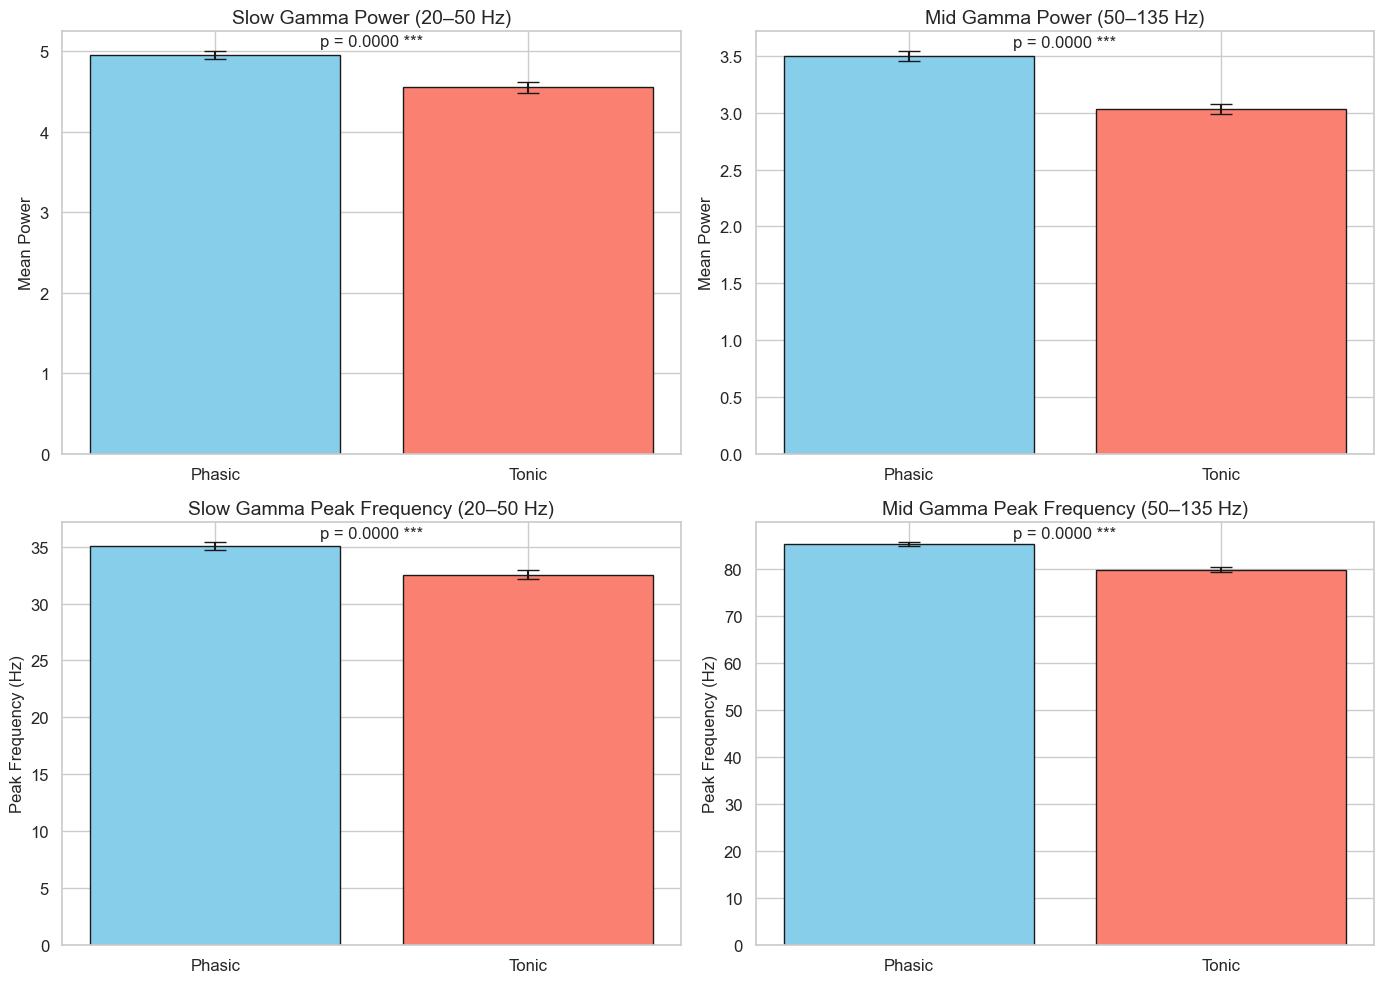

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -----------------------------------------------------------------------------
# Helper function to compute mean and standard error of the mean (SEM)
def get_mean_sem(data):
    data = np.array(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))
    return mean, sem

# -----------------------------------------------------------------------------
# Example data arrays for gamma metrics for slow and mid gamma.
# (These should have been computed from your analysis.)
#
# For demonstration purposes, here we generate some dummy data.
# Replace these with your actual data arrays.
np.random.seed(42)
n_phasic = 100  # number of phasic gamma cycles
n_tonic  = 80   # number of tonic gamma cycles

# Slow gamma power (20-50 Hz)
phasic_slow_power = np.random.normal(5.0, 0.5, n_phasic)
tonic_slow_power  = np.random.normal(4.5, 0.6, n_tonic)

# Mid gamma power (50-135 Hz)
phasic_mid_power = np.random.normal(3.5, 0.4, n_phasic)
tonic_mid_power  = np.random.normal(3.0, 0.5, n_tonic)

# Slow gamma peak frequency (20-50 Hz)
phasic_slow_peak = np.random.normal(35, 3, n_phasic)
tonic_slow_peak  = np.random.normal(33, 3.5, n_tonic)

# Mid gamma peak frequency (50-135 Hz)
phasic_mid_peak = np.random.normal(85, 4, n_phasic)
tonic_mid_peak  = np.random.normal(80, 4.5, n_tonic)

# Perform statistical tests (for the example, using two-sample t-tests)
t_stat_slow_power, p_value_slow_power = stats.ttest_ind(phasic_slow_power, tonic_slow_power, equal_var=False)
t_stat_mid_power, p_value_mid_power   = stats.ttest_ind(phasic_mid_power, tonic_mid_power, equal_var=False)
t_stat_slow_peak, p_value_slow_peak     = stats.ttest_ind(phasic_slow_peak, tonic_slow_peak, equal_var=False)
t_stat_mid_peak, p_value_mid_peak       = stats.ttest_ind(phasic_mid_peak, tonic_mid_peak, equal_var=False)

# Optionally, you can convert the p-values into significance stars.
def significance_stars(p):
    if p < 0.005:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

stars_slow_power = significance_stars(p_value_slow_power)
stars_mid_power  = significance_stars(p_value_mid_power)
stars_slow_peak  = significance_stars(p_value_slow_peak)
stars_mid_peak   = significance_stars(p_value_mid_peak)

# -----------------------------------------------------------------------------
# Compute means and SEMs for each metric.
mean_phasic_slow, sem_phasic_slow = get_mean_sem(phasic_slow_power)
mean_tonic_slow, sem_tonic_slow   = get_mean_sem(tonic_slow_power)

mean_phasic_mid, sem_phasic_mid = get_mean_sem(phasic_mid_power)
mean_tonic_mid, sem_tonic_mid   = get_mean_sem(tonic_mid_power)

mean_phasic_slow_peak, sem_phasic_slow_peak = get_mean_sem(phasic_slow_peak)
mean_tonic_slow_peak, sem_tonic_slow_peak   = get_mean_sem(tonic_slow_peak)

mean_phasic_mid_peak, sem_phasic_mid_peak = get_mean_sem(phasic_mid_peak)
mean_tonic_mid_peak, sem_tonic_mid_peak   = get_mean_sem(tonic_mid_peak)

# -----------------------------------------------------------------------------
# Set a seaborn style for a cleaner look.
sns.set_theme(style="whitegrid")

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define bar colors for phasic and tonic
colors = ['skyblue', 'salmon']
conditions = ['Phasic', 'Tonic']

# --- Subplot 1: Slow Gamma Power ---
ax = axes[0, 0]
means = [mean_phasic_slow, mean_tonic_slow]
sems  = [sem_phasic_slow, sem_tonic_slow]
bars = ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Power (20–50 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.tick_params(labelsize=12)
# Annotate significance
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_power:.4f} {stars_slow_power}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 2: Mid Gamma Power ---
ax = axes[0, 1]
means = [mean_phasic_mid, mean_tonic_mid]
sems  = [sem_phasic_mid, sem_tonic_mid]
bars = ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Power (50–135 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_power:.4f} {stars_mid_power}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 3: Slow Gamma Peak Frequency ---
ax = axes[1, 0]
means = [mean_phasic_slow_peak, mean_tonic_slow_peak]
sems  = [sem_phasic_slow_peak, sem_tonic_slow_peak]
bars = ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Peak Frequency (20–50 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_peak:.4f} {stars_slow_peak}', 
        ha='center', va='bottom', fontsize=12)

# --- Subplot 4: Mid Gamma Peak Frequency ---
ax = axes[1, 1]
means = [mean_phasic_mid_peak, mean_tonic_mid_peak]
sems  = [sem_phasic_mid_peak, sem_tonic_mid_peak]
bars = ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Peak Frequency (50–135 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_peak:.4f} {stars_mid_peak}', 
        ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

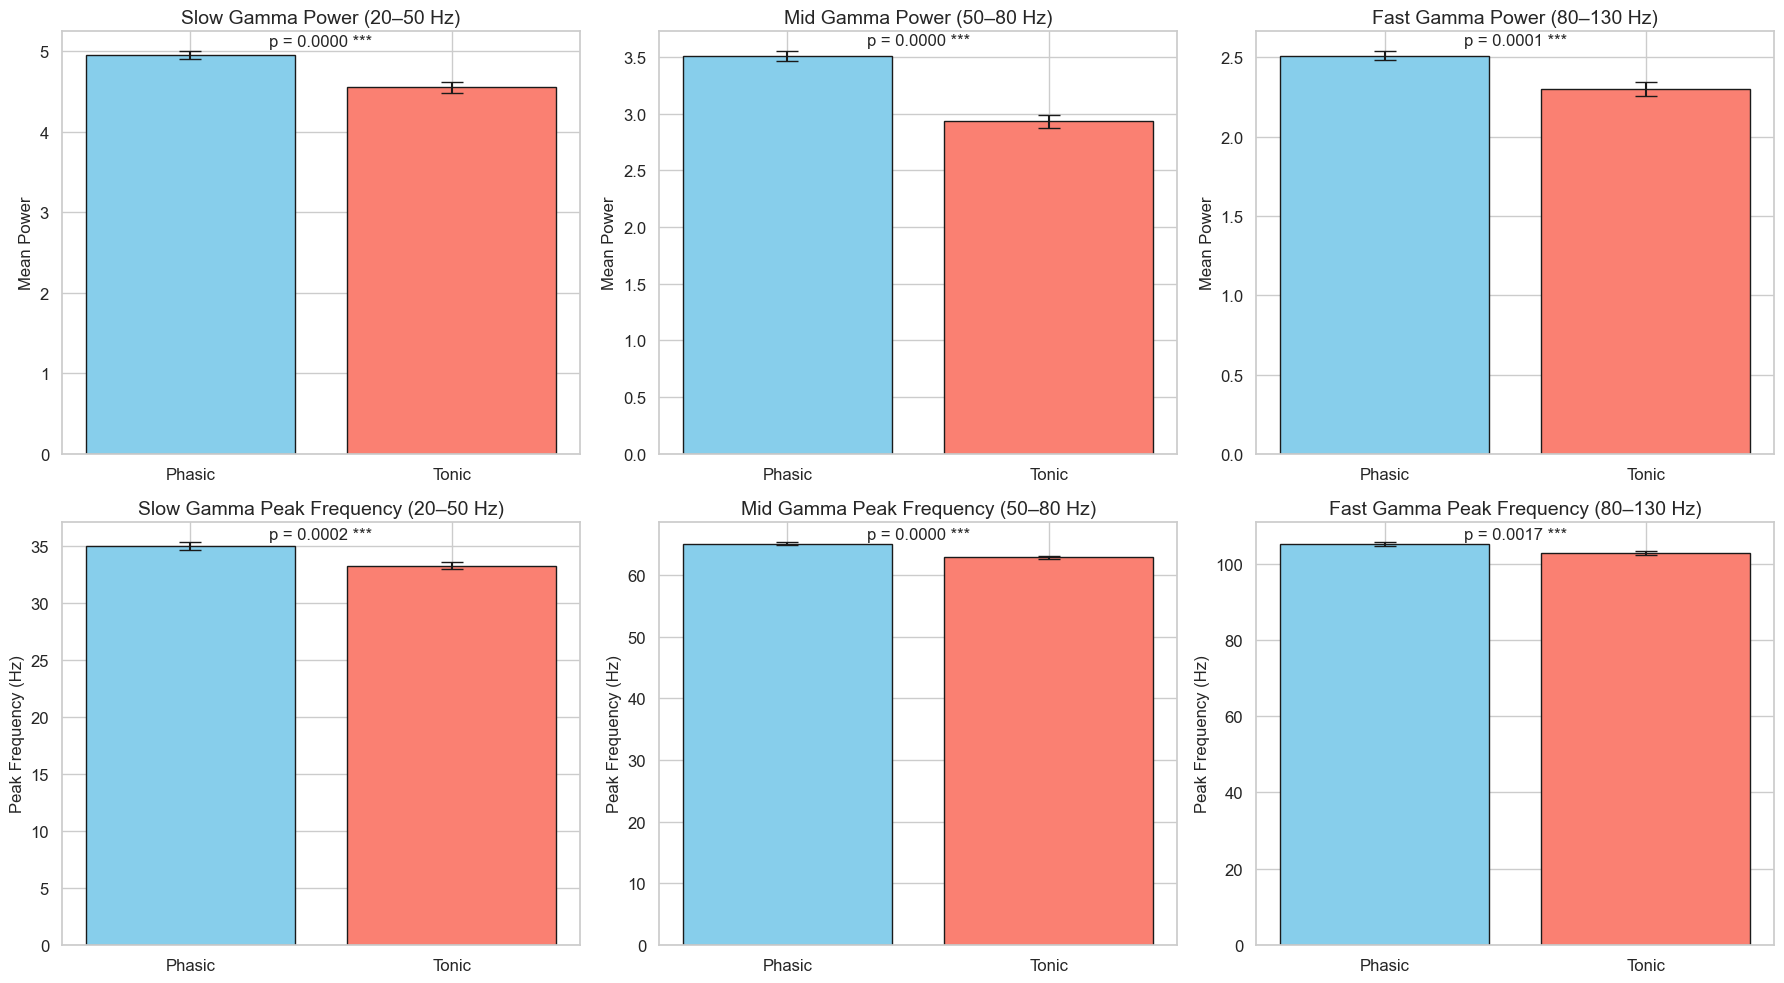

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# =============================================================================
# Helper Functions
# =============================================================================

def get_mean_sem(data):
    """Return the mean and standard error of the mean (SEM) for the data."""
    data = np.array(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(len(data))
    return mean, sem

def significance_stars(p):
    """Return significance stars based on the p-value."""
    if p < 0.005:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'ns'

# =============================================================================
# Dummy Data for Demonstration
# =============================================================================
# Replace these with your actual computed arrays.
np.random.seed(42)
n_phasic = 100  # Number of phasic cycles
n_tonic  = 80   # Number of tonic cycles

# --- Slow Gamma (20–50 Hz) ---
phasic_slow_power = np.random.normal(5.0, 0.5, n_phasic)
tonic_slow_power  = np.random.normal(4.5, 0.6, n_tonic)
phasic_slow_peak  = np.random.normal(35, 3, n_phasic)
tonic_slow_peak   = np.random.normal(33, 3.5, n_tonic)

# --- Mid Gamma (50–80 Hz) ---
phasic_mid_power = np.random.normal(3.5, 0.4, n_phasic)
tonic_mid_power  = np.random.normal(3.0, 0.5, n_tonic)
phasic_mid_peak  = np.random.normal(65, 2, n_phasic)
tonic_mid_peak   = np.random.normal(63, 2.5, n_tonic)

# --- Fast Gamma (80–130 Hz) ---
phasic_fast_power = np.random.normal(2.5, 0.3, n_phasic)
tonic_fast_power  = np.random.normal(2.2, 0.4, n_tonic)
phasic_fast_peak  = np.random.normal(105, 5, n_phasic)
tonic_fast_peak   = np.random.normal(102, 5, n_tonic)

# =============================================================================
# Statistical Tests (t-tests)
# =============================================================================
t_stat_slow_power, p_value_slow_power = stats.ttest_ind(phasic_slow_power, tonic_slow_power, equal_var=False)
t_stat_mid_power,  p_value_mid_power  = stats.ttest_ind(phasic_mid_power,  tonic_mid_power,  equal_var=False)
t_stat_fast_power, p_value_fast_power = stats.ttest_ind(phasic_fast_power, tonic_fast_power, equal_var=False)

t_stat_slow_peak,  p_value_slow_peak  = stats.ttest_ind(phasic_slow_peak,  tonic_slow_peak,  equal_var=False)
t_stat_mid_peak,   p_value_mid_peak   = stats.ttest_ind(phasic_mid_peak,   tonic_mid_peak,   equal_var=False)
t_stat_fast_peak,  p_value_fast_peak  = stats.ttest_ind(phasic_fast_peak,  tonic_fast_peak,  equal_var=False)

# Convert p-values to significance stars
stars_slow_power = significance_stars(p_value_slow_power)
stars_mid_power  = significance_stars(p_value_mid_power)
stars_fast_power = significance_stars(p_value_fast_power)

stars_slow_peak  = significance_stars(p_value_slow_peak)
stars_mid_peak   = significance_stars(p_value_mid_peak)
stars_fast_peak  = significance_stars(p_value_fast_peak)

# =============================================================================
# Compute Means and SEMs for Each Metric
# =============================================================================
mean_phasic_slow, sem_phasic_slow = get_mean_sem(phasic_slow_power)
mean_tonic_slow,  sem_tonic_slow  = get_mean_sem(tonic_slow_power)

mean_phasic_mid, sem_phasic_mid = get_mean_sem(phasic_mid_power)
mean_tonic_mid,  sem_tonic_mid  = get_mean_sem(tonic_mid_power)

mean_phasic_fast, sem_phasic_fast = get_mean_sem(phasic_fast_power)
mean_tonic_fast,  sem_tonic_fast  = get_mean_sem(tonic_fast_power)

mean_phasic_slow_peak, sem_phasic_slow_peak = get_mean_sem(phasic_slow_peak)
mean_tonic_slow_peak,  sem_tonic_slow_peak  = get_mean_sem(tonic_slow_peak)

mean_phasic_mid_peak, sem_phasic_mid_peak = get_mean_sem(phasic_mid_peak)
mean_tonic_mid_peak,  sem_tonic_mid_peak  = get_mean_sem(tonic_mid_peak)

mean_phasic_fast_peak, sem_phasic_fast_peak = get_mean_sem(phasic_fast_peak)
mean_tonic_fast_peak,  sem_tonic_fast_peak  = get_mean_sem(tonic_fast_peak)

# =============================================================================
# Plotting: 2x3 Grid for Gamma Metrics
# =============================================================================
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
conditions = ['Phasic', 'Tonic']
colors = ['skyblue', 'salmon']

# ----- Subplot 1: Slow Gamma Power (20–50 Hz) -----
ax = axes[0, 0]
means = [mean_phasic_slow, mean_tonic_slow]
sems  = [sem_phasic_slow, sem_tonic_slow]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Power (20–50 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_power:.4f} {stars_slow_power}', 
        ha='center', va='bottom', fontsize=12)

# ----- Subplot 2: Mid Gamma Power (50–80 Hz) -----
ax = axes[0, 1]
means = [mean_phasic_mid, mean_tonic_mid]
sems  = [sem_phasic_mid, sem_tonic_mid]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Power (50–80 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_power:.4f} {stars_mid_power}', 
        ha='center', va='bottom', fontsize=12)

# ----- Subplot 3: Fast Gamma Power (80–130 Hz) -----
ax = axes[0, 2]
means = [mean_phasic_fast, mean_tonic_fast]
sems  = [sem_phasic_fast, sem_tonic_fast]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Fast Gamma Power (80–130 Hz)', fontsize=14)
ax.set_ylabel('Mean Power', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_fast_power:.4f} {stars_fast_power}', 
        ha='center', va='bottom', fontsize=12)

# ----- Subplot 4: Slow Gamma Peak Frequency (20–50 Hz) -----
ax = axes[1, 0]
means = [mean_phasic_slow_peak, mean_tonic_slow_peak]
sems  = [sem_phasic_slow_peak, sem_tonic_slow_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Slow Gamma Peak Frequency (20–50 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_slow_peak:.4f} {stars_slow_peak}', 
        ha='center', va='bottom', fontsize=12)

# ----- Subplot 5: Mid Gamma Peak Frequency (50–80 Hz) -----
ax = axes[1, 1]
means = [mean_phasic_mid_peak, mean_tonic_mid_peak]
sems  = [sem_phasic_mid_peak, sem_tonic_mid_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Mid Gamma Peak Frequency (50–80 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_mid_peak:.4f} {stars_mid_peak}', 
        ha='center', va='bottom', fontsize=12)

# ----- Subplot 6: Fast Gamma Peak Frequency (80–130 Hz) -----
ax = axes[1, 2]
means = [mean_phasic_fast_peak, mean_tonic_fast_peak]
sems  = [sem_phasic_fast_peak, sem_tonic_fast_peak]
ax.bar(conditions, means, yerr=sems, capsize=8, color=colors, edgecolor='k')
ax.set_title('Fast Gamma Peak Frequency (80–130 Hz)', fontsize=14)
ax.set_ylabel('Peak Frequency (Hz)', fontsize=12)
ax.tick_params(labelsize=12)
ax.text(0.5, max(means)+max(sems)*1.2, f'p = {p_value_fast_peak:.4f} {stars_fast_peak}', 
        ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()